### 1. LOAD NECESSARY LIBRARY 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cpi = 'CPI.csv' # Consumer price index
eci = 'ECI.csv' #  Employment cost index
csi = 'CONSUMER-SENTIMENT-INDEX.csv' # Consumer sentiment index
gpd = 'GPD-PRICE-DEFLATOR.csv' # Price deflator
ipd = 'IMPORT-PRICE-INDEX.csv' # Import price index
op = 'OIL-PRICE.csv' # WPI oil prices
pce = 'PCE.csv' # Personal consumption expenditures
ppi = 'PPI.csv' # Producer price index
wg = 'WAGE-GROWTH.csv' # Wage growth
unrate = 'UNRATE.csv' # Unemploment rate

In [3]:
df_cpi = pd.read_csv(cpi, index_col='DATE', parse_dates=True)
df_eci = pd.read_csv(eci, index_col='DATE', parse_dates=True)
df_csi = pd.read_csv(csi)
df_gpd = pd.read_csv(ipd, index_col='DATE', parse_dates=True)
df_op = pd.read_csv(op, index_col='DATE', parse_dates=True)
df_pce = pd.read_csv(pce, index_col='DATE', parse_dates=True)
df_ppi = pd.read_csv(ppi, index_col='DATE', parse_dates=True)
df_wg = pd.read_csv(wg, index_col='DATE', parse_dates=True)
df_unemply = pd.read_csv(unrate, index_col='DATE', parse_dates=True)

### 2. DATA EXPLORATION

In [4]:
def check_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] > Q3 + 1.5 * IQR) | (df[col] < Q1 - 1.5 * (IQR))]

In [5]:
df_unemply

,UNRATE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2024-02-01,3.9
2024-03-01,3.8
2024-04-01,3.9


In [6]:
dfs = [df_eci, df_gpd, df_op, df_pce, df_ppi, df_wg, df_unemply, df_csi, df_cpi]

In [7]:
for df in dfs:
    for column in df.columns:
        df[column].replace('.', np.nan, inplace=True)

/var/folders/44/ywyr9h1x19sc31hw5rqj971w0000gn/T/ipykernel_30259/888311217.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace('.', np.nan, inplace=True)


In [8]:
for df in dfs:
    for column in df.columns:
        print(column.upper())
        print(df[column].isnull().sum())
        print('*' * 130)
        print()

CIS1020000000000I
0
**********************************************************************************************************************************

IR
50
**********************************************************************************************************************************

POILWTIUSDM
0
**********************************************************************************************************************************

PCE
0
**********************************************************************************************************************************

PPIACO
0
**********************************************************************************************************************************

FRBATLWGTUMHWG83O
30
**********************************************************************************************************************************

UNRATE
0
***************************************************************************************************************************

In [9]:
df_gpd.dropna(inplace=True)

In [10]:
df_wg.dropna(inplace=True)

In [11]:
df_csi.drop('Table 1: The Index of Consumer Sentiment', axis = 1, inplace=True)

In [12]:
df_csi

,,
Month,Year,Index
1,1978,83.7
2,1978,84.3
3,1978,78.8
4,1978,81.6
...,...,...
1,2024,79
2,2024,76.9
3,2024,79.4
4,2024,77.2


In [13]:
df_csi.reset_index(inplace=True)

In [14]:
df_csi

,level_0,level_1,level_2
0,Month,Year,Index
1,1,1978,83.7
2,2,1978,84.3
3,3,1978,78.8
4,4,1978,81.6
...,...,...,...
553,1,2024,79
554,2,2024,76.9
555,3,2024,79.4
556,4,2024,77.2


In [15]:
# Combine the columns into a single datetime column
df_csi['Date'] = pd.to_datetime(df_csi['level_1'] + '-' + df_csi['level_0'] + '-01', errors='coerce')

/var/folders/44/ywyr9h1x19sc31hw5rqj971w0000gn/T/ipykernel_30259/2089297405.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_csi['Date'] = pd.to_datetime(df_csi['level_1'] + '-' + df_csi['level_0'] + '-01', errors='coerce')


In [16]:
df_csi.dropna(inplace=True)

In [17]:
df_csi.drop(['level_0', 'level_1'], axis = 1, inplace=True)

In [18]:
df_csi.columns = ['csi', 'DATE']

In [19]:
df_csi = df_csi[['DATE', 'csi']]

In [20]:
df_csi

,DATE,csi
1,1978-01-01,83.7
2,1978-02-01,84.3
3,1978-03-01,78.8
4,1978-04-01,81.6
5,1978-05-01,82.9
...,...,...
553,2024-01-01,79
554,2024-02-01,76.9
555,2024-03-01,79.4
556,2024-04-01,77.2


In [21]:
df_csi.set_index(df_csi['DATE'], inplace=True)

In [22]:
df = df_eci.join(df_gpd).join(df_op).join(df_pce).join(df_ppi).join(df_unemply).join(df_wg).join(df_csi).join(df_cpi)

In [23]:
df.drop('DATE', axis=1, inplace=True)

In [24]:
df.columns = ['eci', 'price_deflator', 'oil_price', 'pce', 'ppi', 'unemployment_rate', 'wage_growth', 'csi', 'cpi']

### 2. STATISTICAL ANALYSIS AND DATA CLEANING AND EXPLORATION

In [25]:
df.head()

,eci,price_deflator,oil_price,pce,ppi,unemployment_rate,wage_growth,csi,cpi
DATE,,,,,,,,,
2001-01-01,87.6,100.5,29.482174,6987.4,140.0,4.2,5.3,94.7,175.6
2001-04-01,88.4,97.8,27.453810,7004.2,136.4,4.4,5.4,88.4,176.4
2001-07-01,89.2,96.1,26.435909,7082.3,133.4,4.6,5.1,92.4,177.4
2001-10-01,90.0,93.7,22.210435,7212.9,130.3,5.3,5.1,82.7,177.6
2002-01-01,90.7,91.6,19.607391,7184.6,128.5,5.7,4.8,93,177.7


In [26]:
df.dtypes

eci                  float64
price_deflator        object
oil_price            float64
pce                  float64
ppi                  float64
unemployment_rate    float64
wage_growth           object
csi                   object
cpi                  float64
dtype: object

In [27]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype('float64')

In [28]:
for column in df.columns:
    print(column.upper())
    print(check_outliers(df, column)[column])
    print(len(check_outliers(df, column)))
    print('*' * 150)
    print()

ECI
Series([], Name: eci, dtype: float64)
0
******************************************************************************************************************************************************

PRICE_DEFLATOR
Series([], Name: price_deflator, dtype: float64)
0
******************************************************************************************************************************************************

OIL_PRICE
Series([], Name: oil_price, dtype: float64)
0
******************************************************************************************************************************************************

PCE
Series([], Name: pce, dtype: float64)
0
******************************************************************************************************************************************************

PPI
DATE
2022-04-01    265.310
2022-07-01    272.274
2022-10-01    265.061
2023-01-01    260.227
Name: ppi, dtype: float64
4
*********************************************************

In [30]:
check_outliers(df, 'unemployment_rate')

,eci,price_deflator,oil_price,pce,ppi,unemployment_rate,wage_growth,csi,cpi
DATE,,,,,,,,,
2009-10-01,111.2,122.3,75.823636,9976.7,175.2,10.0,2.1,70.6,216.509
2010-04-01,112.1,127.7,84.497727,10182.3,184.4,9.9,1.8,72.2,217.403
2020-04-01,139.6,118.2,16.975000,12228.3,185.5,14.8,3.4,71.8,256.126
2020-07-01,140.2,122.1,40.715217,14285.1,193.0,10.2,3.6,72.5,258.408


In [31]:
check_outliers(df, 'ppi')

,eci,price_deflator,oil_price,pce,ppi,unemployment_rate,wage_growth,csi,cpi
DATE,,,,,,,,,
2022-04-01,151.7,147.5,101.985238,17310.5,265.310,3.7,6.3,65.2,288.764
2022-07-01,153.5,146.4,101.918095,17556.4,272.274,3.5,6.3,51.5,294.977
2022-10-01,155.3,142.7,87.286667,17915.1,265.061,3.6,6.3,59.9,297.863
2023-01-01,157.1,141.3,78.251364,18229.6,260.227,3.4,6.2,64.9,300.356


In [32]:
check_outliers(df, 'wage_growth')

,eci,price_deflator,oil_price,pce,ppi,unemployment_rate,wage_growth,csi,cpi
DATE,,,,,,,,,
2010-10-01,113.0,127.1,81.902381,10386.4,186.600,9.4,1.3,67.7,219.035
2022-01-01,149.6,140.1,83.277619,16888.6,246.453,4.0,6.1,67.2,282.390
2022-04-01,151.7,147.5,101.985238,17310.5,265.310,3.7,6.3,65.2,288.764
2022-07-01,153.5,146.4,101.918095,17556.4,272.274,3.5,6.3,51.5,294.977
2022-10-01,155.3,142.7,87.286667,17915.1,265.061,3.6,6.3,59.9,297.863
2023-01-01,157.1,141.3,78.251364,18229.6,260.227,3.4,6.2,64.9,300.356


In [34]:
df.columns

Index(['eci', 'price_deflator', 'oil_price', 'pce', 'ppi', 'unemployment_rate',
       'wage_growth', 'csi', 'cpi'],
      dtype='object')

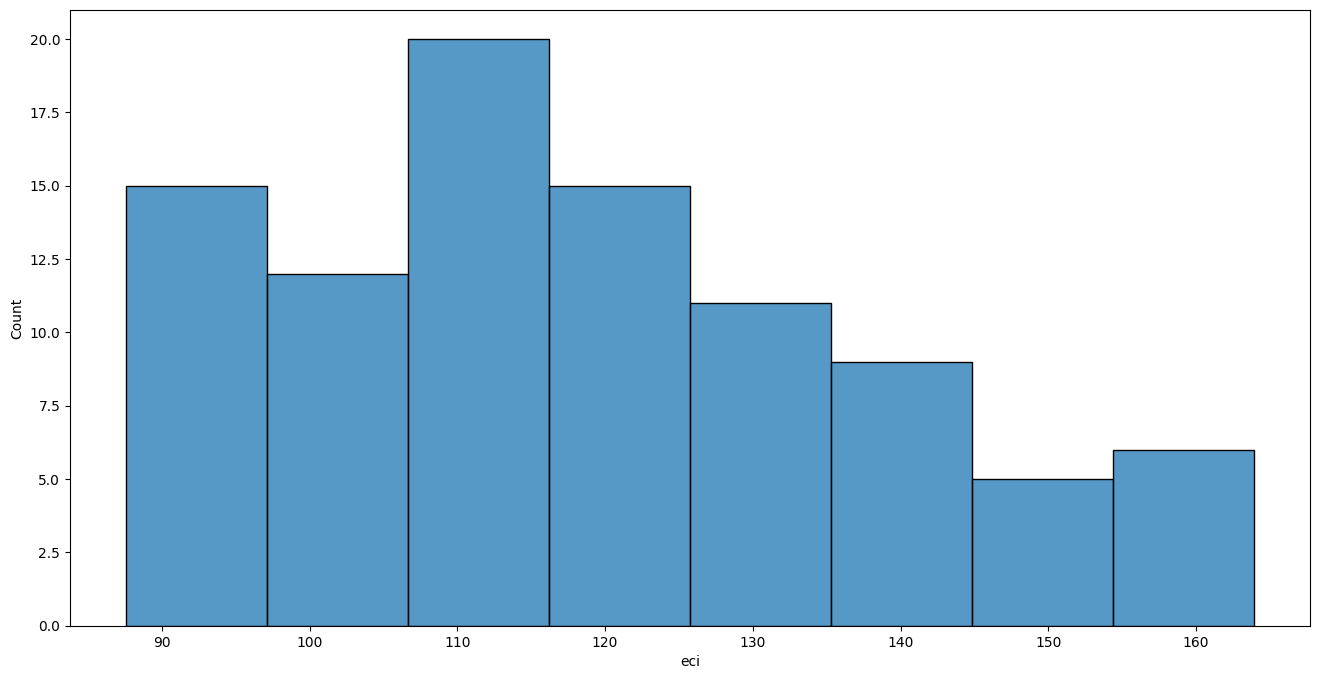

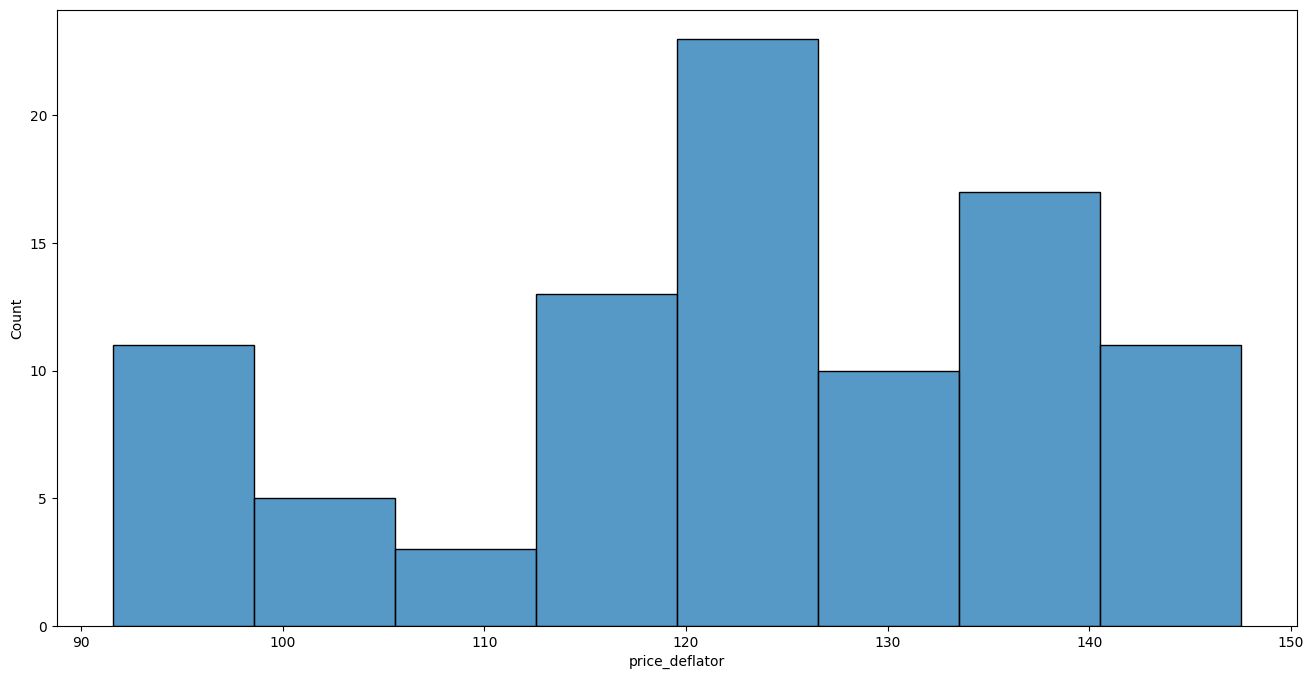

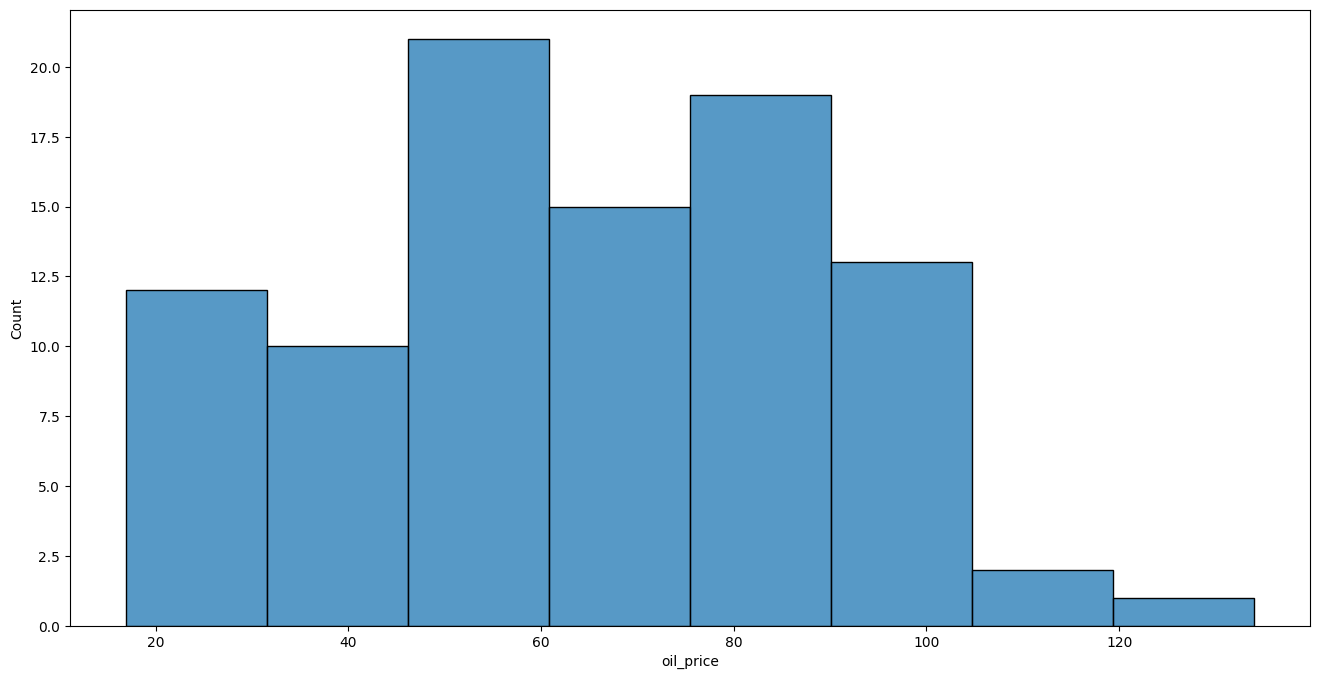

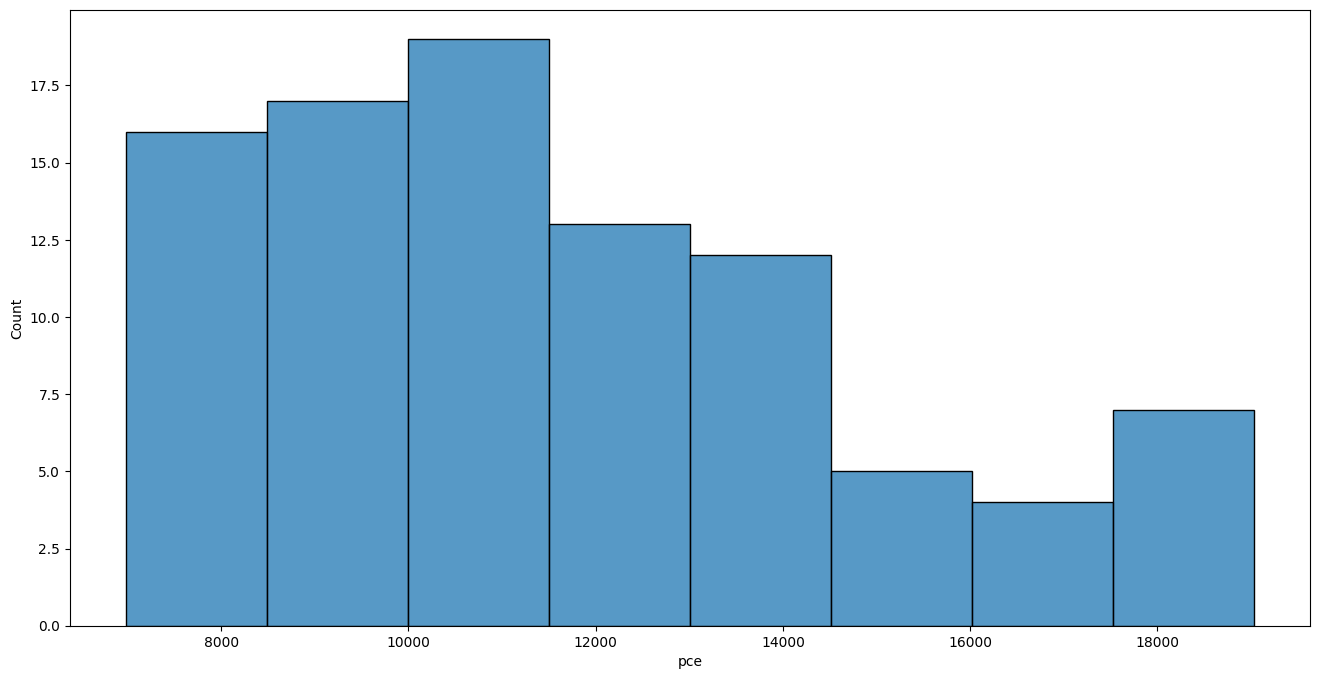

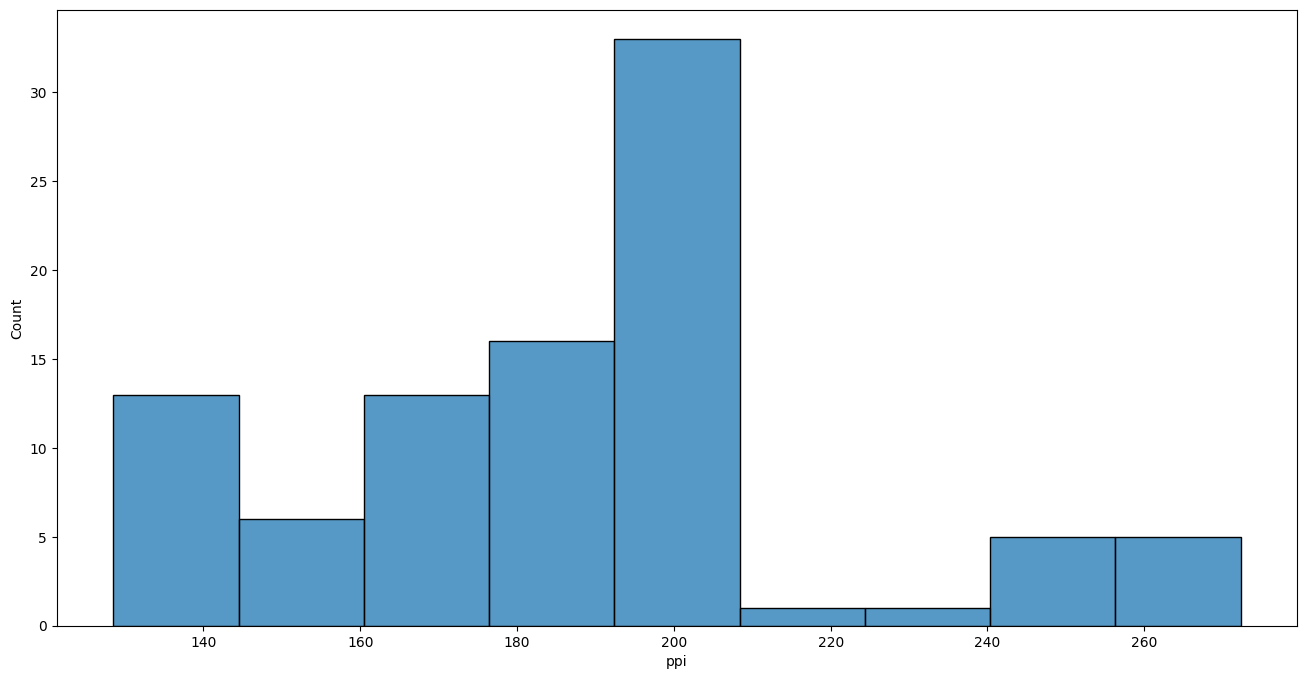

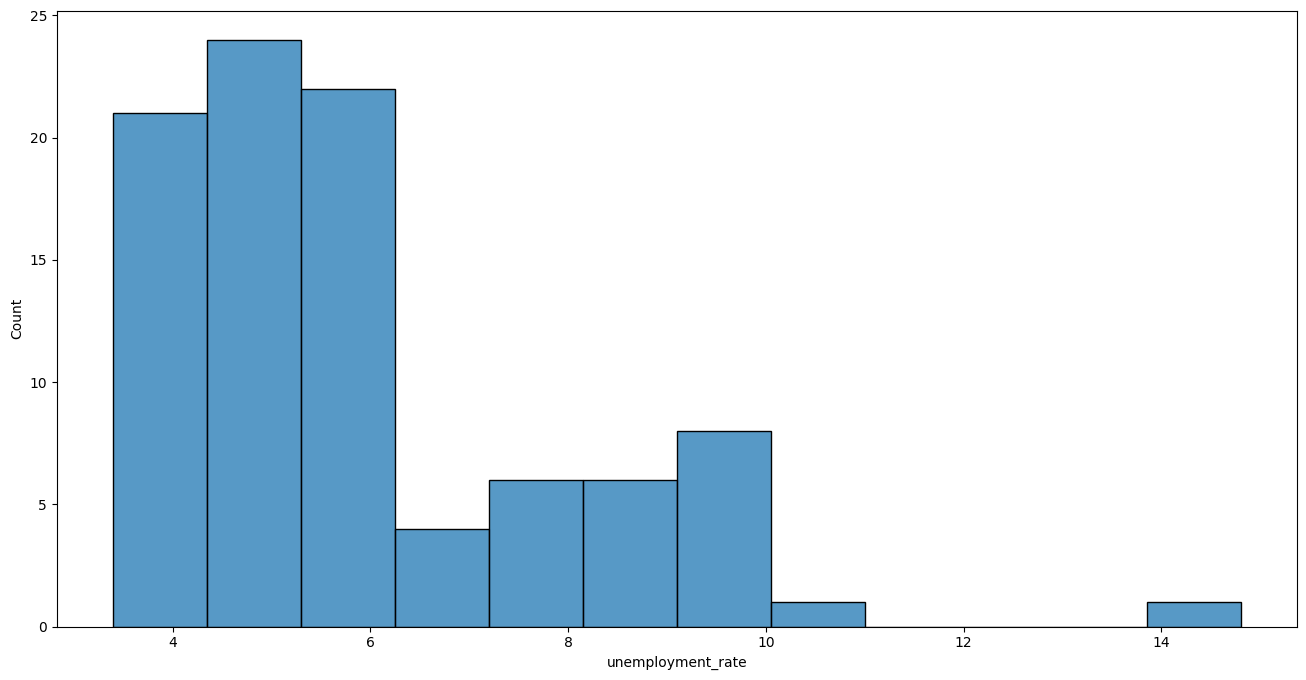

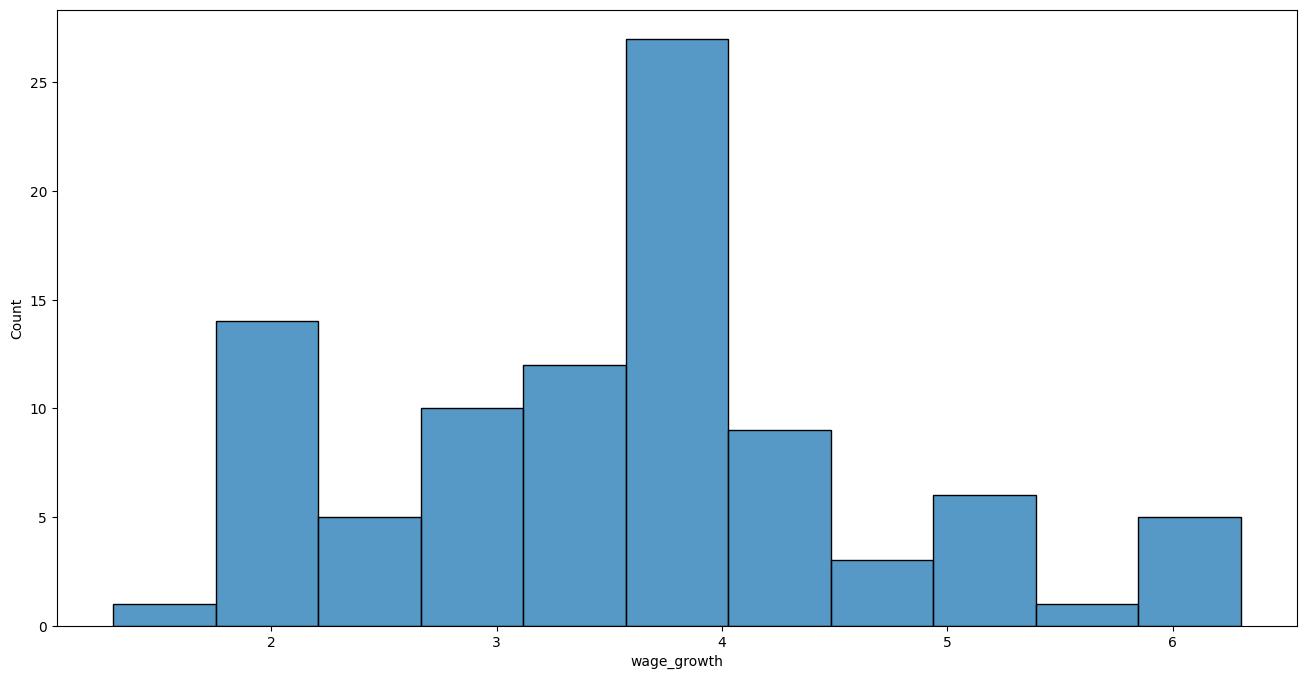

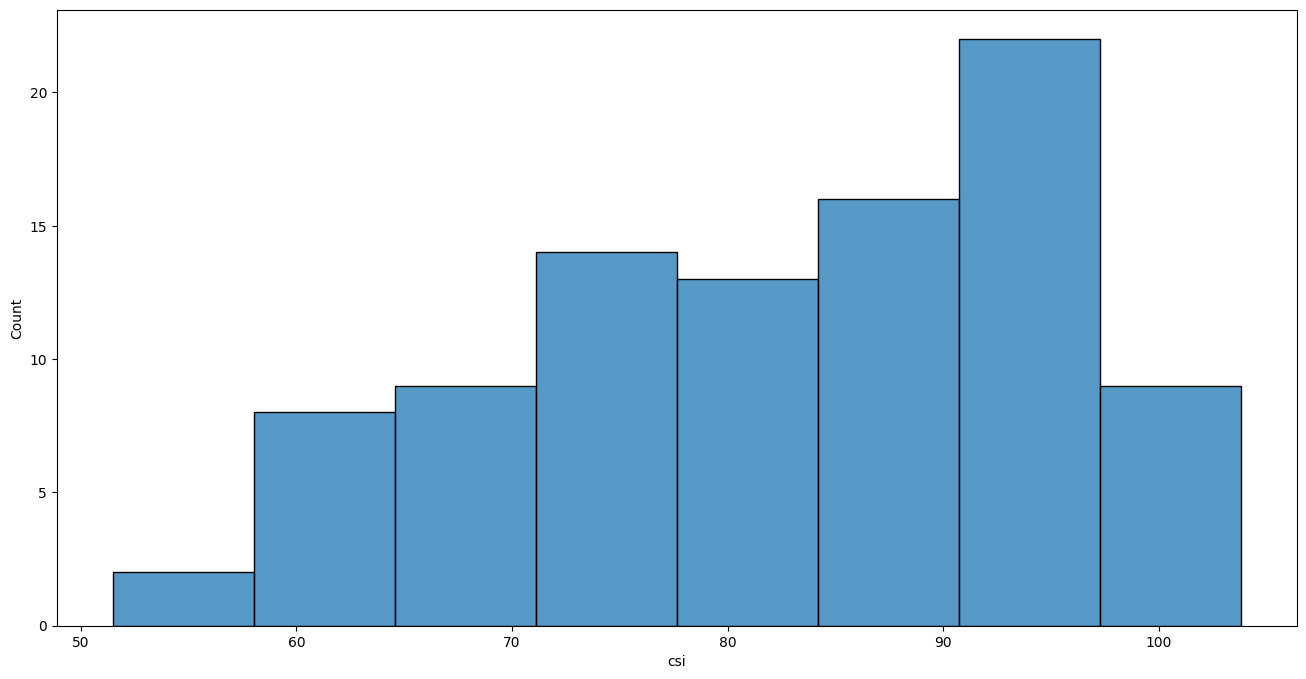

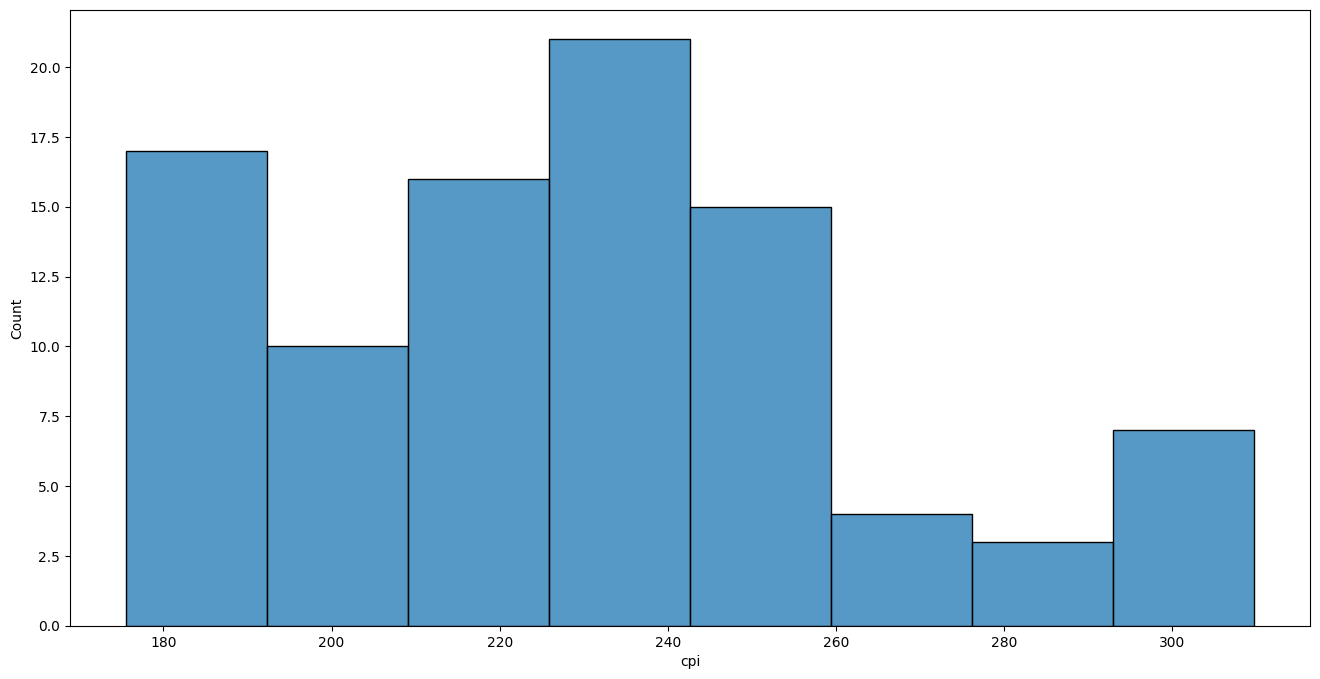

In [37]:
for column in df.columns:
    plt.figure(figsize=(16, 8))
    sns.histplot(df[column])
    plt.plot()

In [38]:
from scipy.stats import skew, kurtosis

In [39]:
# check skewness and kurtosis
from scipy.stats import skew, kurtosis

def check_skewedness(df, col):
    print(col.upper())
    print(skew(df[col]))
    if (skew(df[col]) < 0.5) and (skew(df[col]) > -0.5):
        print('Normal distribution.')
    elif skew(df[col]) > 0.5:
        print('Right skewed detected!')
    else:
        print('Left skewed detected!')
    print('*' * 100)

def check_kurtosis(df, col):
    print(col.upper())
    print(kurtosis(df[col]))
    if kurtosis(df[col]) == 3:
        print('Normal distribution.')
    else:
        print('Possible outliers detected! XXXXXXXXXXXXXXXXX')

In [40]:
# check all the skewedness value and kurtosis values:
for column in df.columns:
    check_skewedness(df, column)
    print()
    check_kurtosis(df, column)

ECI
0.443139656332699
Normal distribution.
****************************************************************************************************

ECI
-0.606557040782929
Possible outliers detected! XXXXXXXXXXXXXXXXX
PRICE_DEFLATOR
-0.449508578073244
Normal distribution.
****************************************************************************************************

PRICE_DEFLATOR
-0.7419787434391933
Possible outliers detected! XXXXXXXXXXXXXXXXX
OIL_PRICE
0.1584976161507253
Normal distribution.
****************************************************************************************************

OIL_PRICE
-0.7081764503611807
Possible outliers detected! XXXXXXXXXXXXXXXXX
PCE
0.6071519617828963
Right skewed detected!
****************************************************************************************************

PCE
-0.3708944086933248
Possible outliers detected! XXXXXXXXXXXXXXXXX
PPI
0.33438182626834845
Normal distribution.
*********************************************************

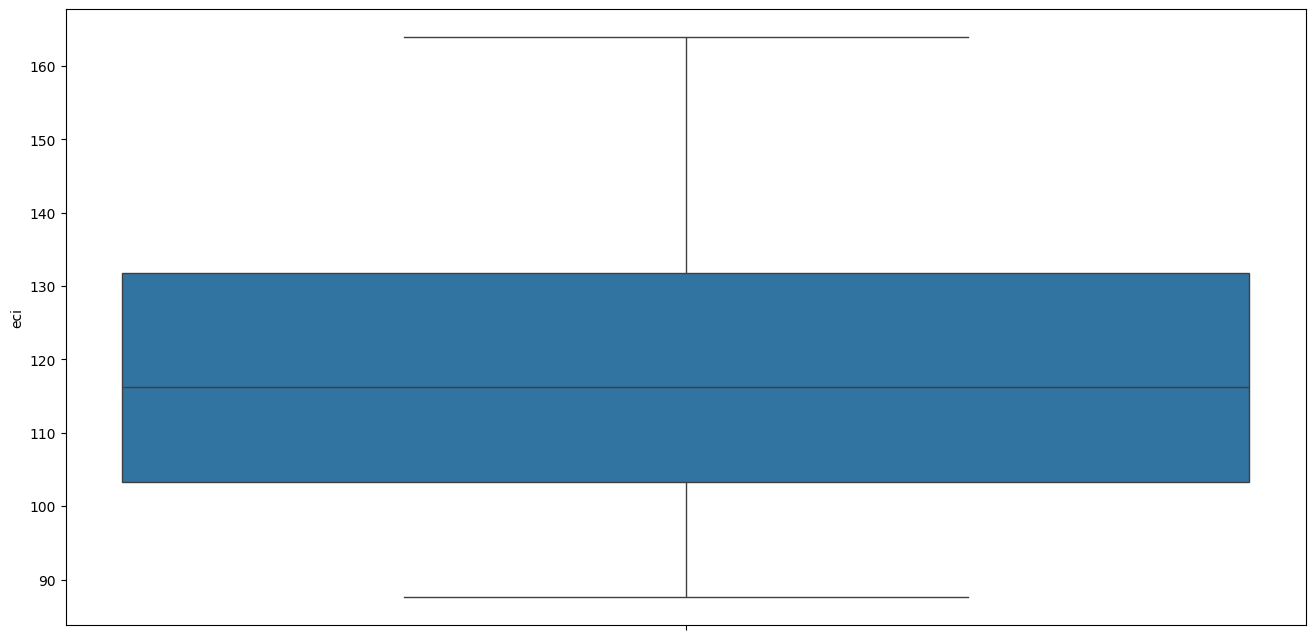

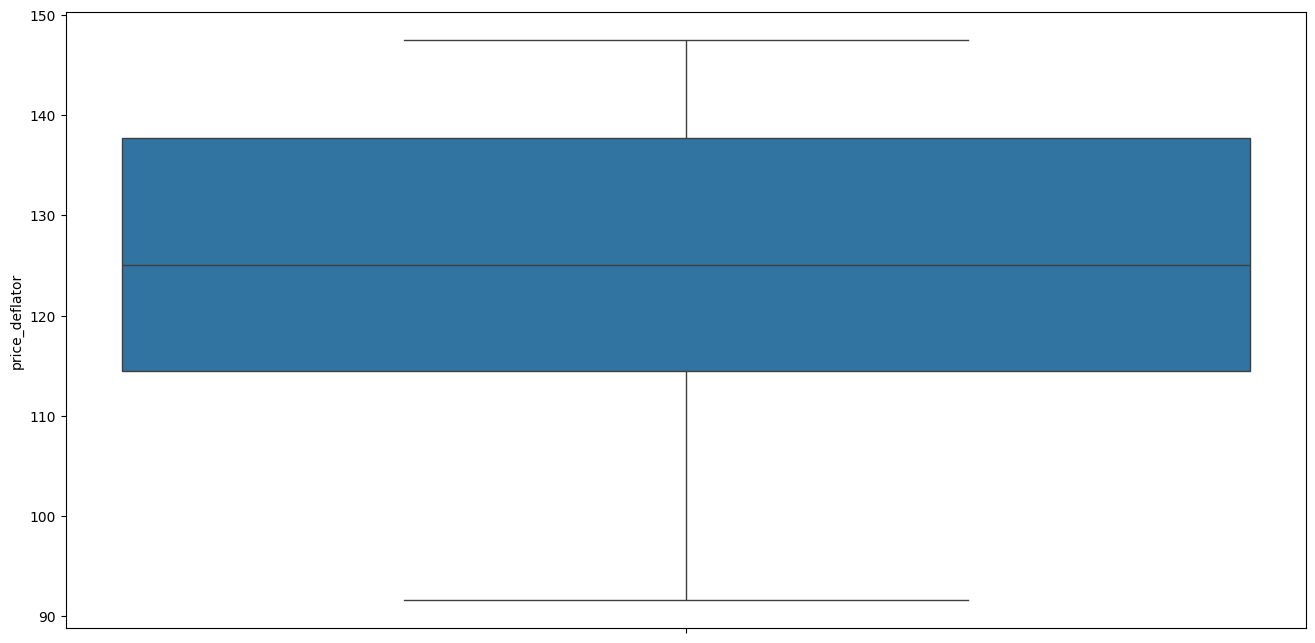

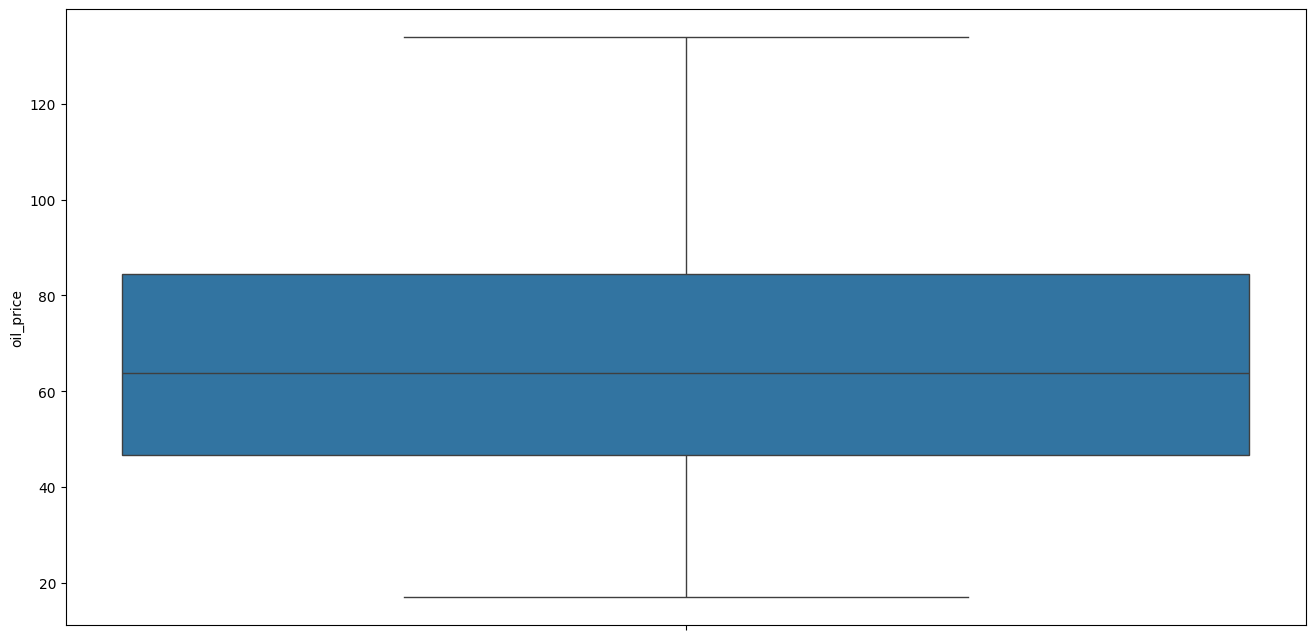

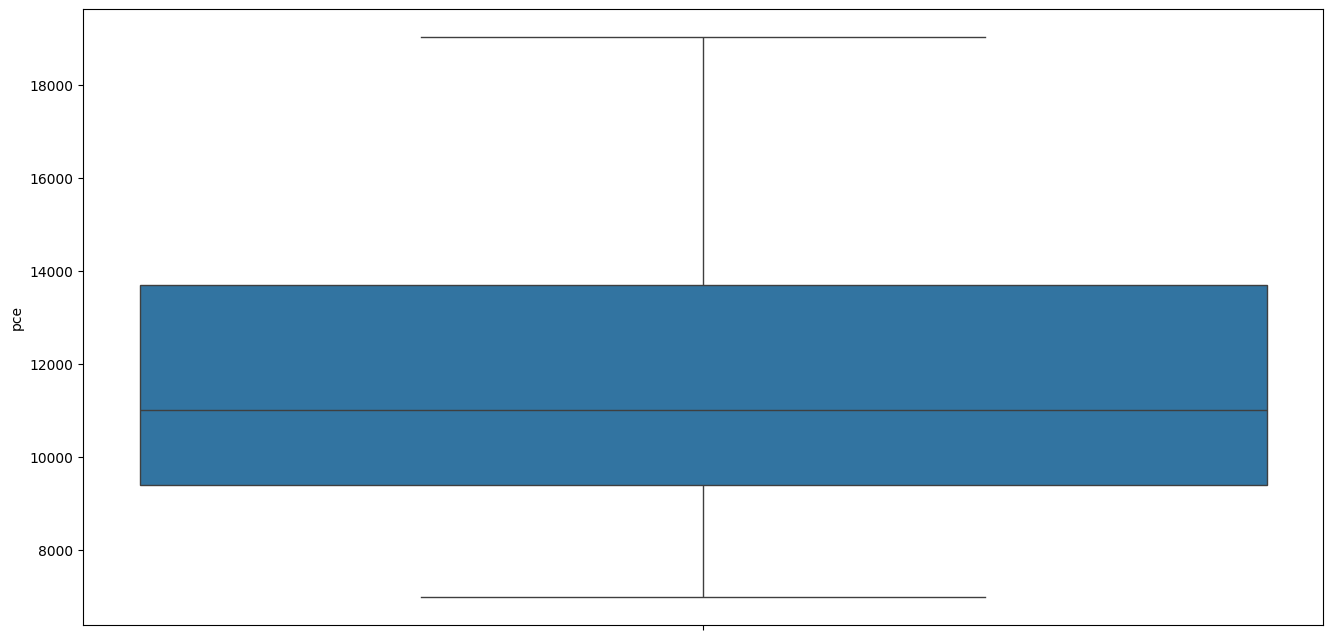

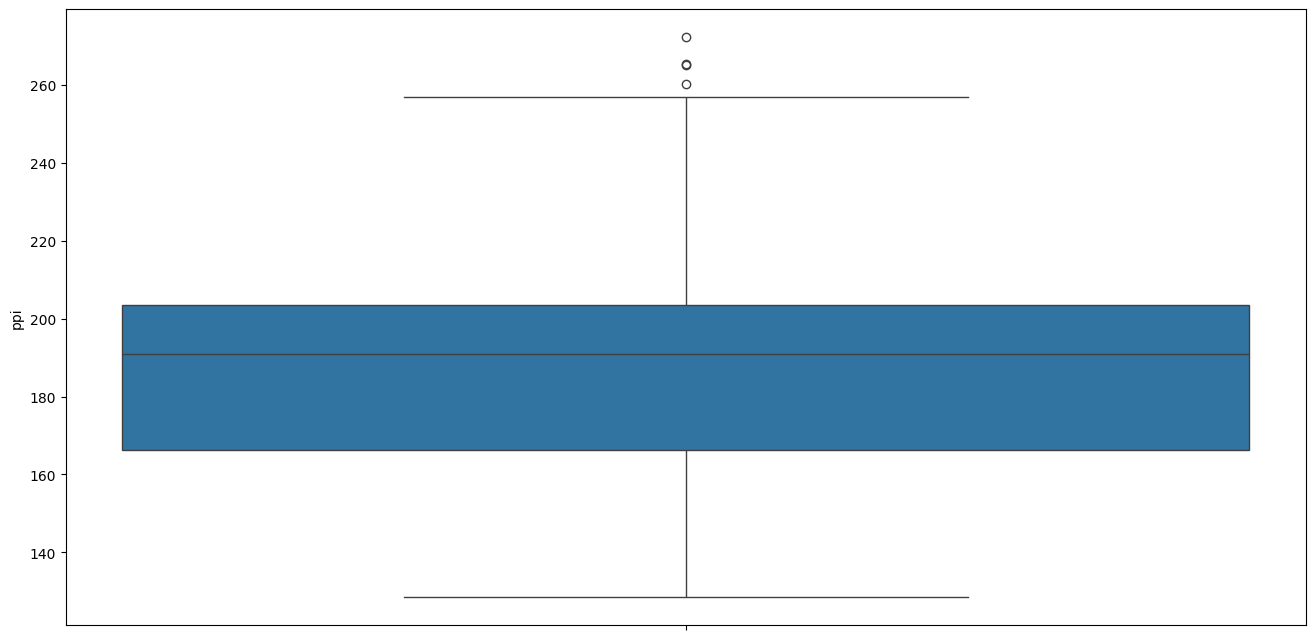

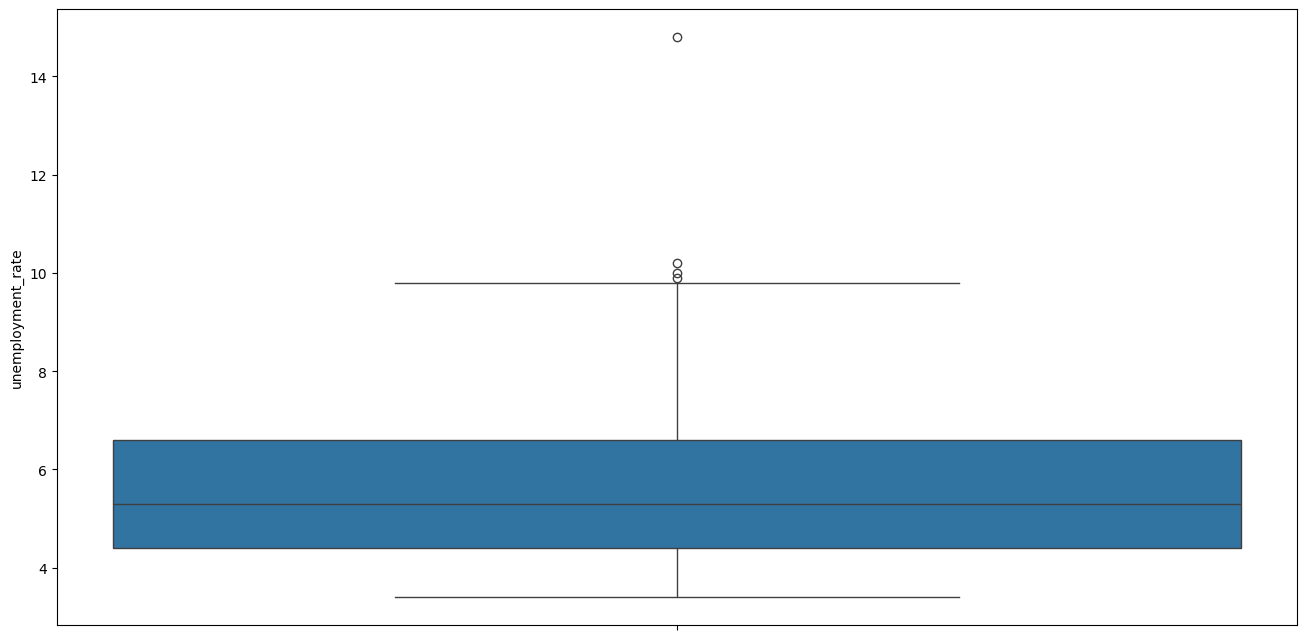

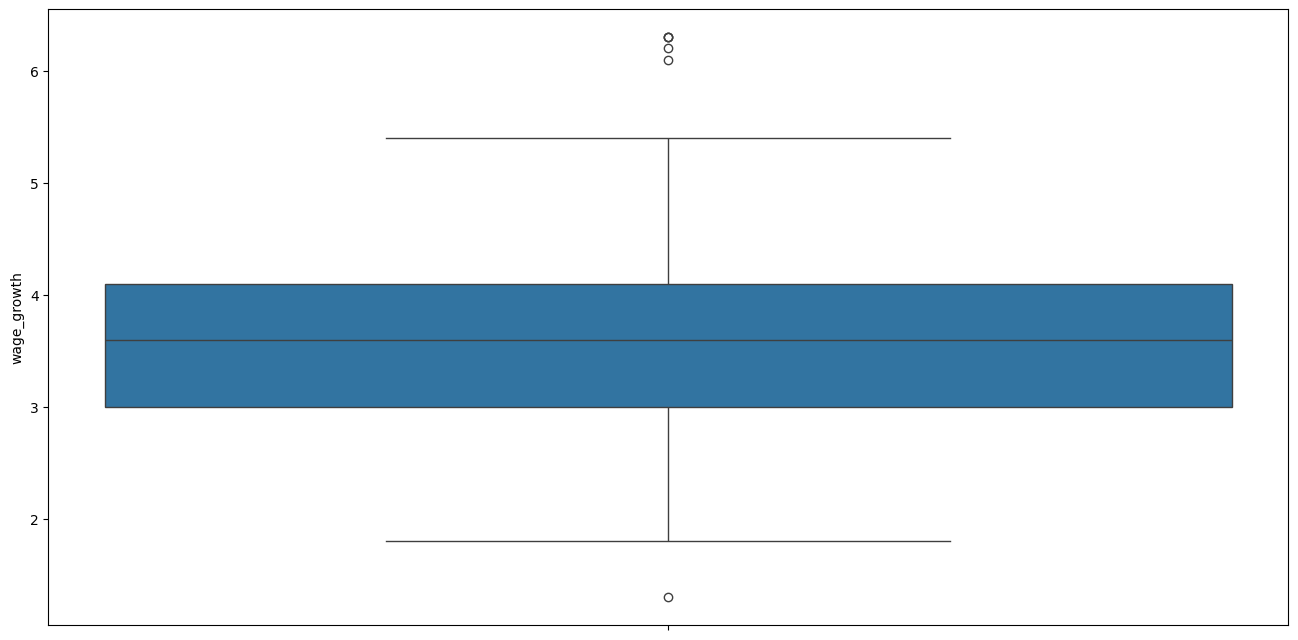

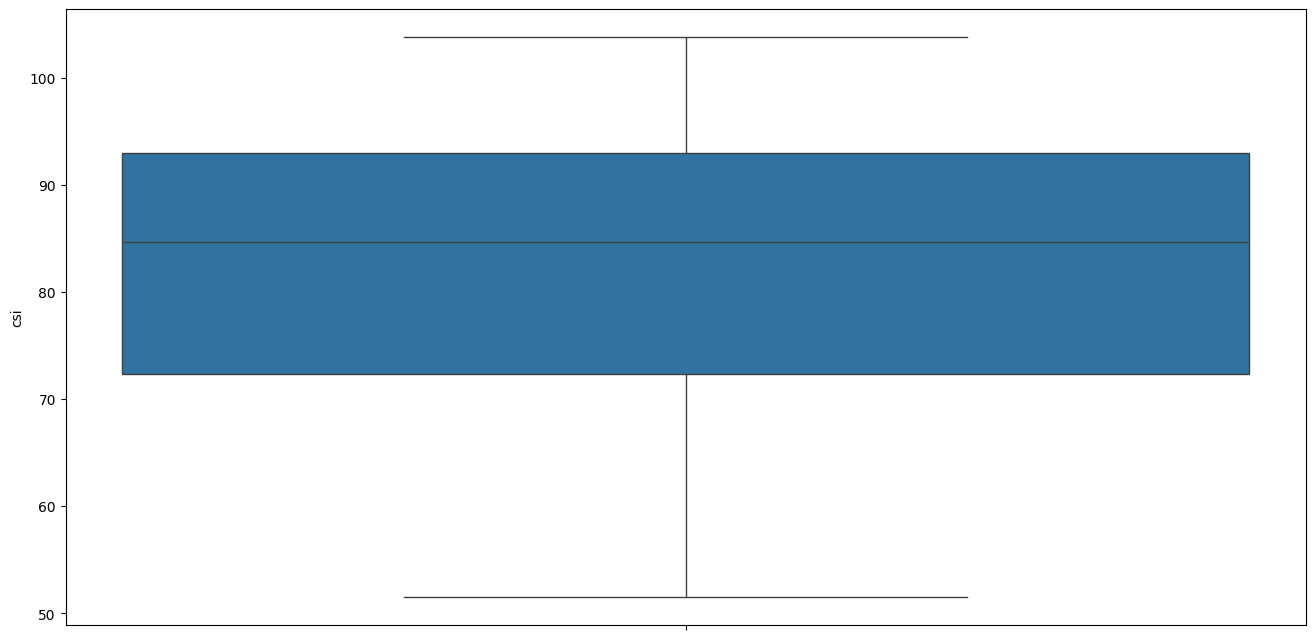

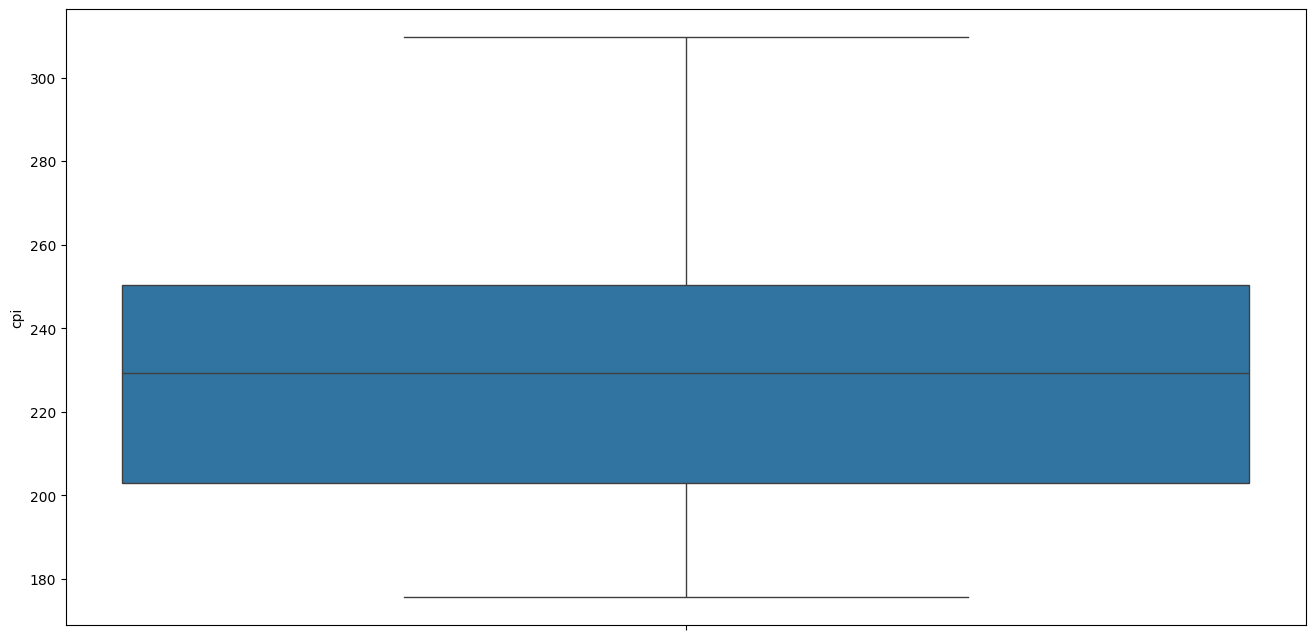

In [41]:
for column in df.columns:
    plt.figure(figsize=(16, 8))
    sns.boxplot(df[column])
    plt.plot()

### 3. DIVIDE THE DF INTO ONE QUATERLY DATAFRAME AND ONE YEARLY DATAFRAME AND NORMALIZATION

In [42]:
df.head(10)

,eci,price_deflator,oil_price,pce,ppi,unemployment_rate,wage_growth,csi,cpi
DATE,,,,,,,,,
2001-01-01,87.6,100.5,29.482174,6987.4,140.0,4.2,5.3,94.7,175.6
2001-04-01,88.4,97.8,27.453810,7004.2,136.4,4.4,5.4,88.4,176.4
2001-07-01,89.2,96.1,26.435909,7082.3,133.4,4.6,5.1,92.4,177.4
2001-10-01,90.0,93.7,22.210435,7212.9,130.3,5.3,5.1,82.7,177.6
2002-01-01,90.7,91.6,19.607391,7184.6,128.5,5.7,4.8,93.0,177.7
2002-04-01,91.5,94.3,26.266364,7312.5,130.8,5.9,4.1,93.0,179.3
2002-07-01,92.0,94.5,26.930000,7387.3,131.2,5.8,3.9,88.1,180.0
2002-10-01,92.4,95.5,28.853913,7435.2,133.2,5.7,3.6,80.6,181.2
2003-01-01,93.3,96.9,32.911739,7541.3,135.3,5.8,4.1,82.4,182.6


In [43]:
df_yearly = df.resample('Y').mean()

/var/folders/44/ywyr9h1x19sc31hw5rqj971w0000gn/T/ipykernel_30259/482615187.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df.resample('Y').mean()


<Axes: xlabel='DATE'>

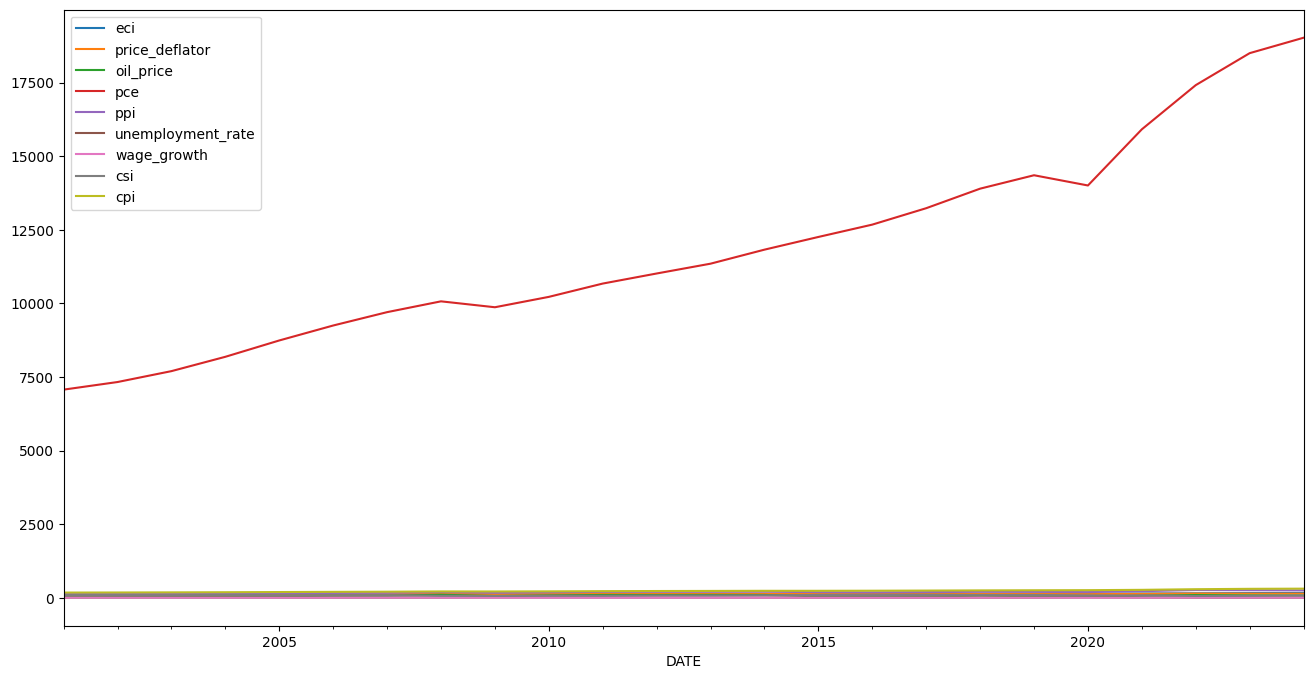

In [45]:
df_yearly.plot(figsize=(16, 8))

<Axes: xlabel='DATE'>

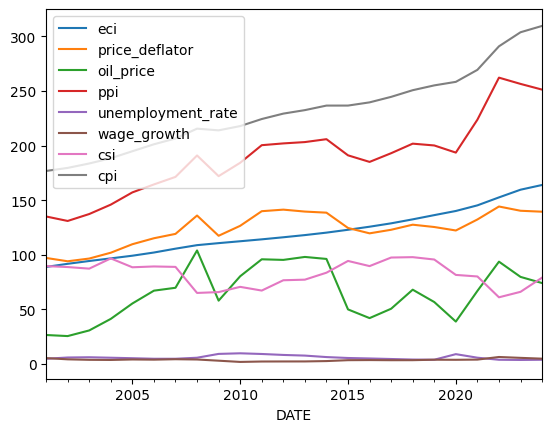

In [47]:
df_yearly[['eci', 'price_deflator', 'oil_price', 'ppi', 'unemployment_rate', 'wage_growth', 'csi', 'cpi']].plot()

In [48]:
df_yearly.corr()

,eci,price_deflator,oil_price,pce,ppi,unemployment_rate,wage_growth,csi,cpi
eci,1.000000,0.713999,0.340671,0.996106,0.927937,-0.289895,0.301075,-0.283826,0.995724
price_deflator,0.713999,1.000000,0.872990,0.707886,0.894933,0.064482,-0.126138,-0.564784,0.760252
oil_price,0.340671,0.872990,1.000000,0.347576,0.642643,0.164537,-0.234086,-0.634973,0.407858
pce,0.996106,0.707886,0.347576,1.000000,0.933843,-0.358692,0.350592,-0.271419,0.994951
ppi,0.927937,0.894933,0.642643,0.933843,1.000000,-0.207319,0.221131,-0.495669,0.954251
unemployment_rate,-0.289895,0.064482,0.164537,-0.358692,-0.207319,1.000000,-0.732246,-0.397994,-0.287584
wage_growth,0.301075,-0.126138,-0.234086,0.350592,0.221131,-0.732246,1.000000,-0.052495,0.291517
csi,-0.283826,-0.564784,-0.634973,-0.271419,-0.495669,-0.397994,-0.052495,1.000000,-0.327248
cpi,0.995724,0.760252,0.407858,0.994951,0.954251,-0.287584,0.291517,-0.327248,1.000000


In [96]:
cpi_line = df_yearly.cpi

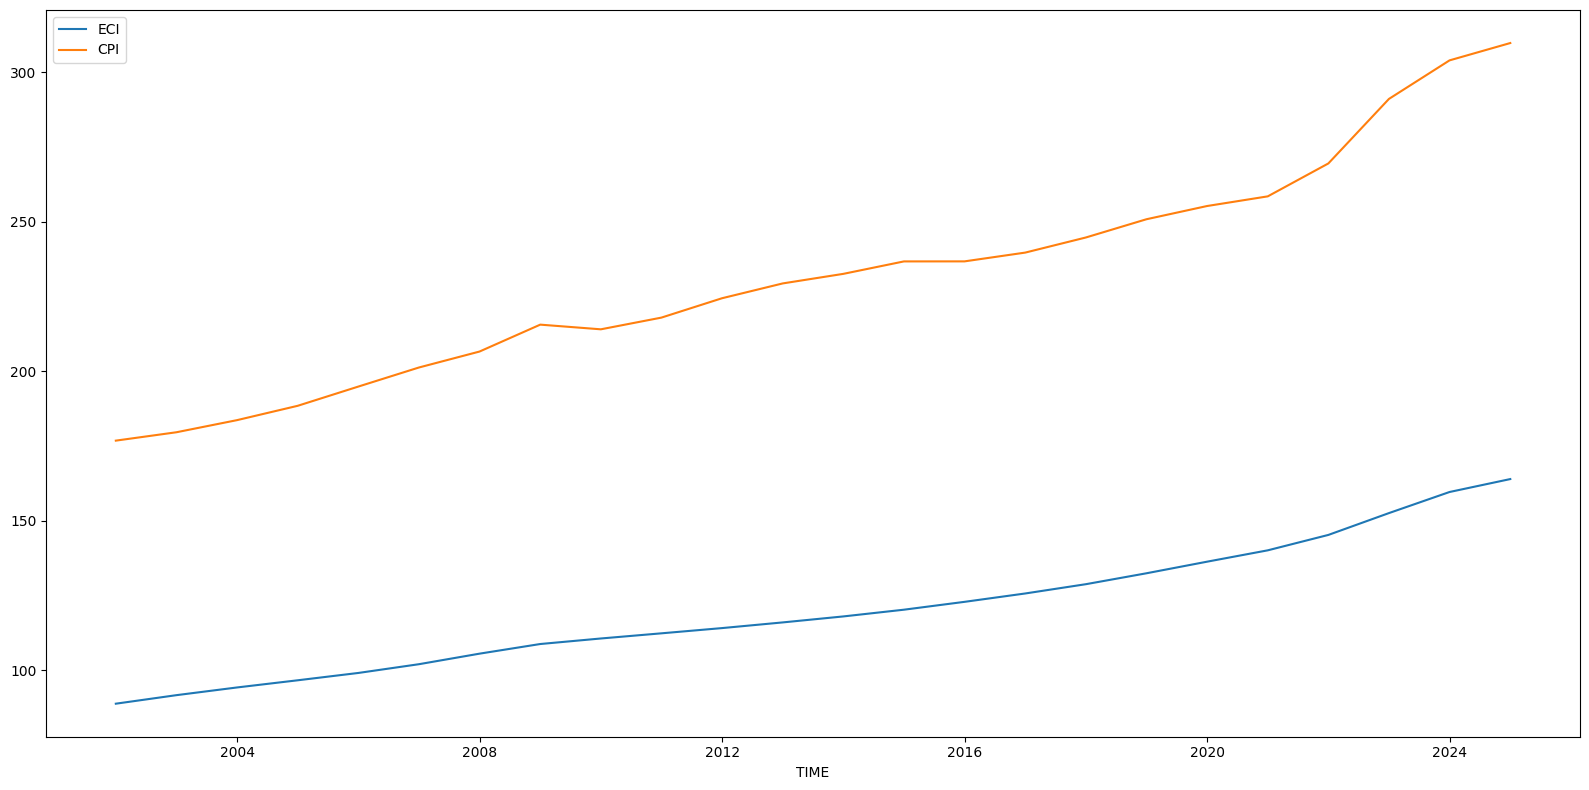

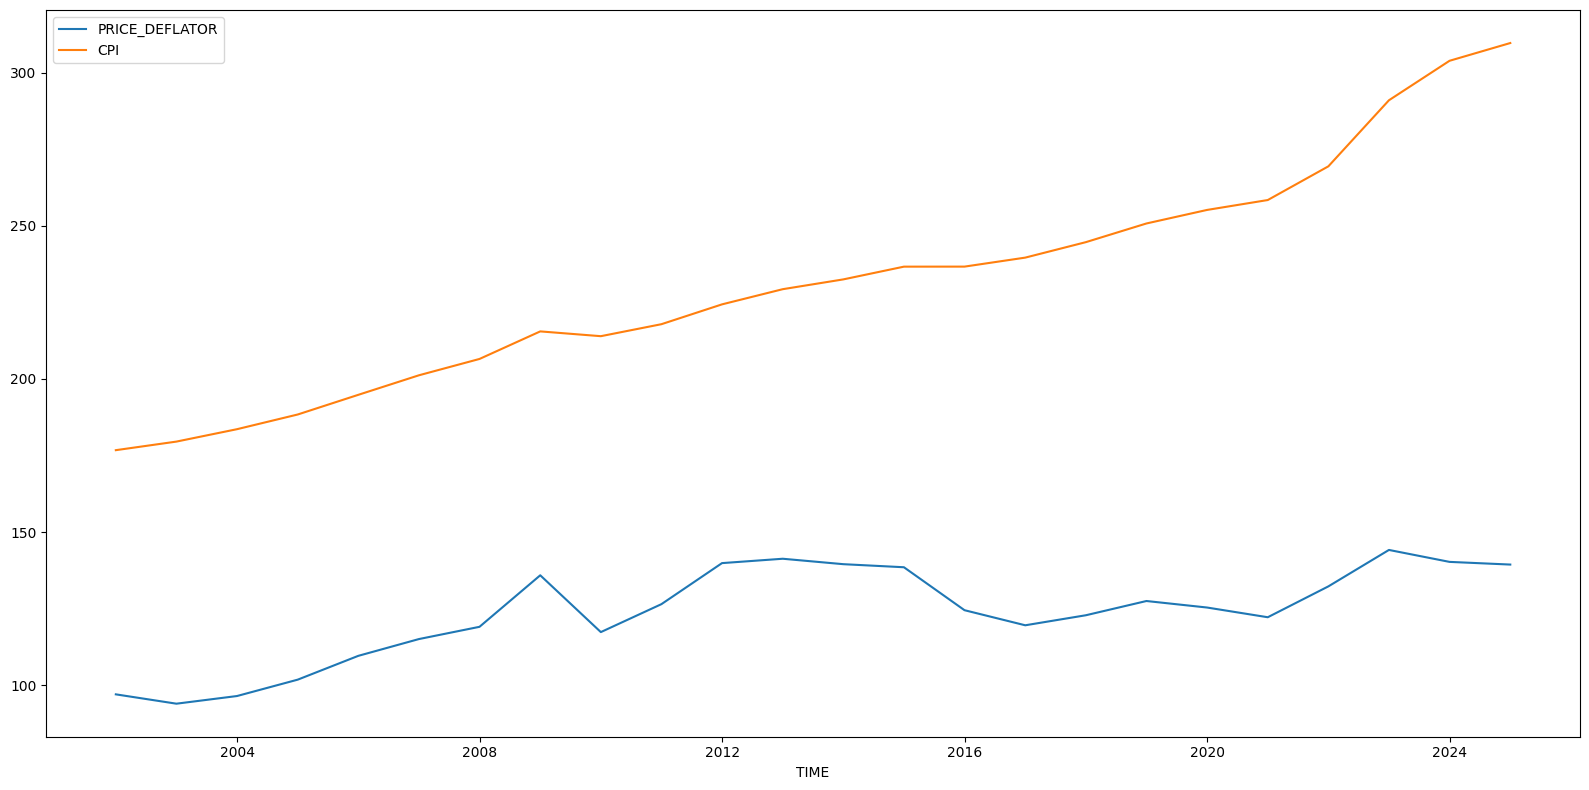

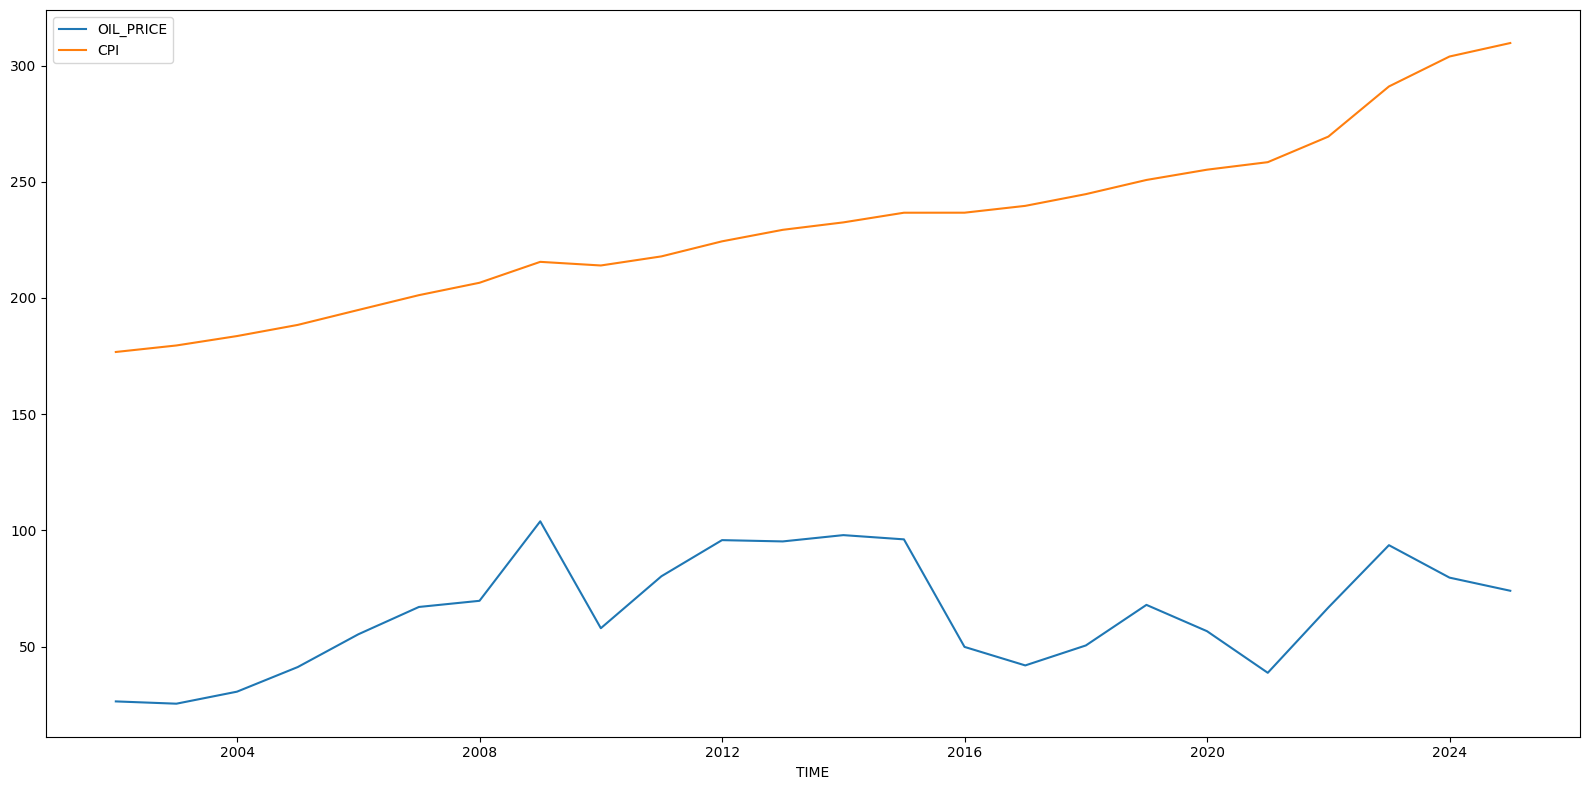

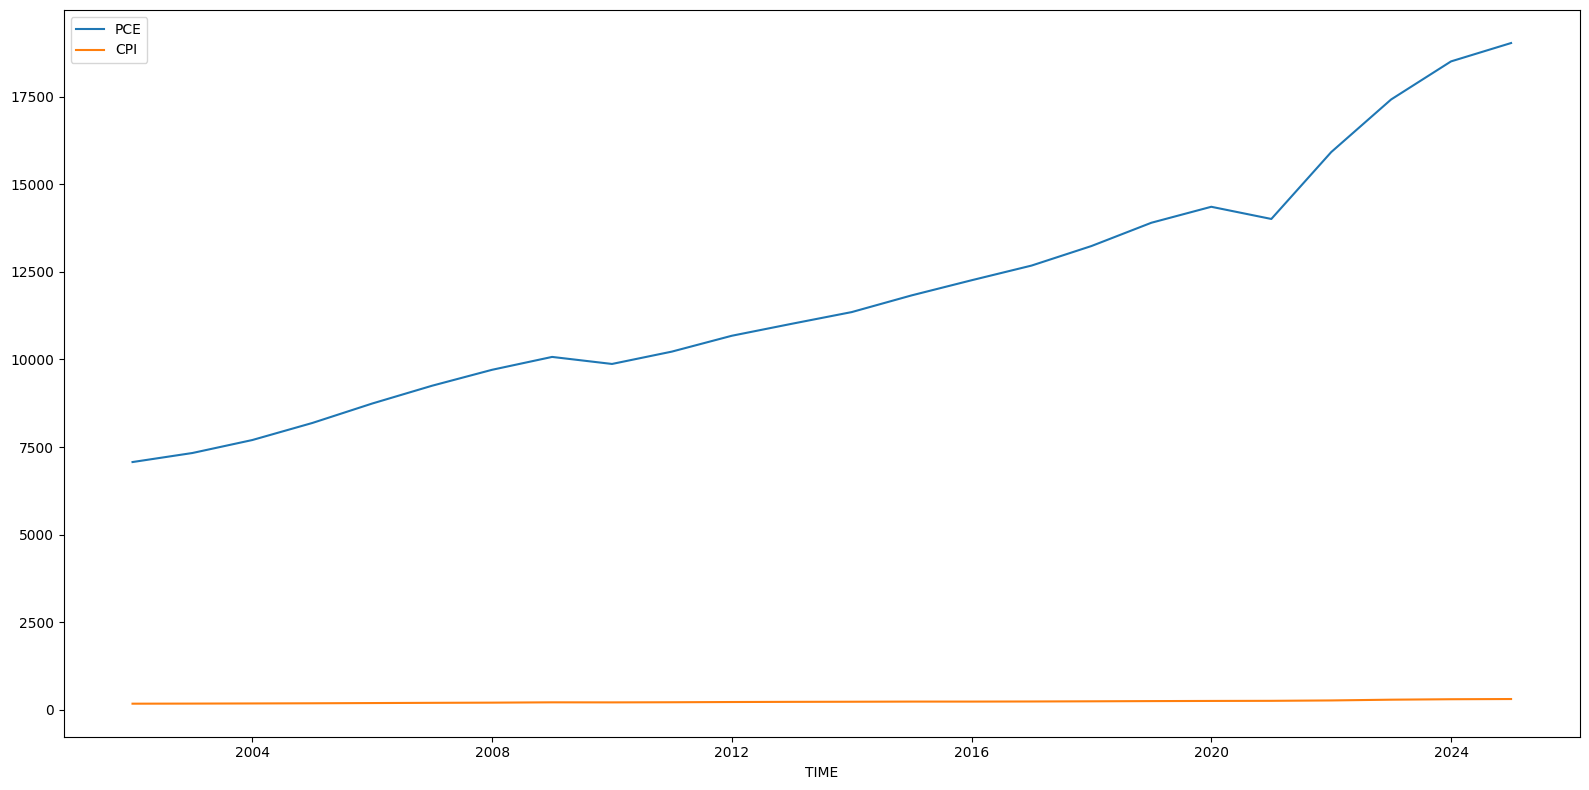

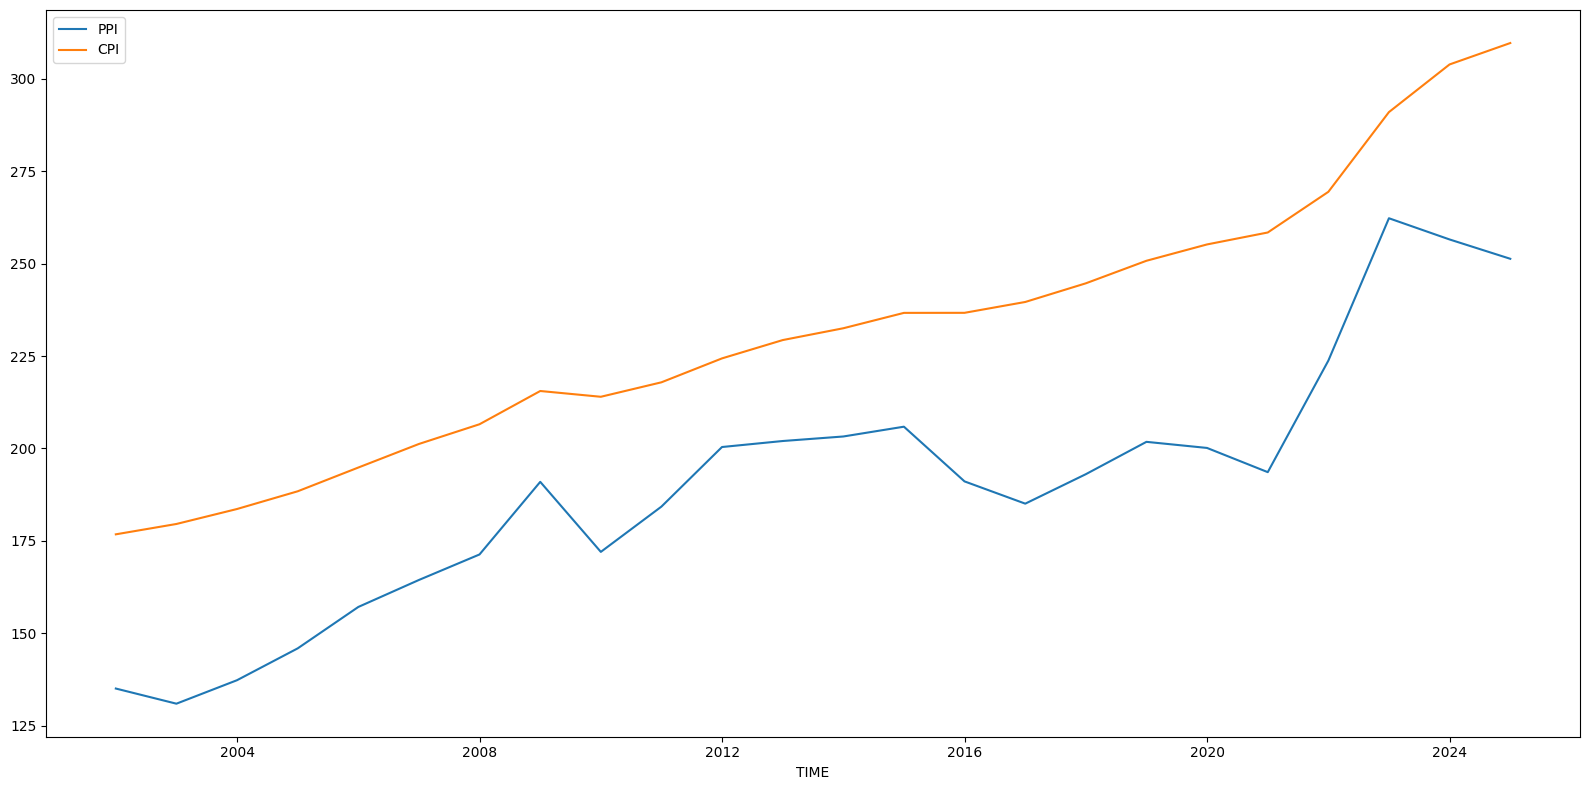

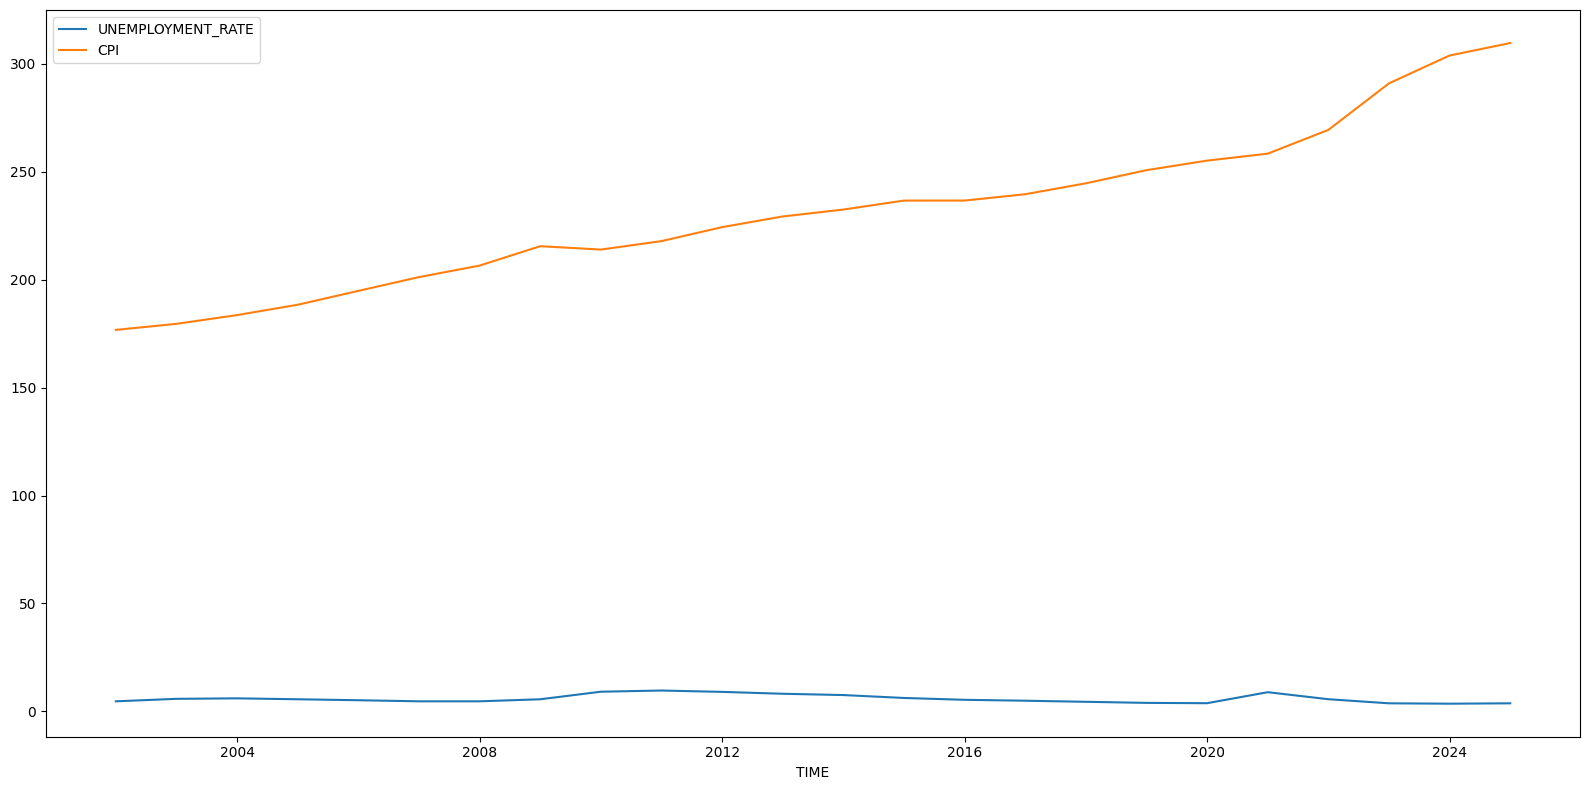

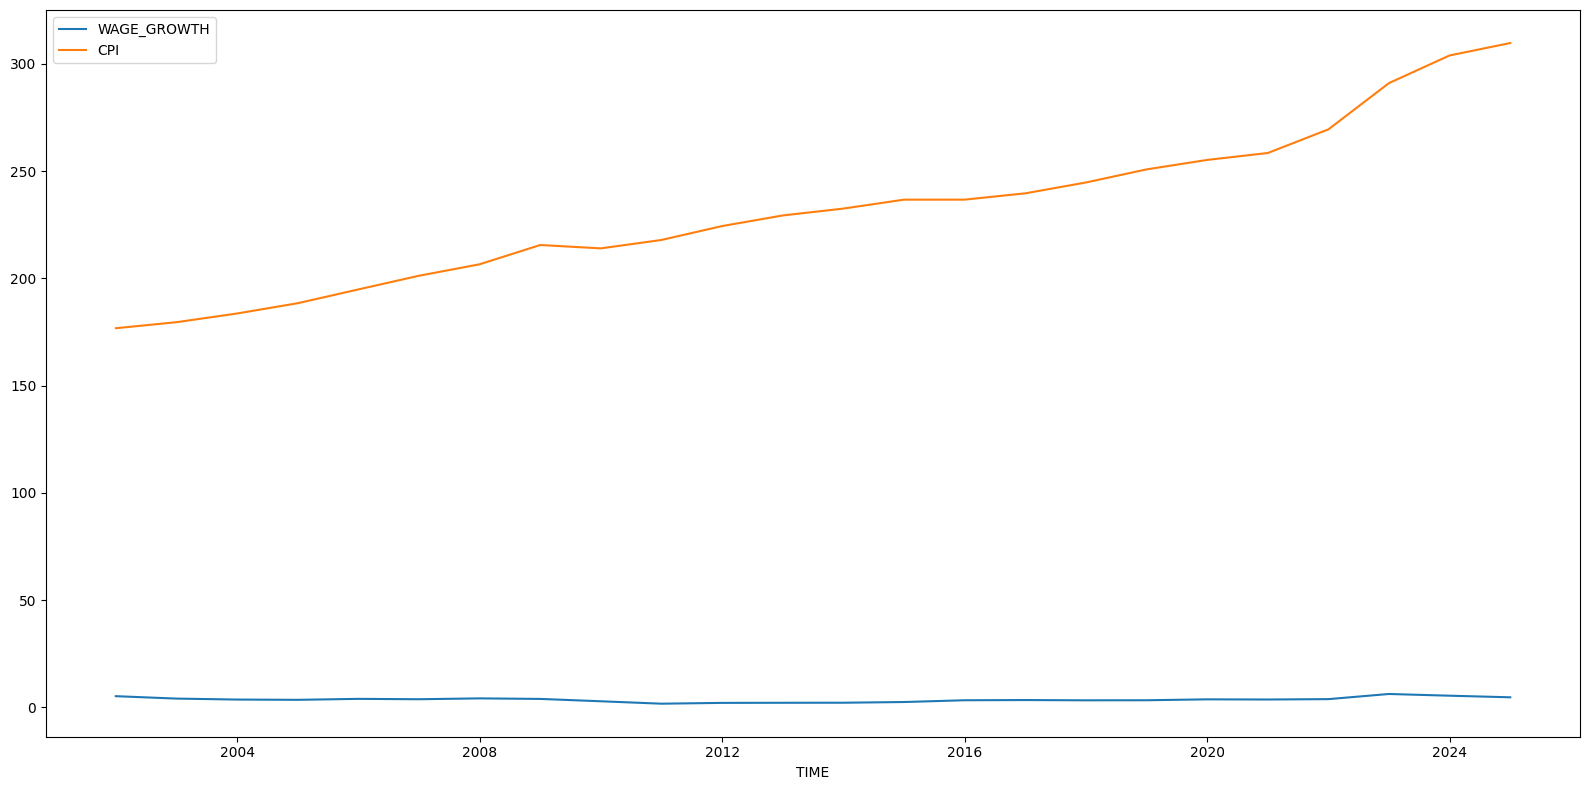

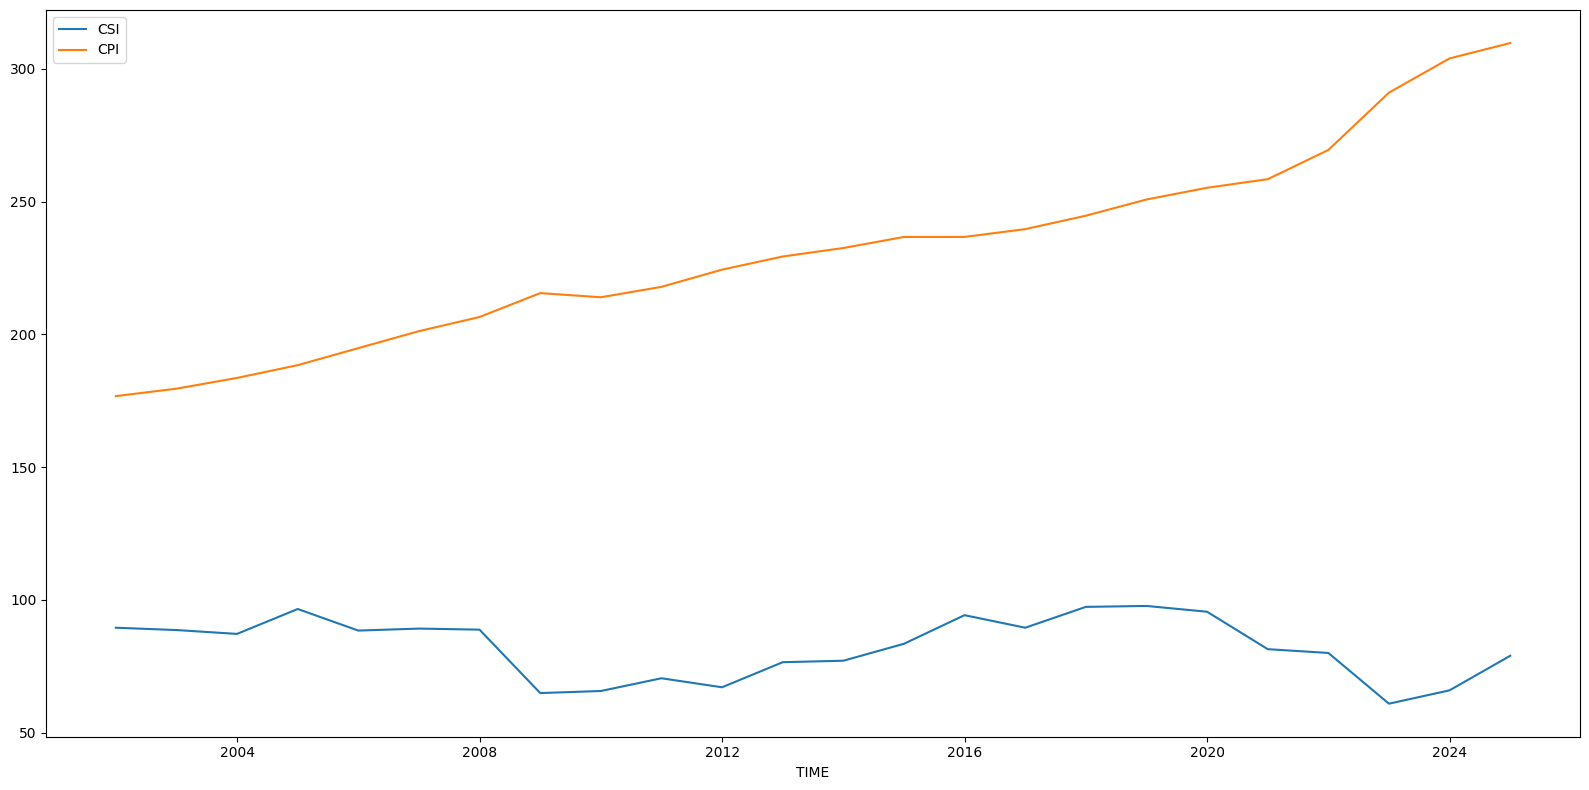

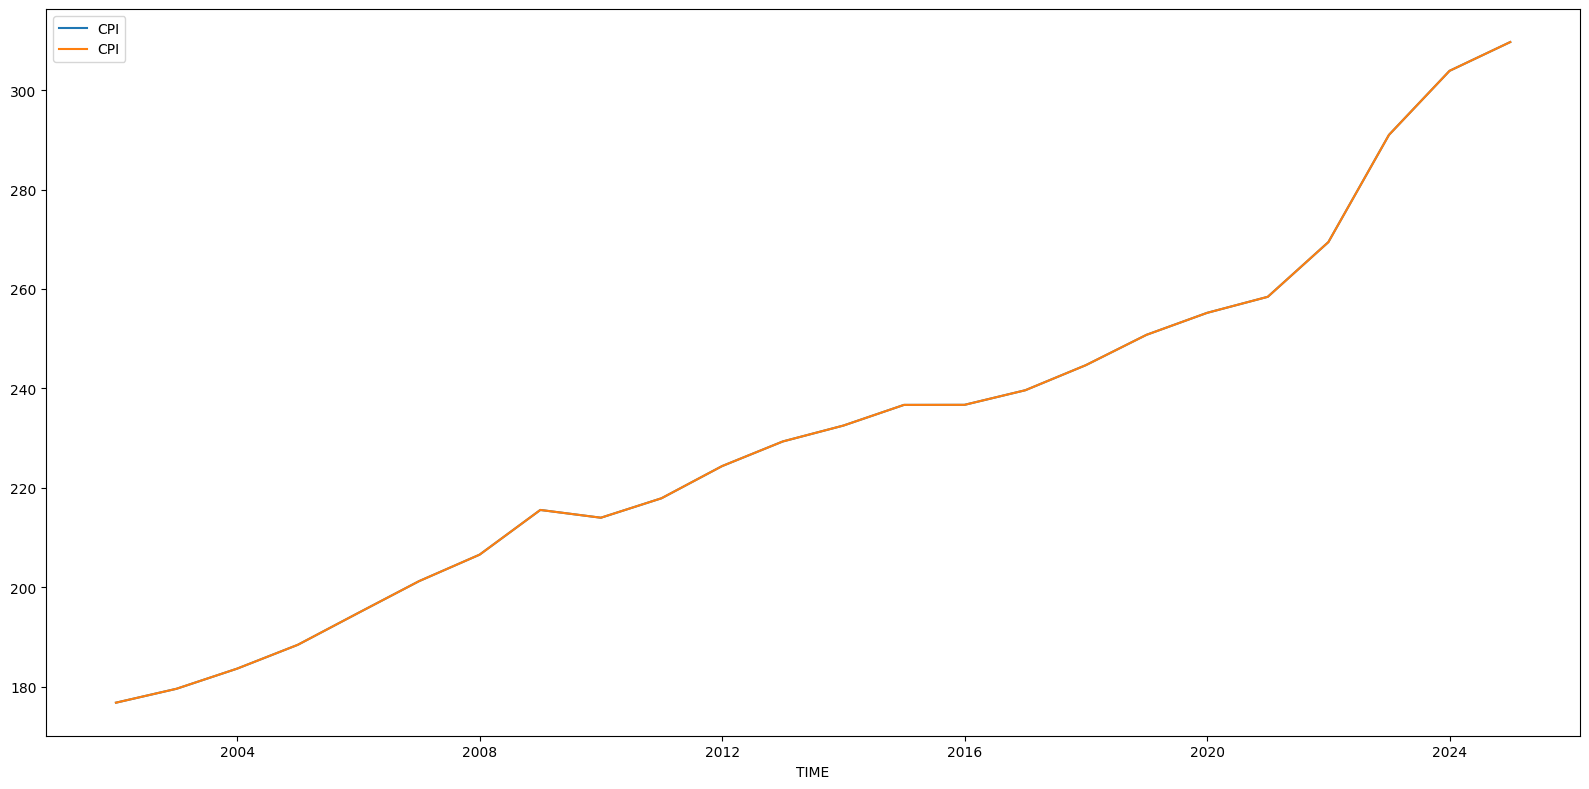

In [97]:
for column in df_yearly.columns:
    plt.figure(figsize=(16, 8))
    plt.plot(df_yearly[column], label=column.upper())
    plt.plot(cpi_line, label='CPI')
    plt.xlabel('TIME')
    plt.legend()
    plt.tight_layout()
    plt.show()

/var/folders/44/ywyr9h1x19sc31hw5rqj971w0000gn/T/ipykernel_30259/53327991.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_yearly, x = df_yearly[column], y = cpi_line, legend=True, s = 100, palette={'A':'red', 'B': 'blue'})


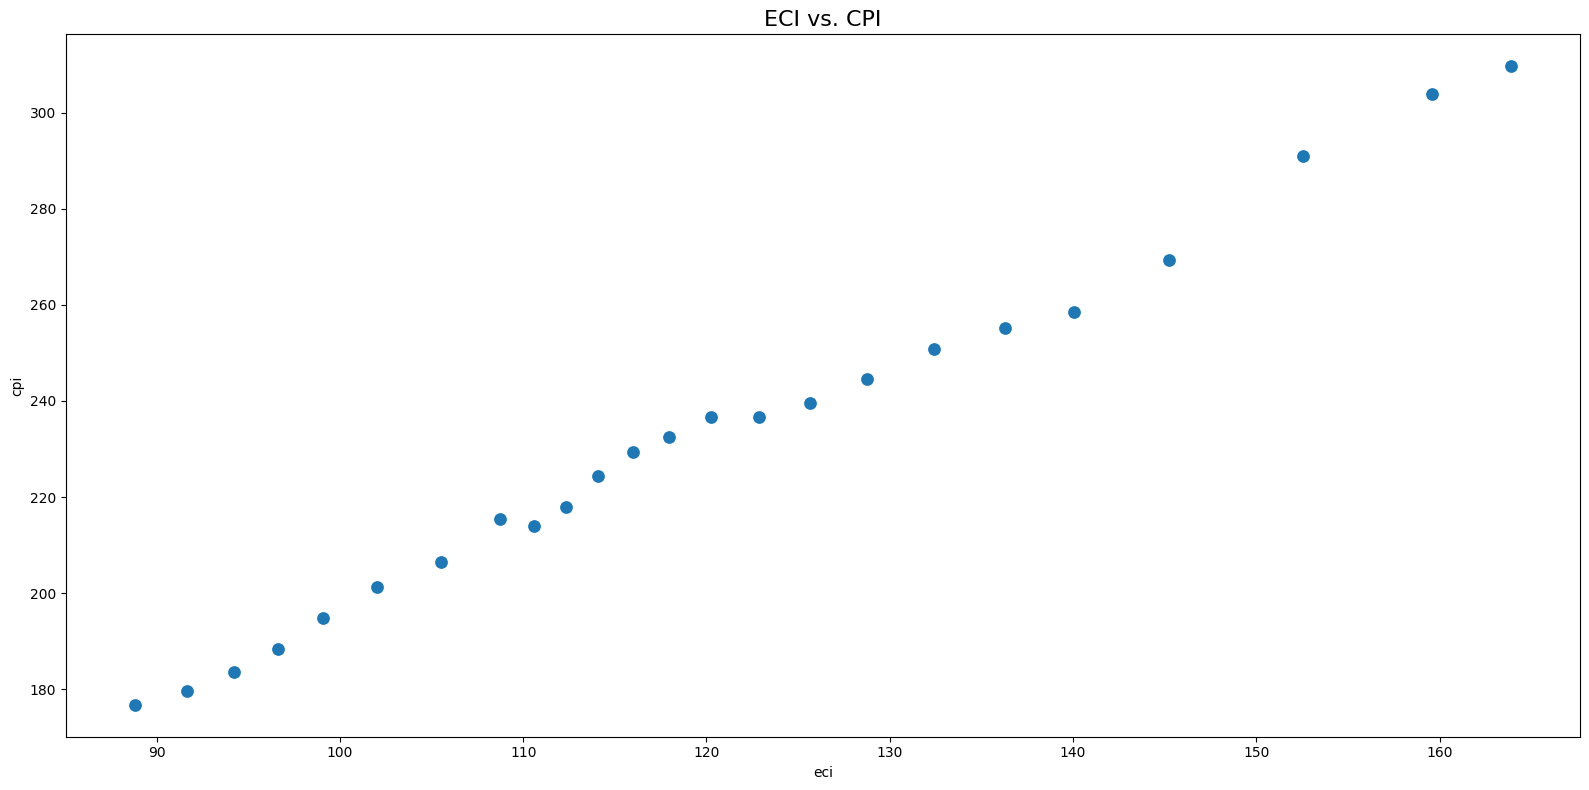

/var/folders/44/ywyr9h1x19sc31hw5rqj971w0000gn/T/ipykernel_30259/53327991.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_yearly, x = df_yearly[column], y = cpi_line, legend=True, s = 100, palette={'A':'red', 'B': 'blue'})


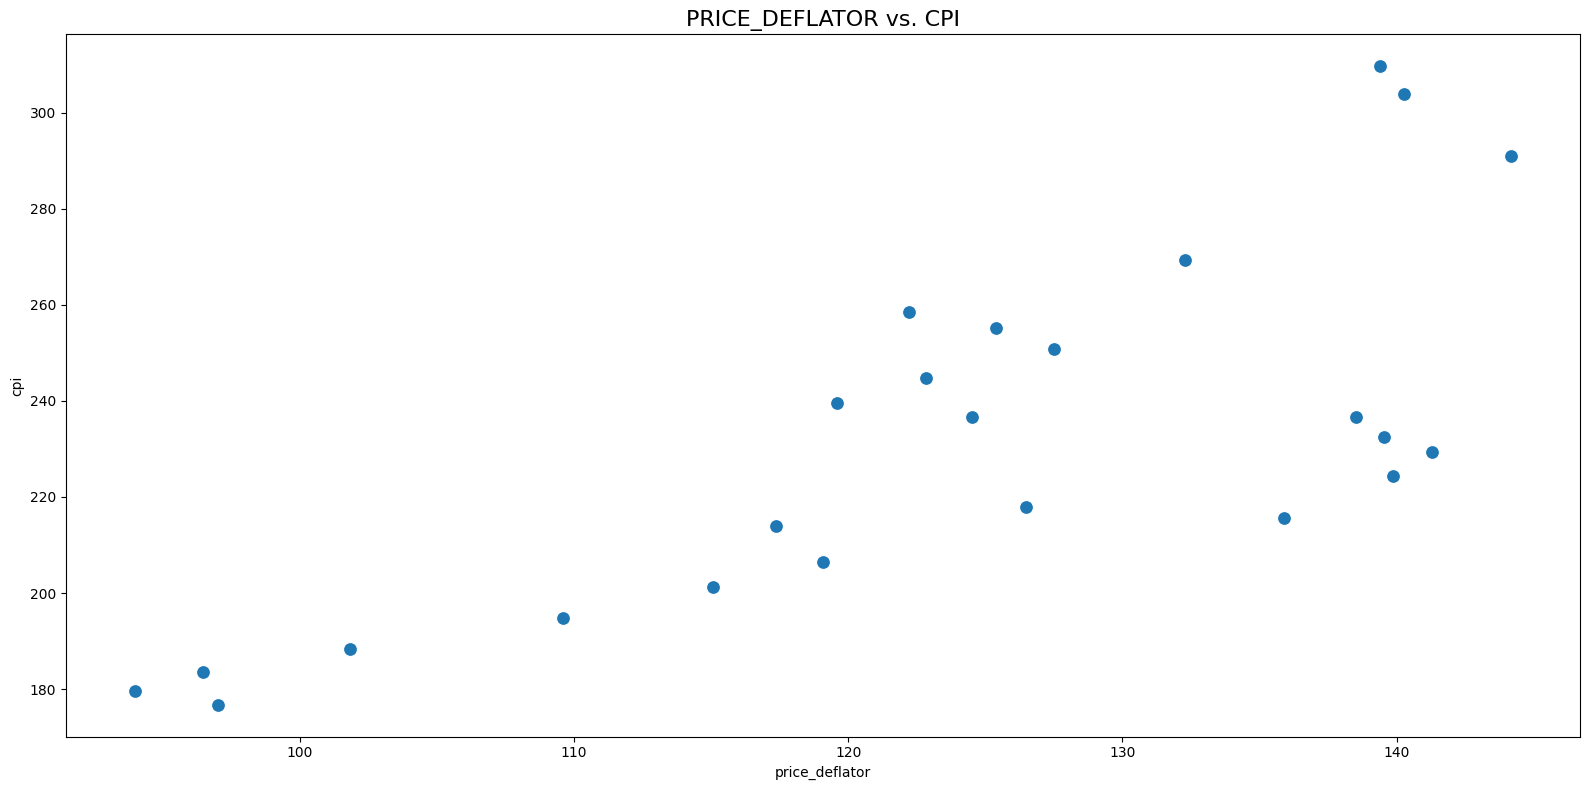

/var/folders/44/ywyr9h1x19sc31hw5rqj971w0000gn/T/ipykernel_30259/53327991.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_yearly, x = df_yearly[column], y = cpi_line, legend=True, s = 100, palette={'A':'red', 'B': 'blue'})


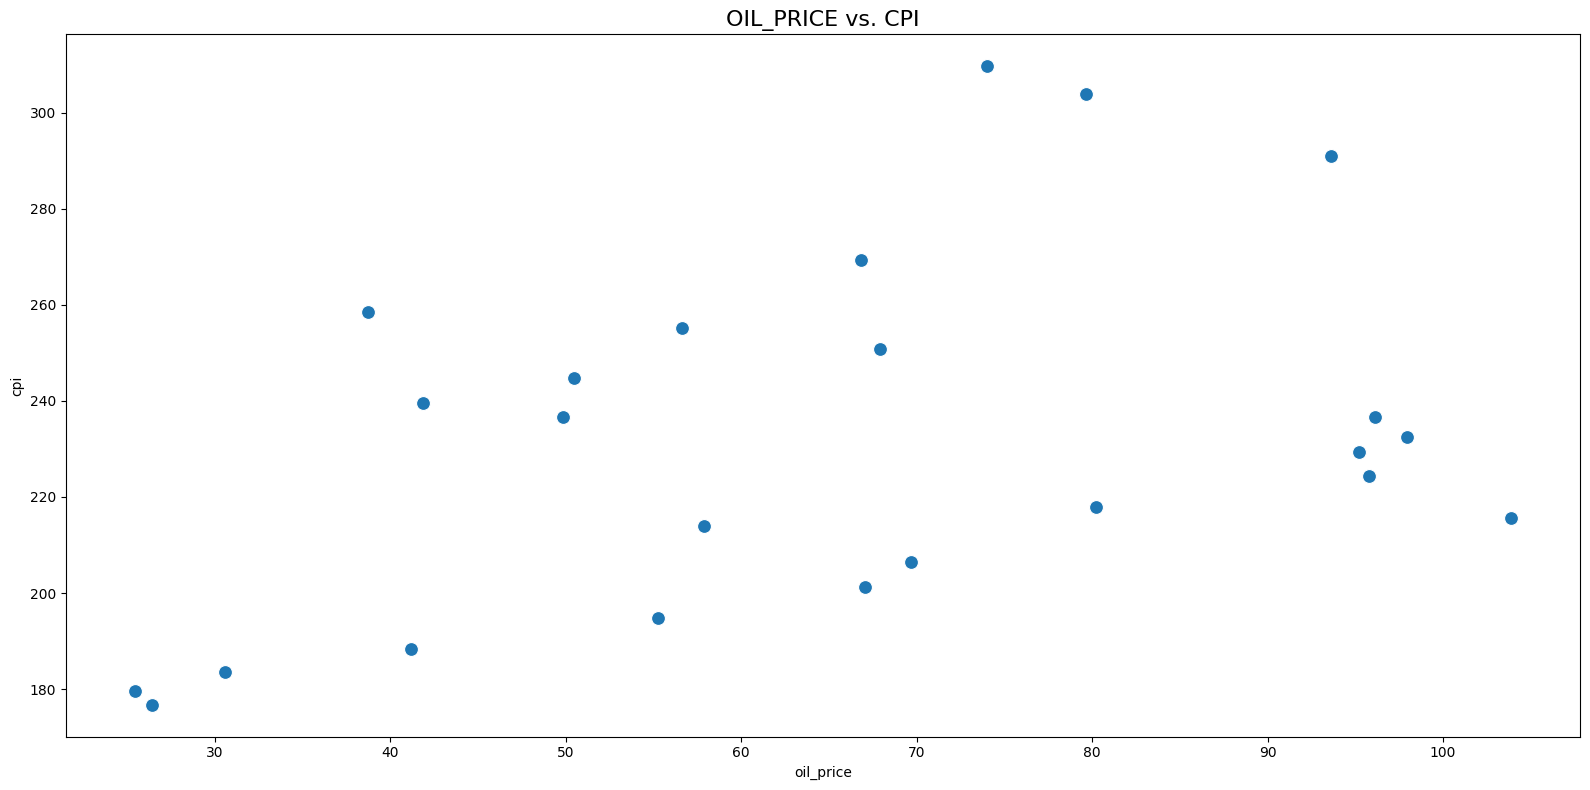

/var/folders/44/ywyr9h1x19sc31hw5rqj971w0000gn/T/ipykernel_30259/53327991.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_yearly, x = df_yearly[column], y = cpi_line, legend=True, s = 100, palette={'A':'red', 'B': 'blue'})


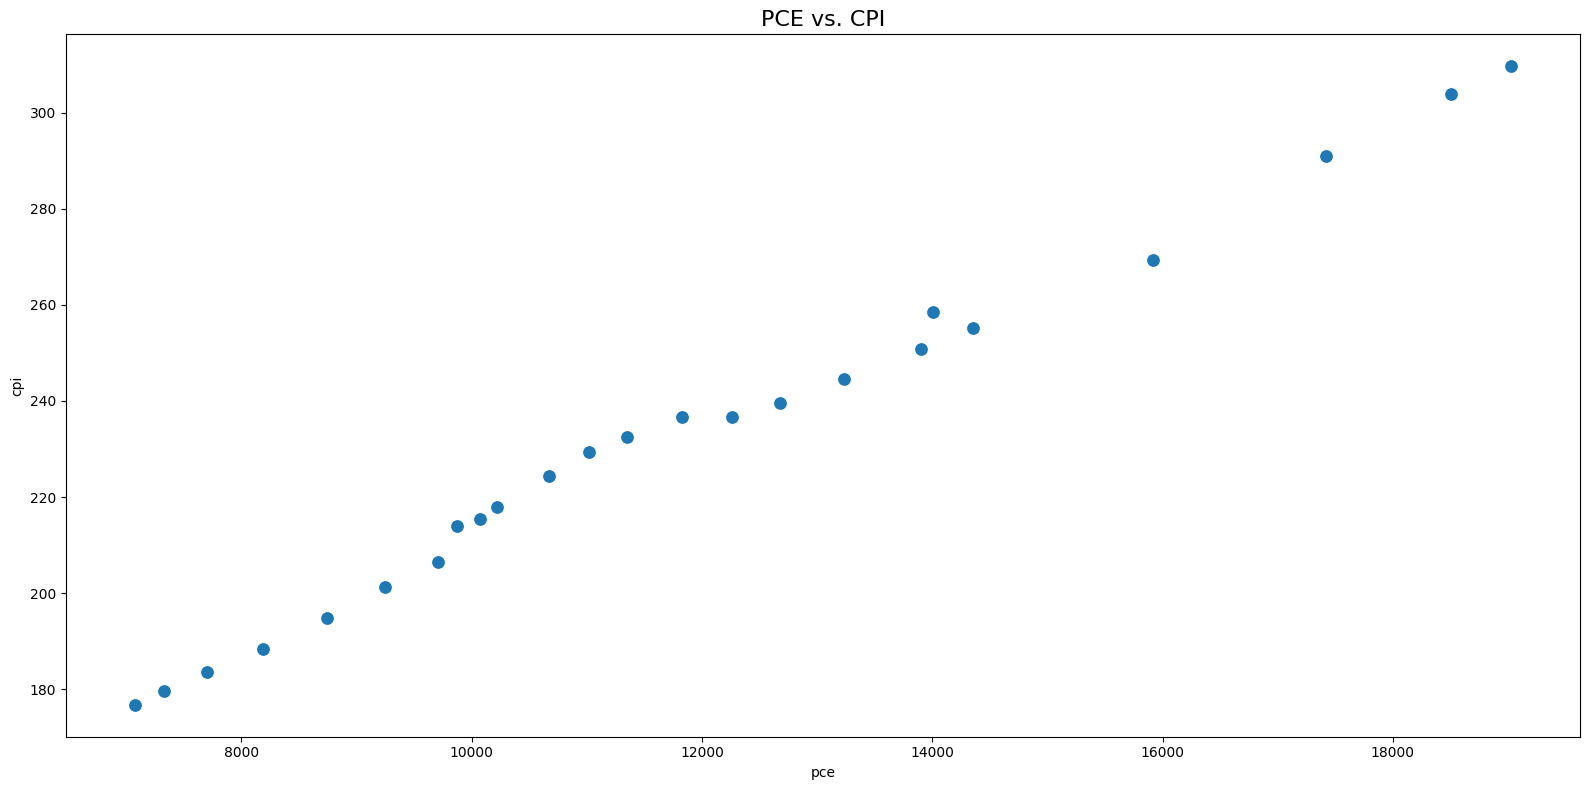

/var/folders/44/ywyr9h1x19sc31hw5rqj971w0000gn/T/ipykernel_30259/53327991.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_yearly, x = df_yearly[column], y = cpi_line, legend=True, s = 100, palette={'A':'red', 'B': 'blue'})


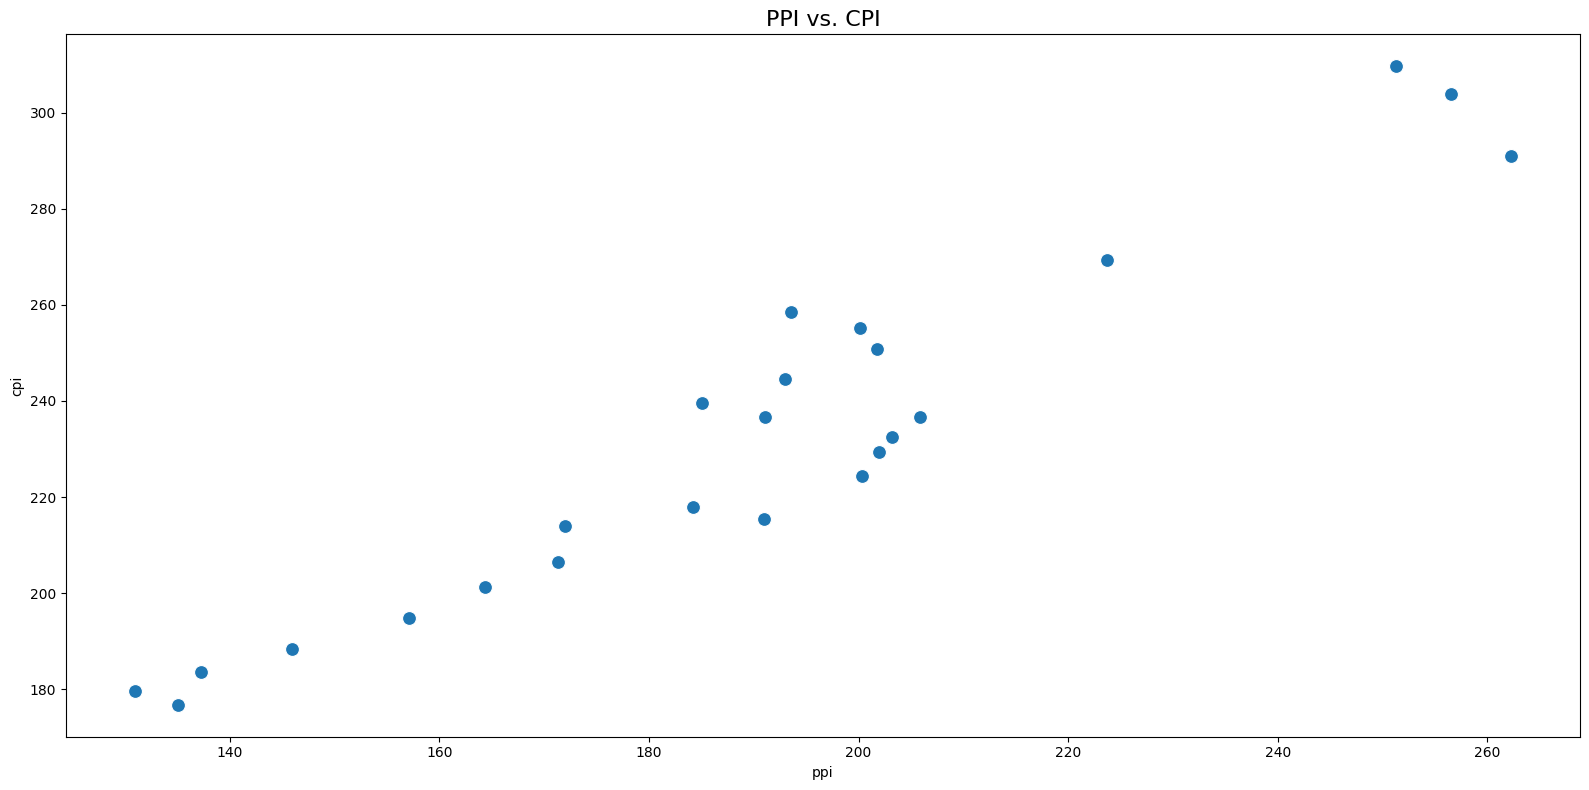

/var/folders/44/ywyr9h1x19sc31hw5rqj971w0000gn/T/ipykernel_30259/53327991.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_yearly, x = df_yearly[column], y = cpi_line, legend=True, s = 100, palette={'A':'red', 'B': 'blue'})


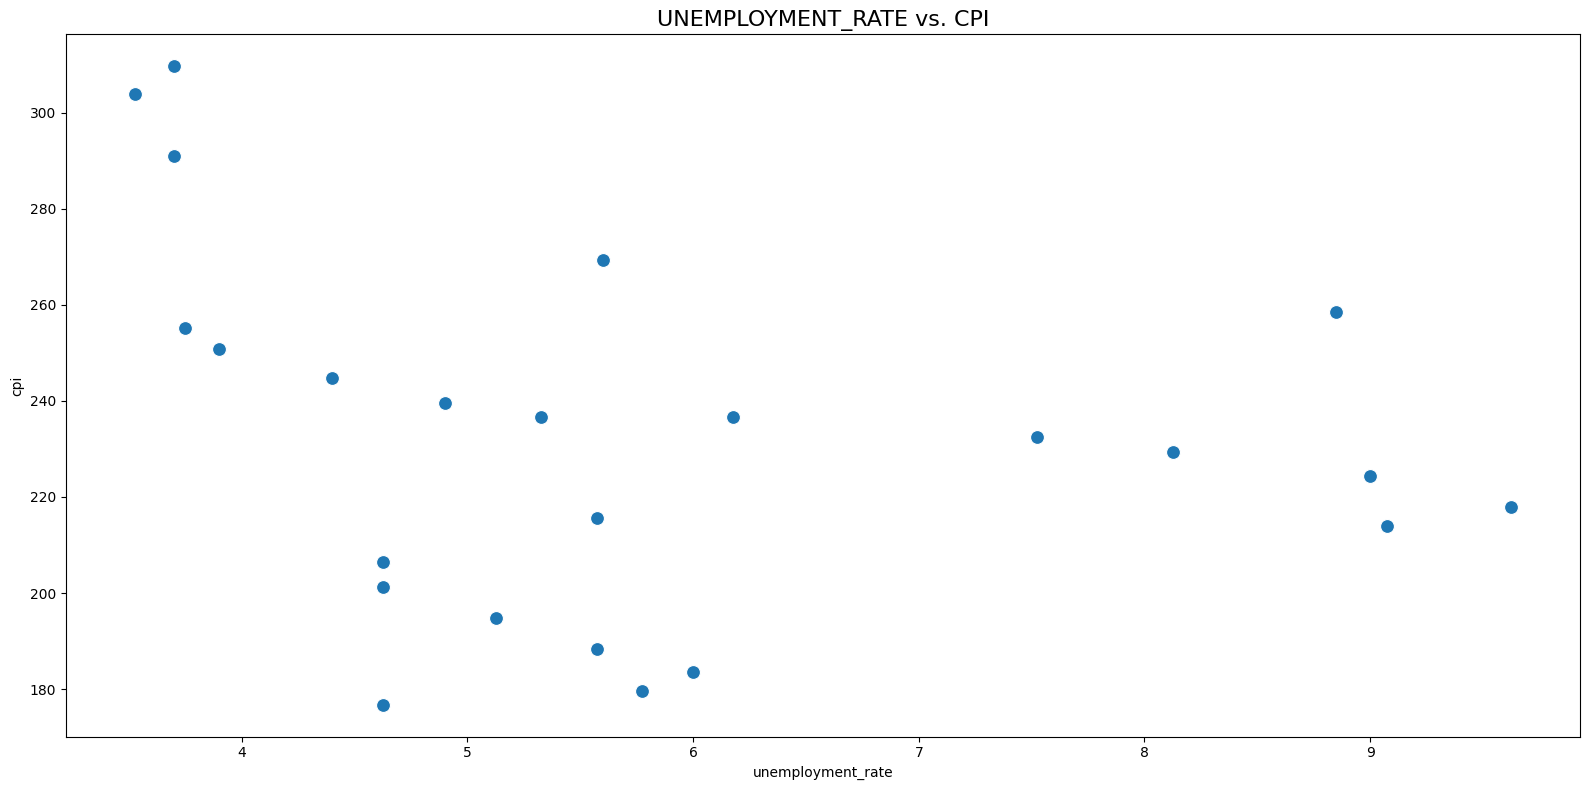

/var/folders/44/ywyr9h1x19sc31hw5rqj971w0000gn/T/ipykernel_30259/53327991.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_yearly, x = df_yearly[column], y = cpi_line, legend=True, s = 100, palette={'A':'red', 'B': 'blue'})


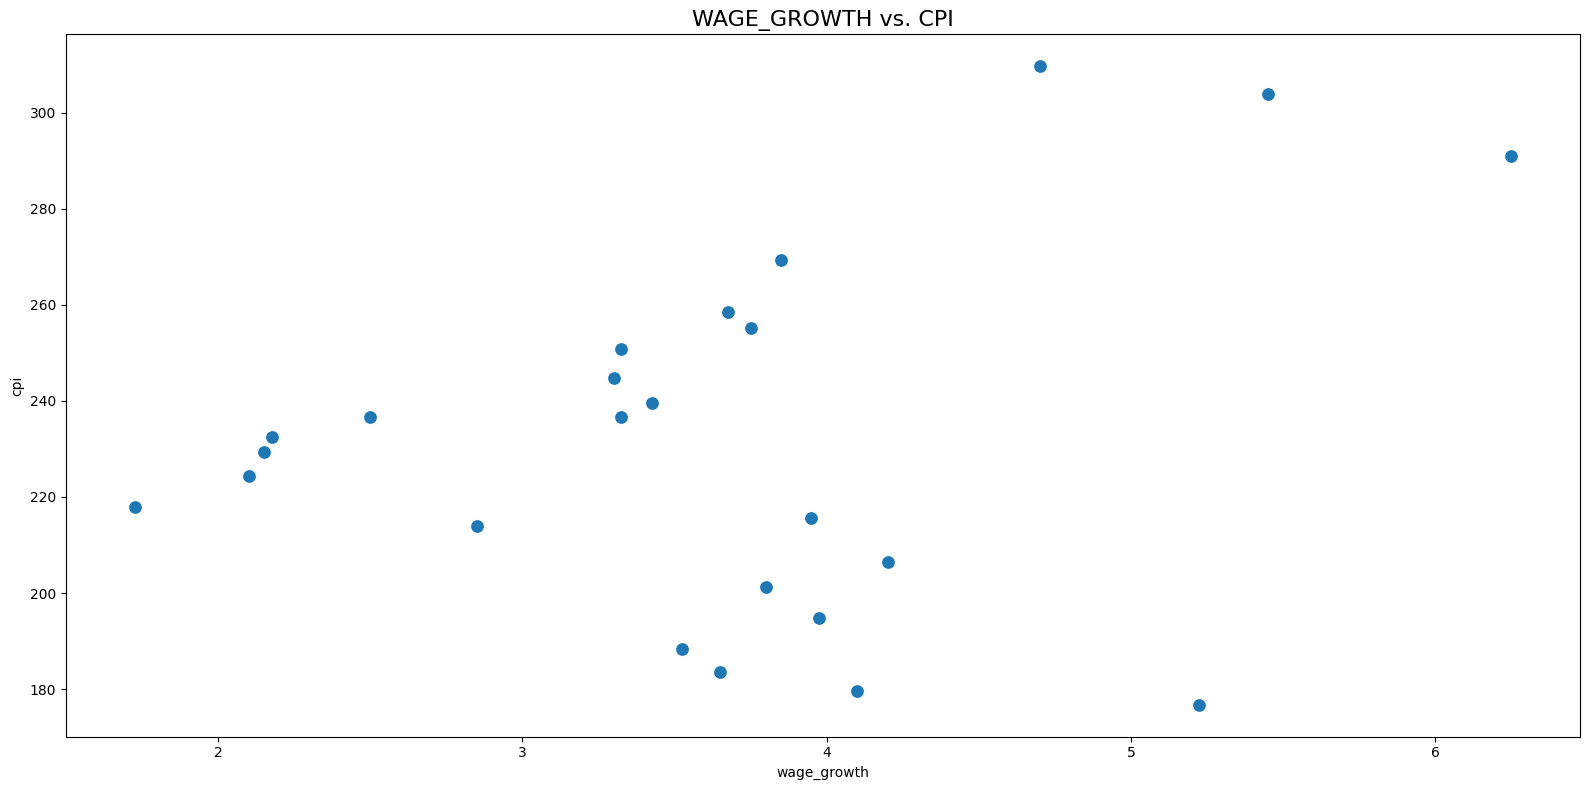

/var/folders/44/ywyr9h1x19sc31hw5rqj971w0000gn/T/ipykernel_30259/53327991.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_yearly, x = df_yearly[column], y = cpi_line, legend=True, s = 100, palette={'A':'red', 'B': 'blue'})


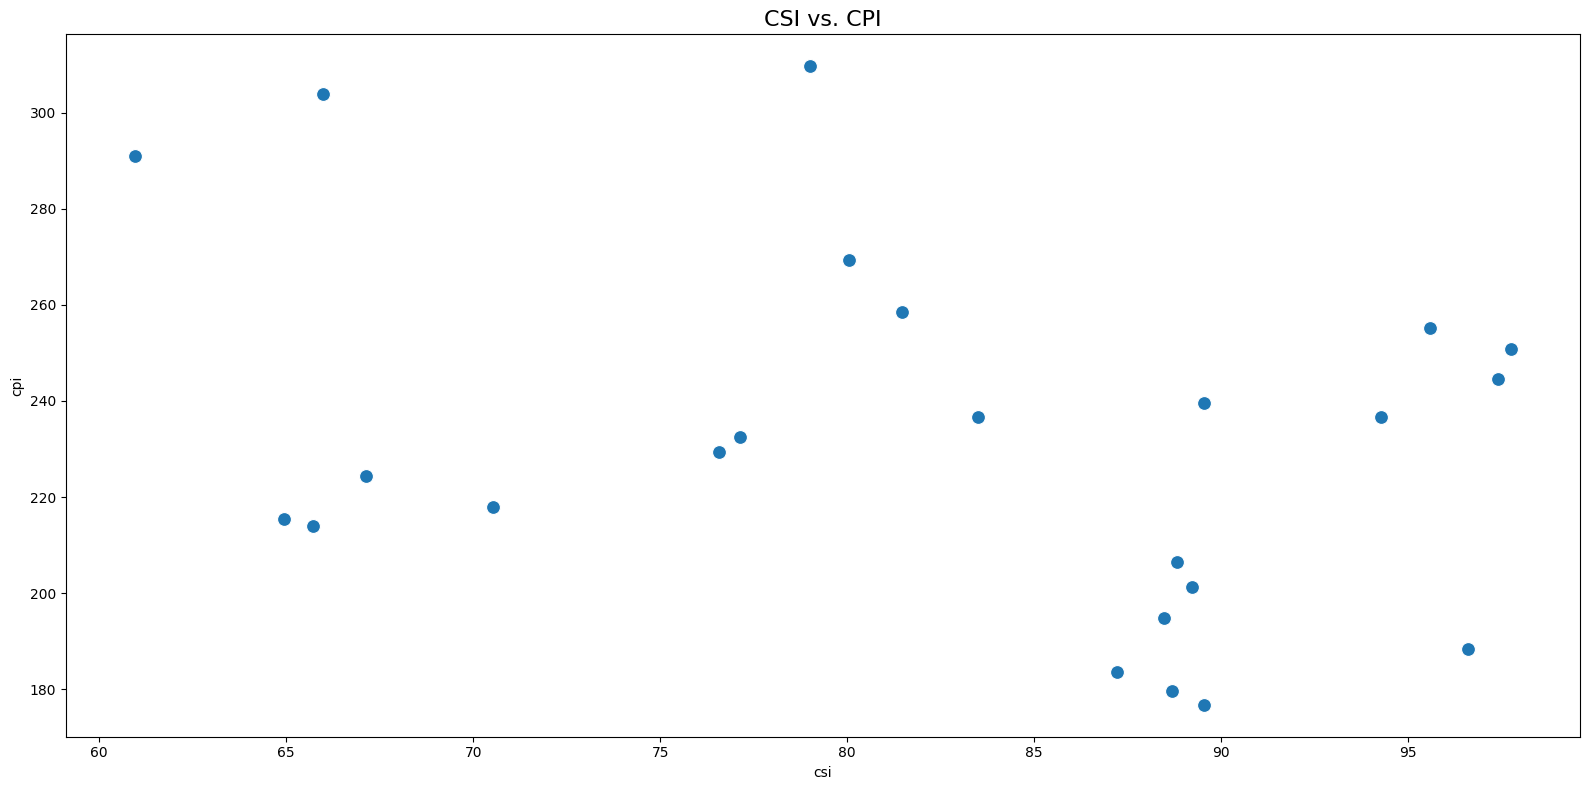

/var/folders/44/ywyr9h1x19sc31hw5rqj971w0000gn/T/ipykernel_30259/53327991.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_yearly, x = df_yearly[column], y = cpi_line, legend=True, s = 100, palette={'A':'red', 'B': 'blue'})


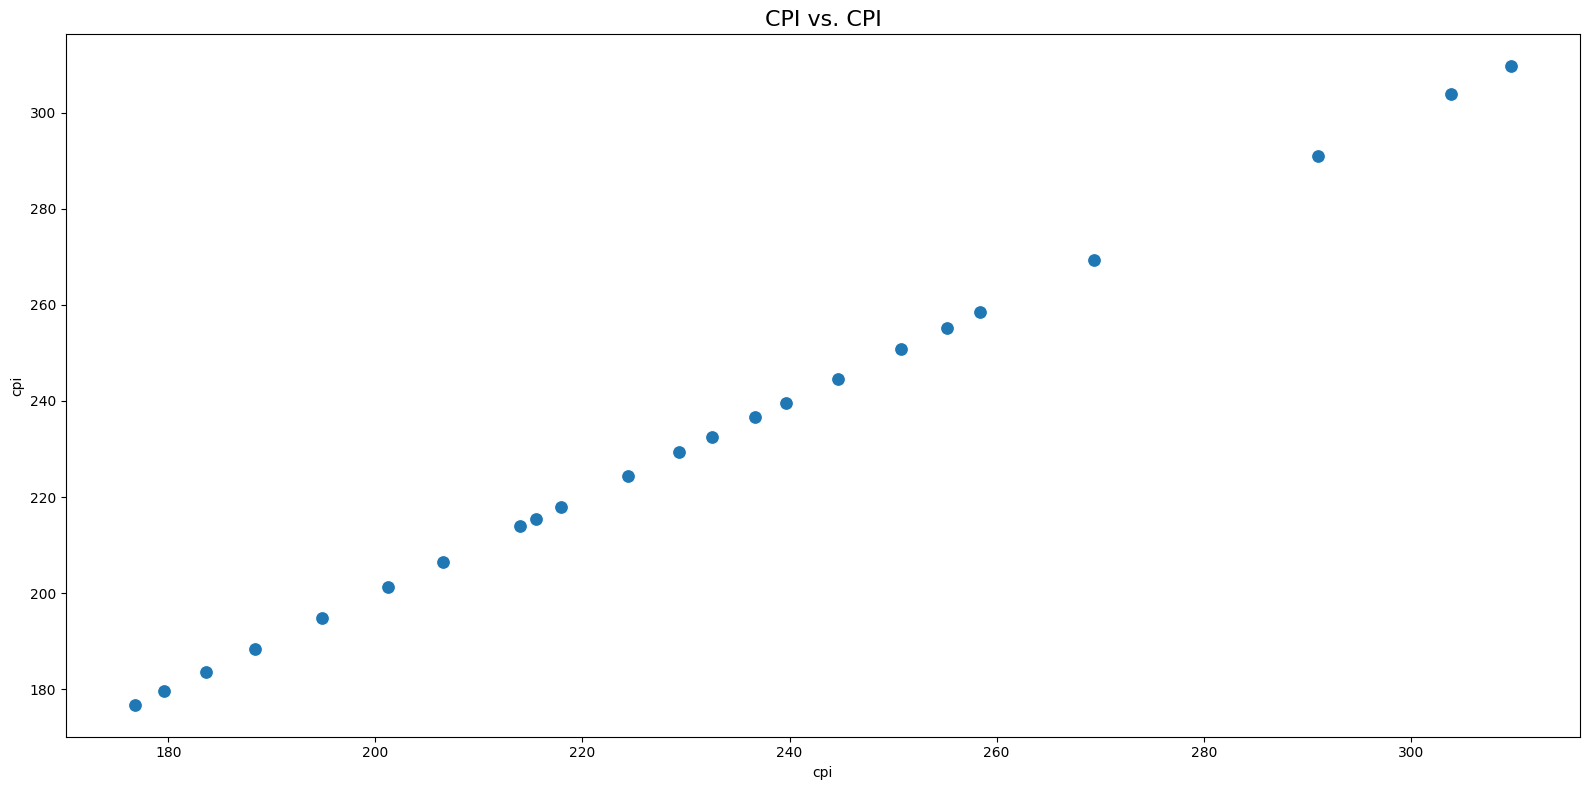

In [98]:
for column in df_yearly.columns:
    plt.figure(figsize=(16, 8))
    sns.scatterplot(data=df_yearly, x = df_yearly[column], y = cpi_line, legend=True, s = 100, palette={'A':'red', 'B': 'blue'})
    plt.title(f"{column.upper()} vs. CPI", fontsize=16)
    plt.tight_layout()
    plt.show()

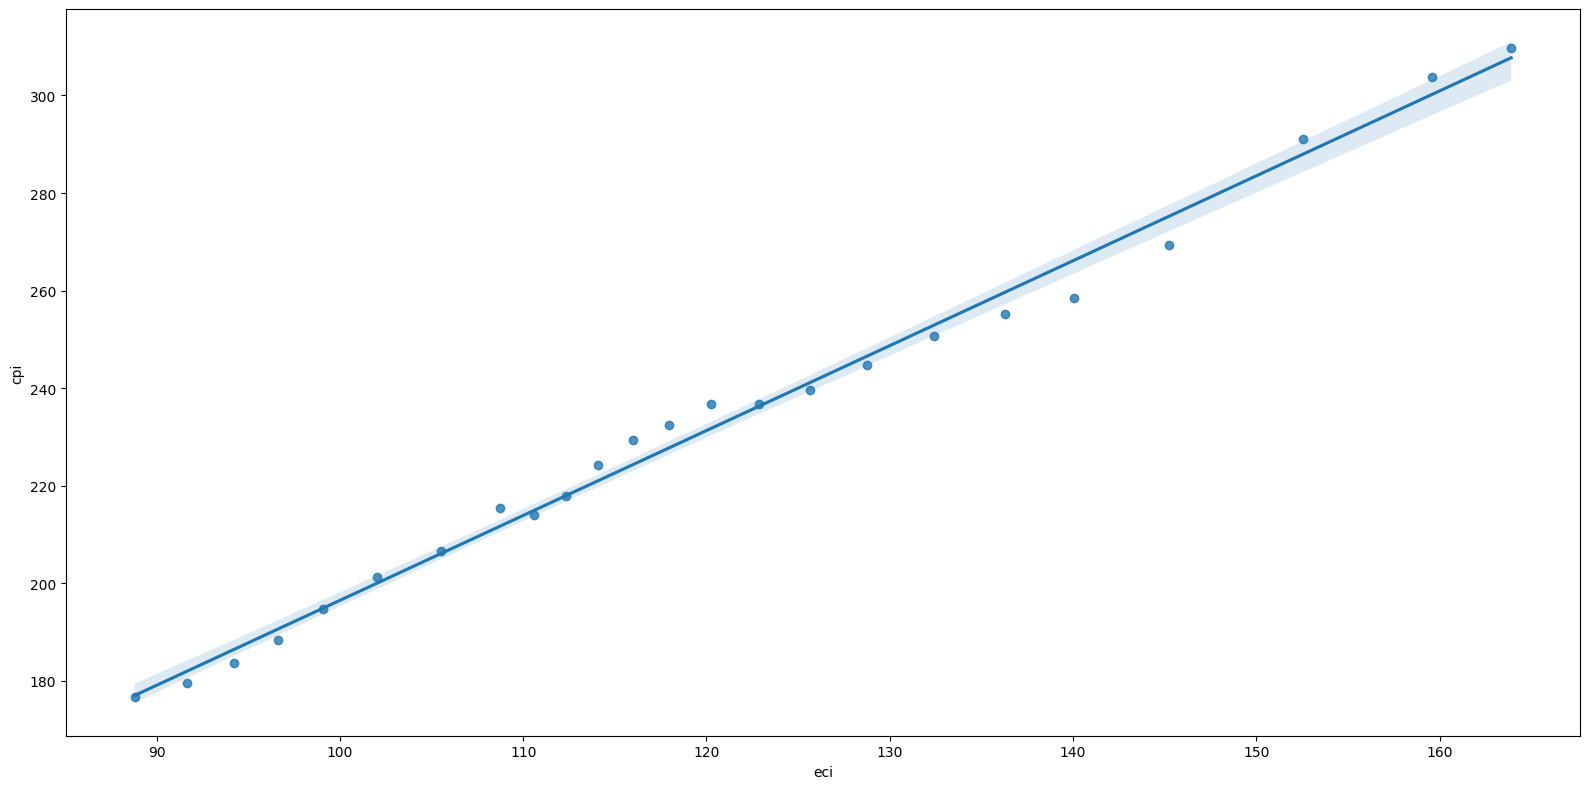

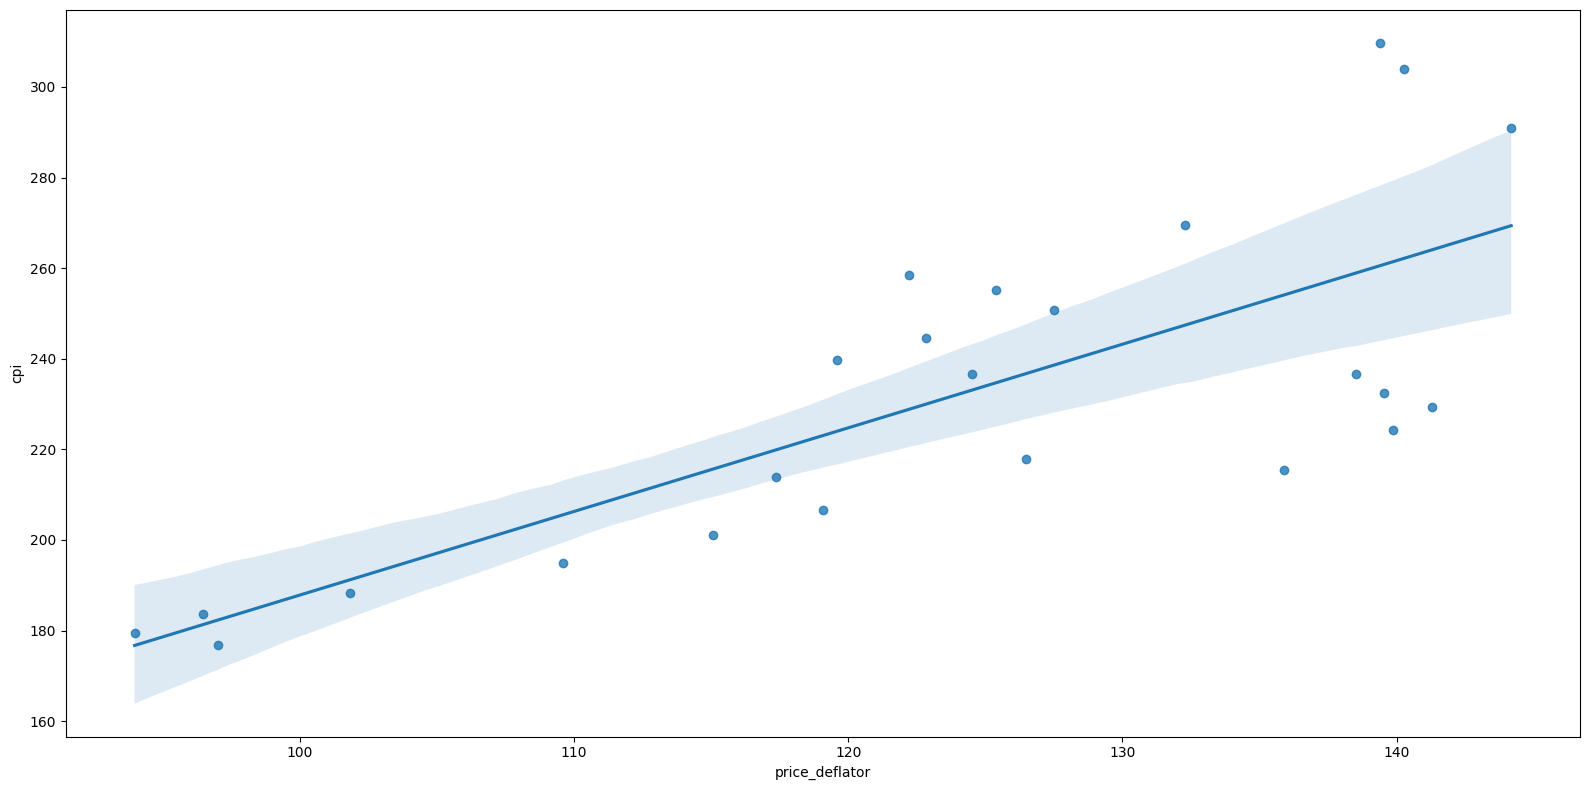

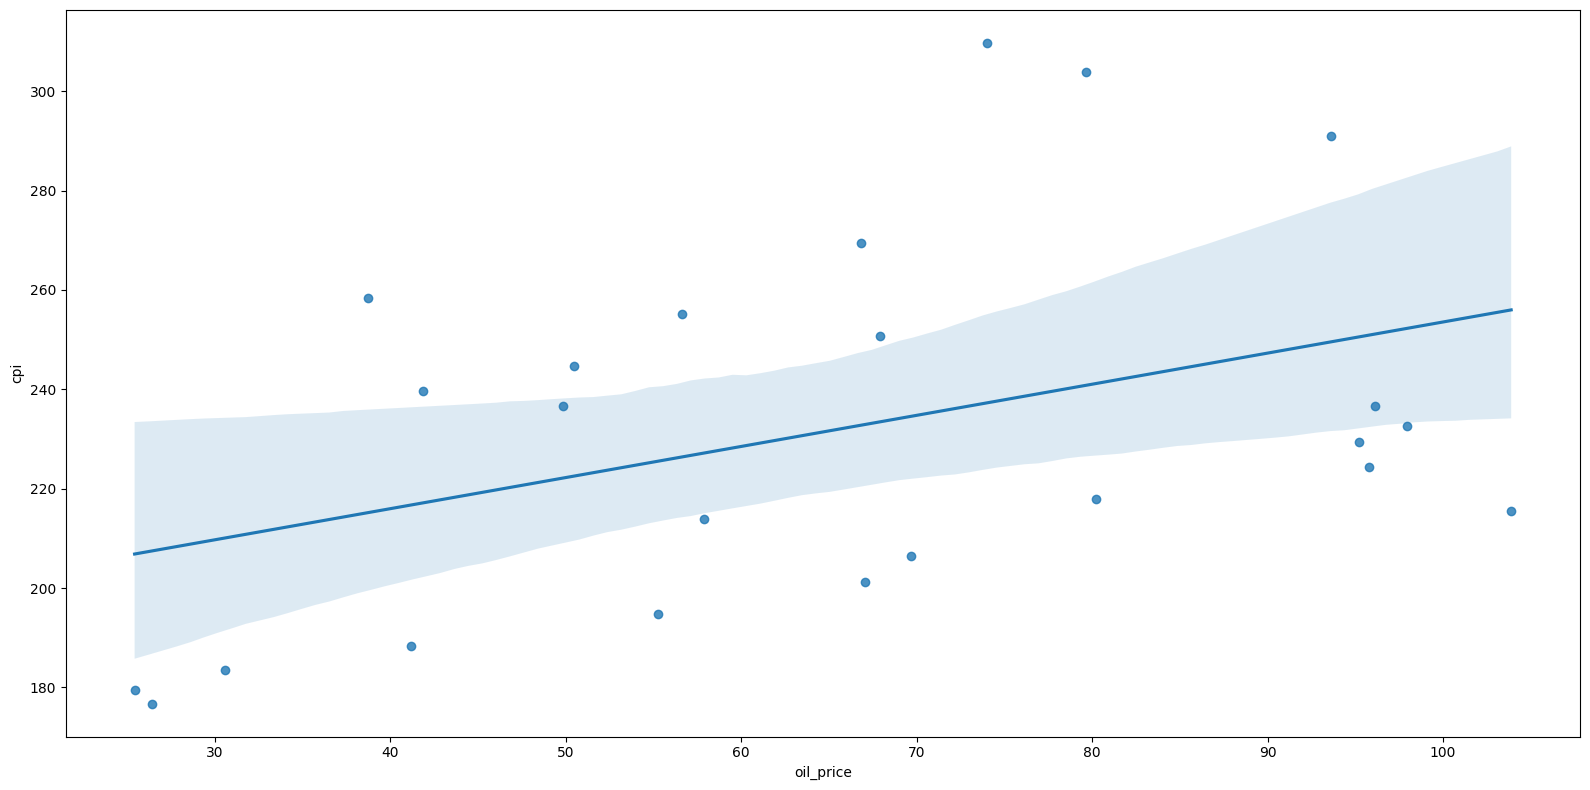

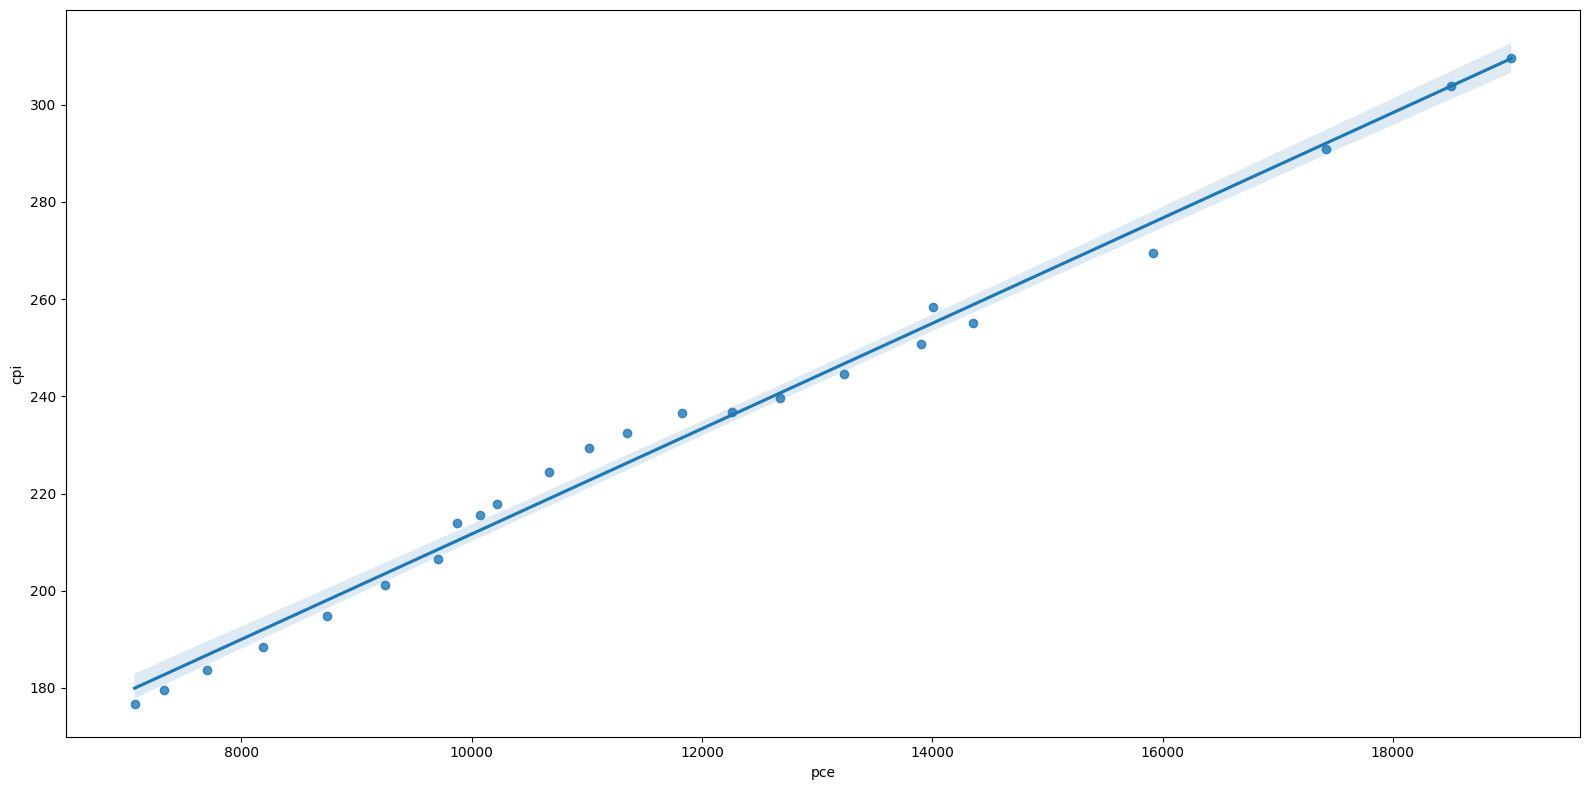

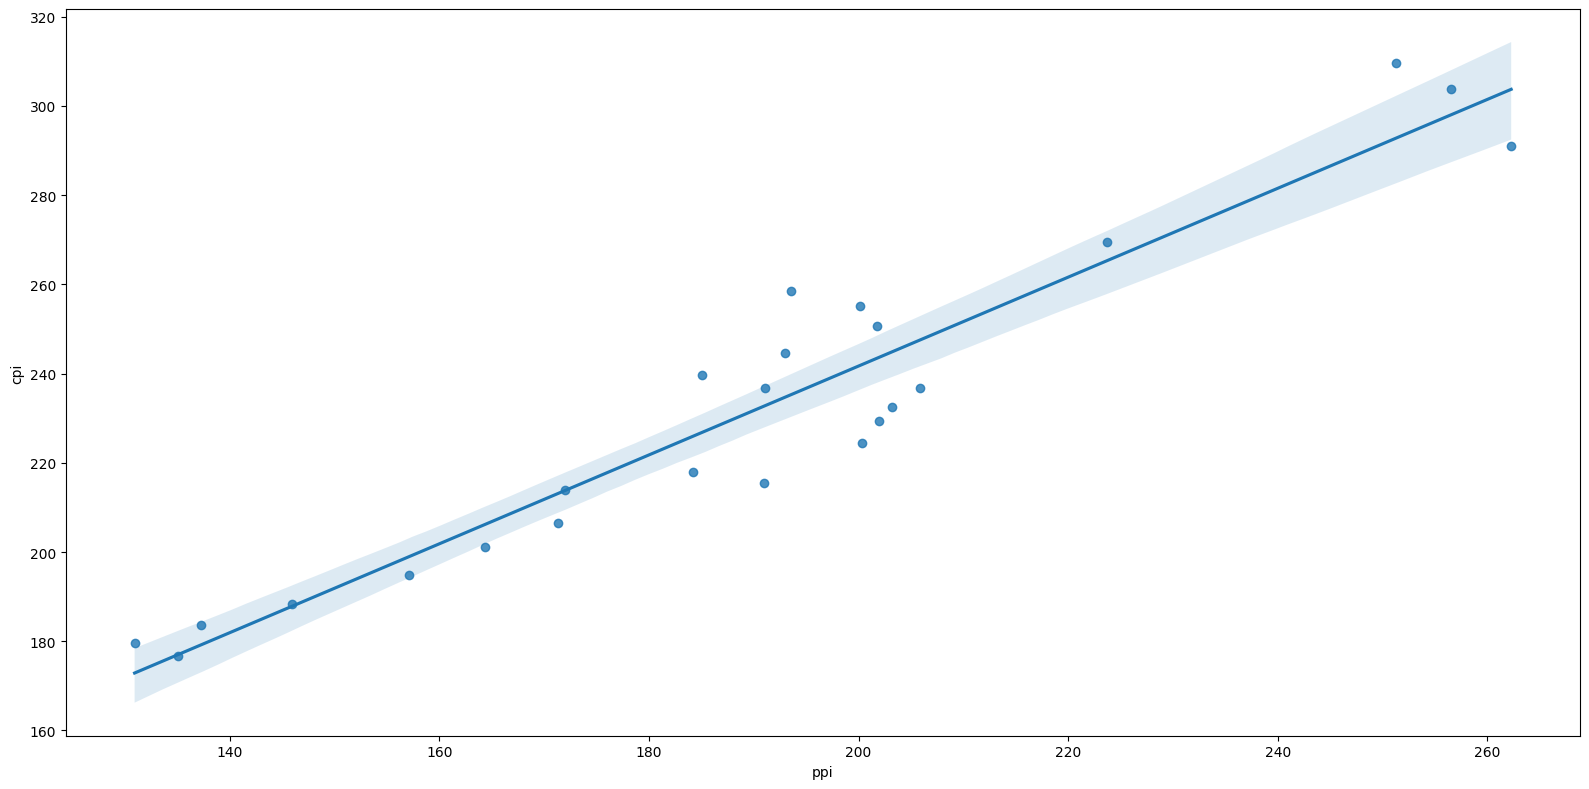

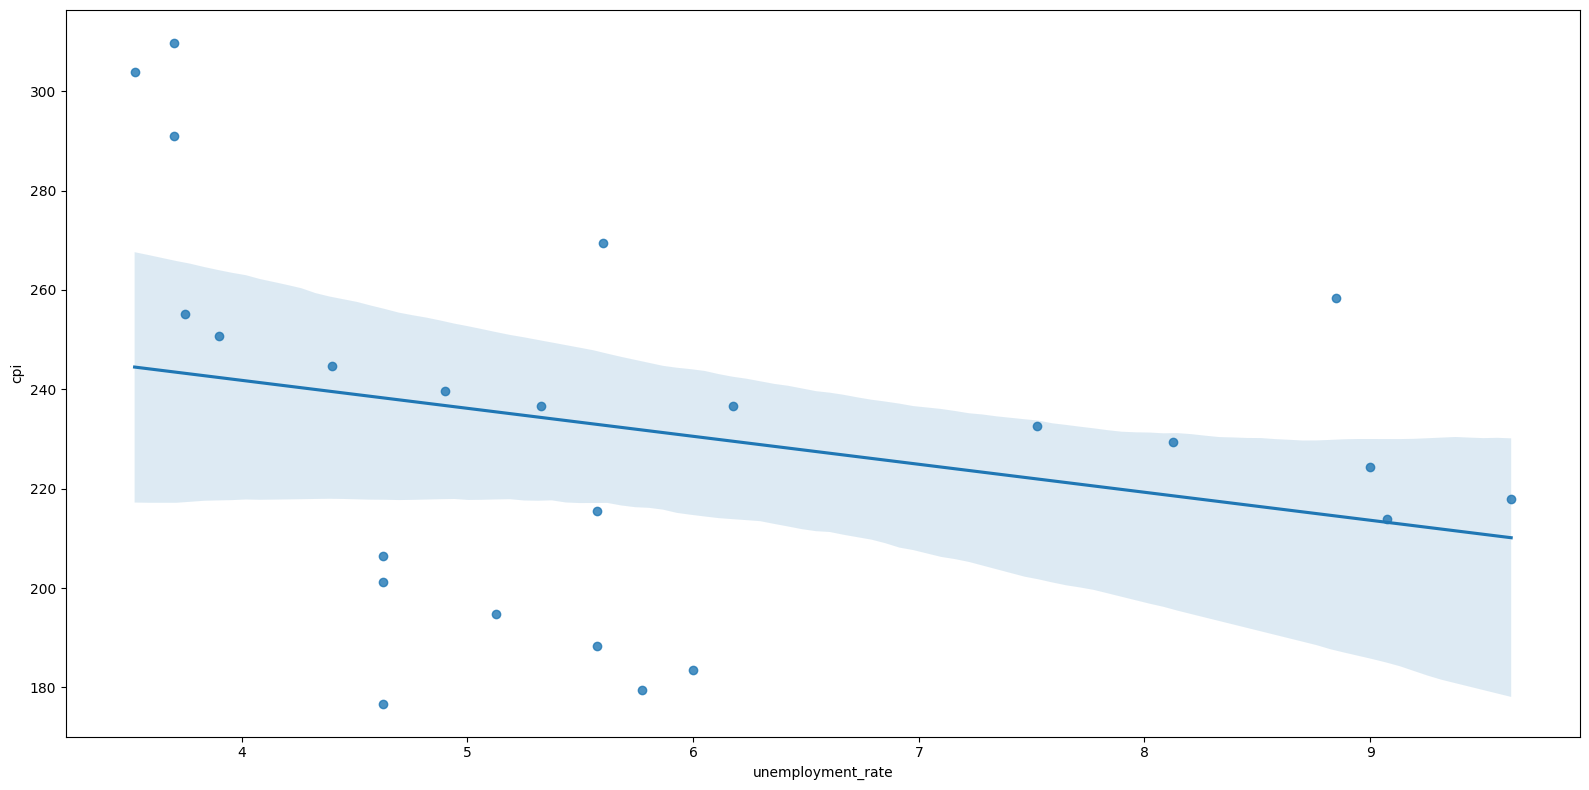

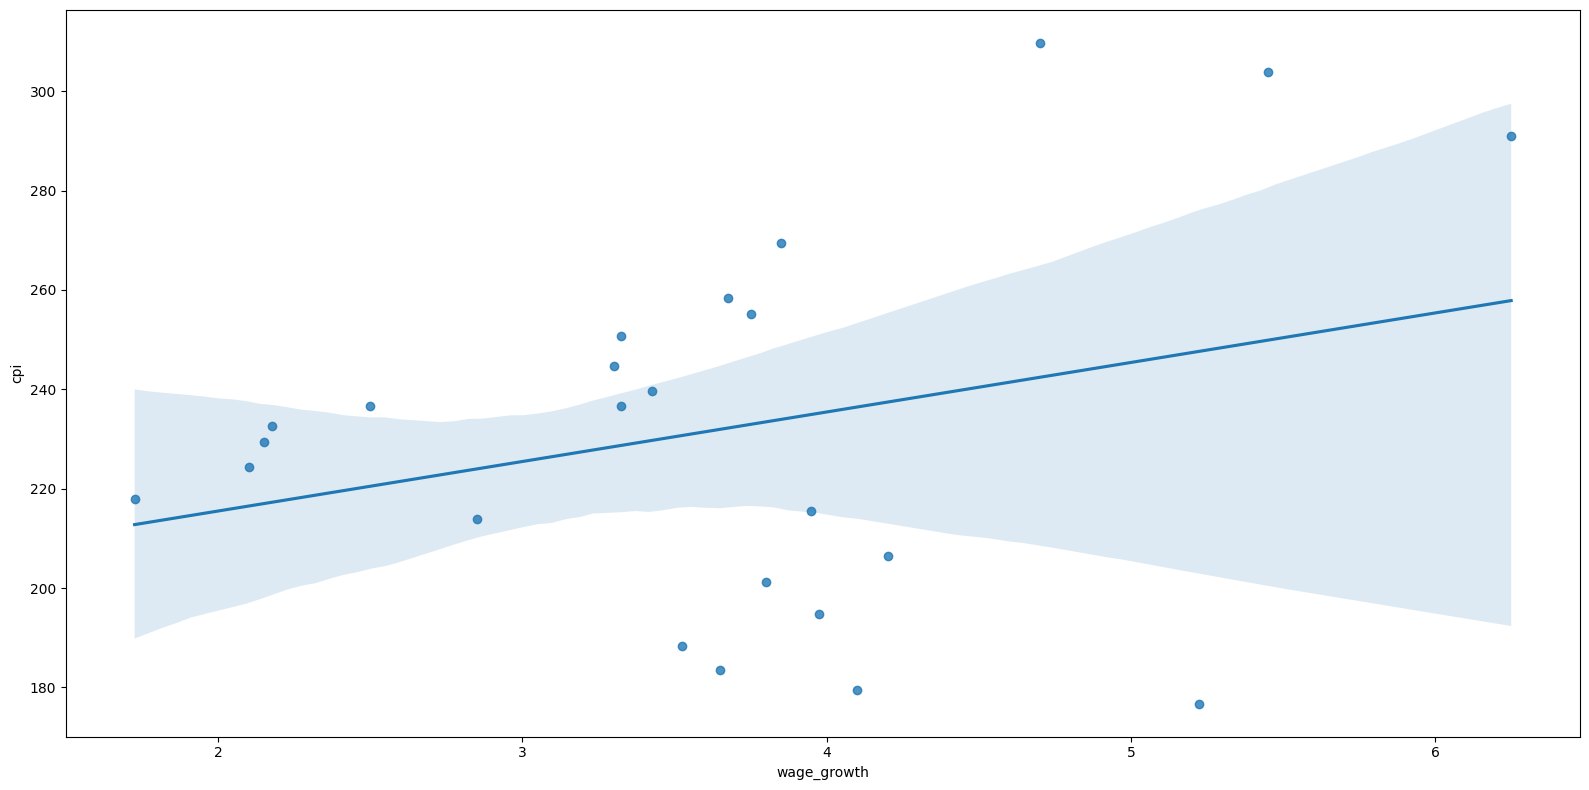

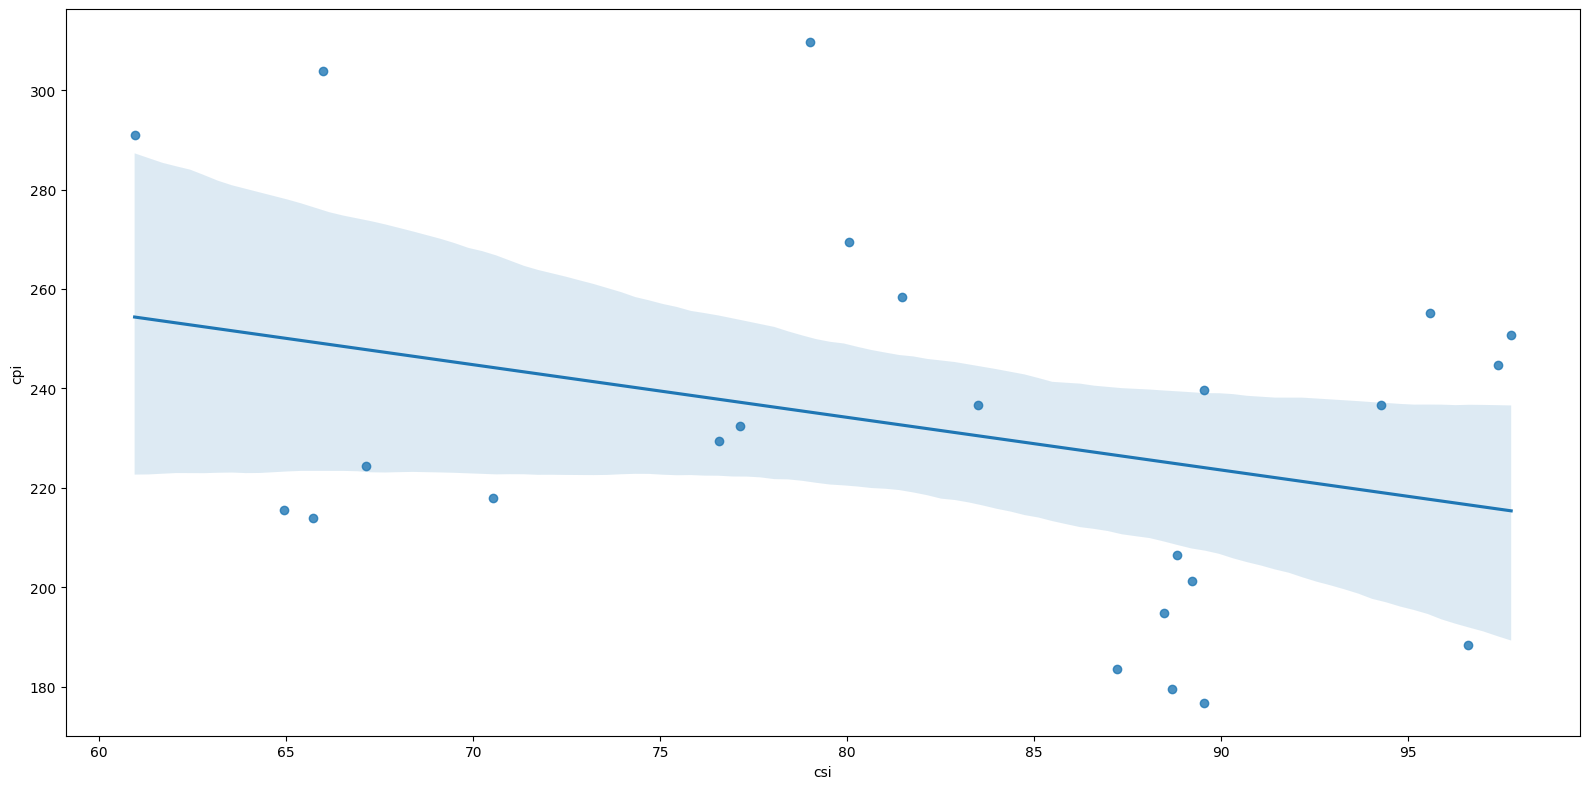

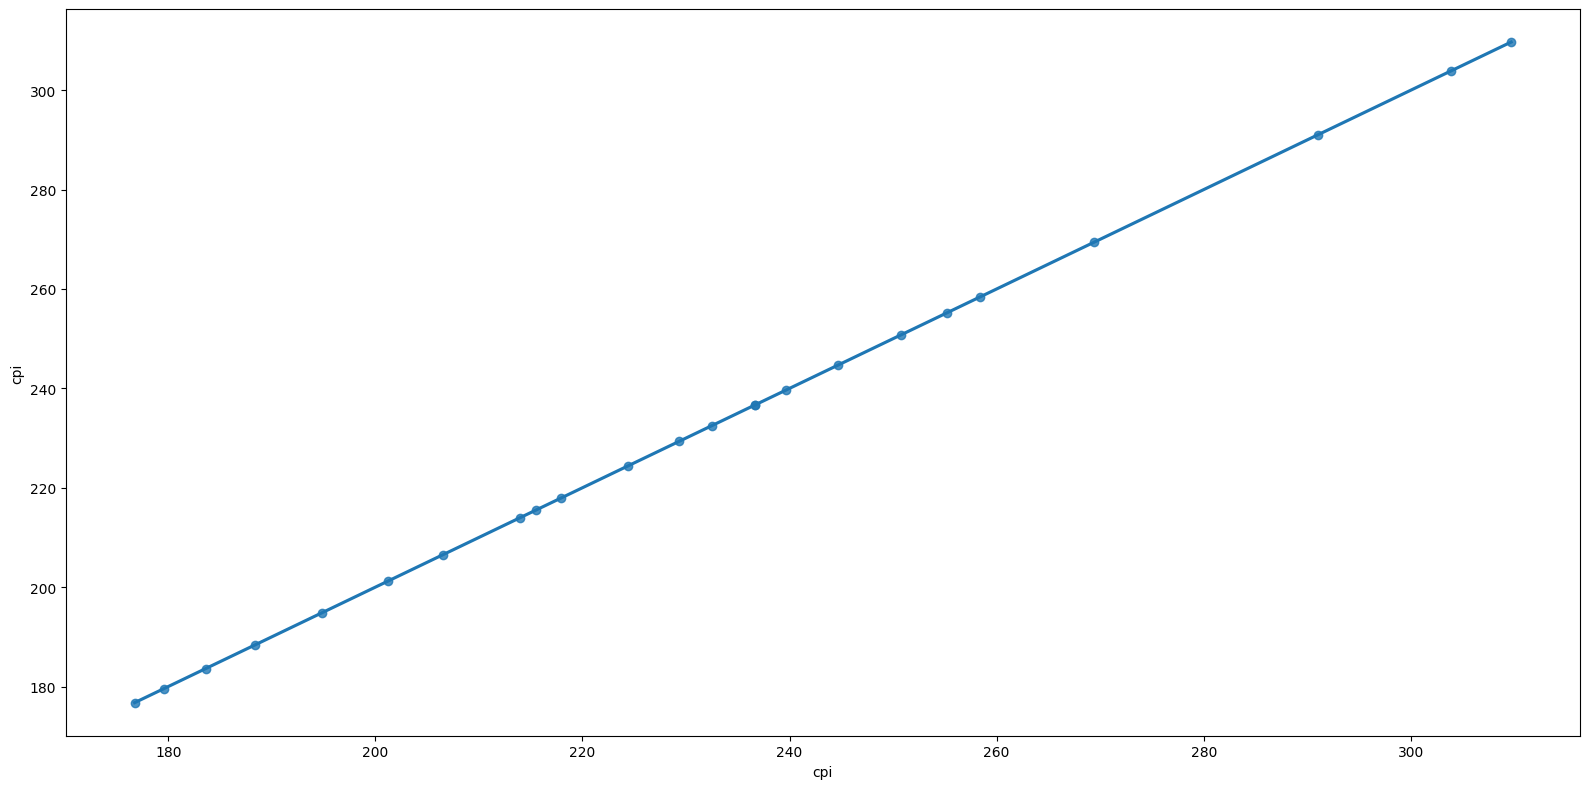

In [99]:
for column in df_yearly.columns:
    plt.figure(figsize=(16, 8))
    sns.regplot(data=df_yearly, x = df_yearly[column], y = csi_line)
    plt.tight_layout()
    plt.show()

In [100]:
df_yearly.corr()

,eci,price_deflator,oil_price,pce,ppi,unemployment_rate,wage_growth,csi,cpi
eci,1.000000,0.713999,0.340671,0.996106,0.927937,-0.289895,0.301075,-0.283826,0.995724
price_deflator,0.713999,1.000000,0.872990,0.707886,0.894933,0.064482,-0.126138,-0.564784,0.760252
oil_price,0.340671,0.872990,1.000000,0.347576,0.642643,0.164537,-0.234086,-0.634973,0.407858
pce,0.996106,0.707886,0.347576,1.000000,0.933843,-0.358692,0.350592,-0.271419,0.994951
ppi,0.927937,0.894933,0.642643,0.933843,1.000000,-0.207319,0.221131,-0.495669,0.954251
unemployment_rate,-0.289895,0.064482,0.164537,-0.358692,-0.207319,1.000000,-0.732246,-0.397994,-0.287584
wage_growth,0.301075,-0.126138,-0.234086,0.350592,0.221131,-0.732246,1.000000,-0.052495,0.291517
csi,-0.283826,-0.564784,-0.634973,-0.271419,-0.495669,-0.397994,-0.052495,1.000000,-0.327248
cpi,0.995724,0.760252,0.407858,0.994951,0.954251,-0.287584,0.291517,-0.327248,1.000000


In [92]:
from scipy.stats import pearsonr

In [106]:
def find_pearsonr(df, col1, col2):
    result = pearsonr(df[col1], df[col2])
    print(f"The correlation coef between {col1.upper()} and {col2.upper()} is {result[0]}")
    print(f"The p-value between the {col1.upper()} and {col2.upper()} is {result[1]}")
    if result[1] > 0.05:
        print('It is too big. You cannot reject the null hypothesis! Therefore, no correlation!')
    else:
        print('There is indeed correlation between the two since p-value is too small.')
    print('*' * 100)
    print()

In [107]:
for column in df_yearly.columns:
    find_pearsonr(df_yearly, column, 'cpi')

The correlation coef between ECI and CPI is 0.9957235723090099
The p-value between the ECI and CPI is 2.9545921707149502e-24
There is indeed correlation between the two since p-value is too small.
****************************************************************************************************

The correlation coef between PRICE_DEFLATOR and CPI is 0.7602523330888035
The p-value between the PRICE_DEFLATOR and CPI is 1.6257759944891605e-05
There is indeed correlation between the two since p-value is too small.
****************************************************************************************************

The correlation coef between OIL_PRICE and CPI is 0.4078577302909291
The p-value between the OIL_PRICE and CPI is 0.04788193534430471
There is indeed correlation between the two since p-value is too small.
****************************************************************************************************

The correlation coef between PCE and CPI is 0.9949511678152989
The p-val

### CAN WE PREDICT WHEN INFLATION STARTS AND ENDS?

In [109]:
df_yearly_2020 = df_yearly[df_yearly.index.year >= 2020]

In [110]:
df_yearly_2020

,eci,price_deflator,oil_price,pce,ppi,unemployment_rate,wage_growth,csi,cpi
DATE,,,,,,,,,
2020-12-31,140.075,122.200,38.703043,14007.90,193.57500,8.850,3.675,81.475,258.42225
2021-12-31,145.225,132.275,66.805839,15916.50,223.75375,5.600,3.850,80.050,269.42450
2022-12-31,152.525,144.175,93.616905,17417.65,262.27450,3.700,6.250,60.950,290.99850
2023-12-31,159.575,140.275,79.653405,18503.90,256.54050,3.525,5.450,65.975,303.88675
2024-12-31,163.900,139.400,74.003043,19028.00,251.30600,3.700,4.700,79.000,309.68500


In [113]:
df_yearly_2020['inflation'] = df_yearly_2020['cpi'].diff() / df_yearly_2020['cpi'].shift(1) * 100

/var/folders/44/ywyr9h1x19sc31hw5rqj971w0000gn/T/ipykernel_30259/3040286034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yearly_2020['inflation'] = df_yearly_2020['cpi'].diff() / df_yearly_2020['cpi'].shift(1) * 100


In [114]:
df_yearly_2020

,eci,price_deflator,oil_price,pce,ppi,unemployment_rate,wage_growth,csi,cpi,inflation
DATE,,,,,,,,,,
2020-12-31,140.075,122.200,38.703043,14007.90,193.57500,8.850,3.675,81.475,258.42225,NaN
2021-12-31,145.225,132.275,66.805839,15916.50,223.75375,5.600,3.850,80.050,269.42450,4.257470
2022-12-31,152.525,144.175,93.616905,17417.65,262.27450,3.700,6.250,60.950,290.99850,8.007438
2023-12-31,159.575,140.275,79.653405,18503.90,256.54050,3.525,5.450,65.975,303.88675,4.428975
2024-12-31,163.900,139.400,74.003043,19028.00,251.30600,3.700,4.700,79.000,309.68500,1.908030


In [115]:
def check_inflation(df, col):
    return df[df[col] > 2.4]

In [153]:
inflation_periods = check_inflation(df_yearly_2020, 'inflation')['inflation']

In [162]:
start_1_index = inflation_periods.index[0]
start_1 = inflation_periods[0]

/var/folders/44/ywyr9h1x19sc31hw5rqj971w0000gn/T/ipykernel_30259/1259683412.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_1 = inflation_periods[0]


In [163]:
start_2_index = inflation_periods.index[1]
start_2 = inflation_periods[1]

/var/folders/44/ywyr9h1x19sc31hw5rqj971w0000gn/T/ipykernel_30259/1057484910.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_2 = inflation_periods[1]


In [164]:
start_3_index = inflation_periods.index[2]
start_3 = inflation_periods[2]

/var/folders/44/ywyr9h1x19sc31hw5rqj971w0000gn/T/ipykernel_30259/3874581035.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_3 = inflation_periods[2]


In [183]:
start_3_index

Timestamp('2023-12-31 00:00:00')

[]

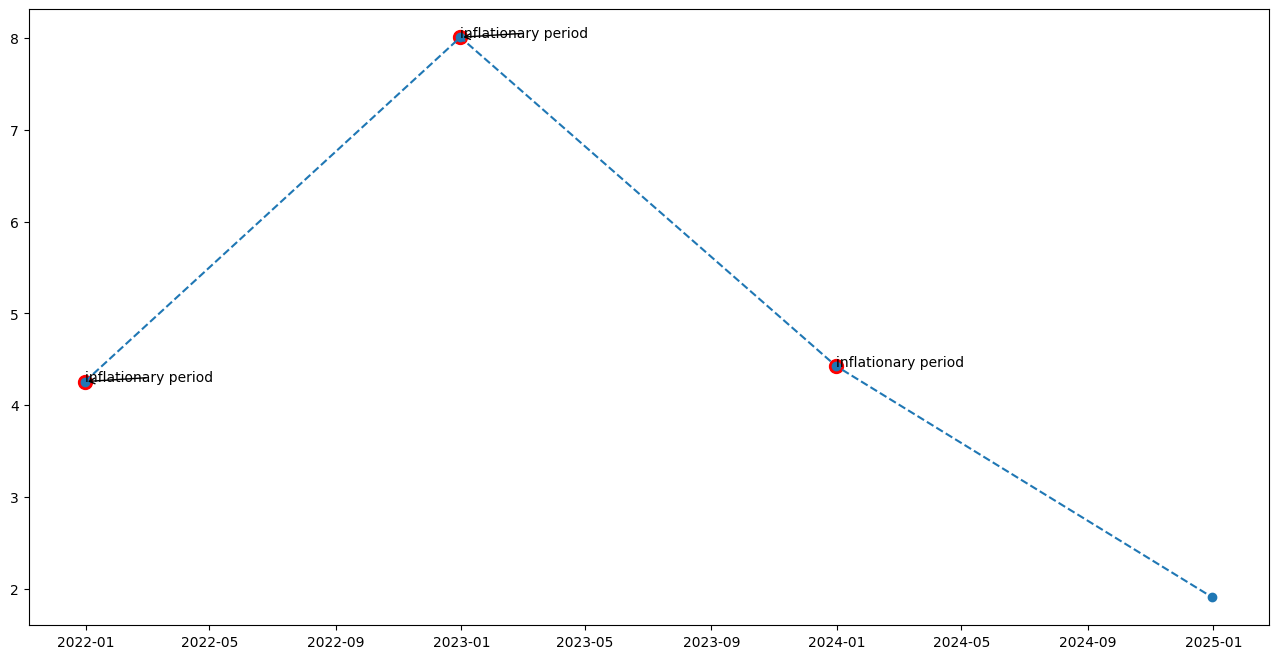

In [197]:
plt.figure(figsize=(16, 8))
plt.plot(df_yearly_2020['inflation'], marker='o', linestyle='--')

plt.annotate(text='inflationary period', xy=(start_1_index, start_1), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.scatter(start_1_index, start_1, color='red', marker='o', s= 100)

plt.annotate(text='inflationary period', xy=(start_2_index, start_2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.scatter(start_2_index, start_2, color='red', marker='o', s=100)

plt.annotate(text='inflationary period', xy=(start_3_index, start_3))
plt.scatter(start_3_index, start_3, color='red', marker='o', s=100)

plt.plot()

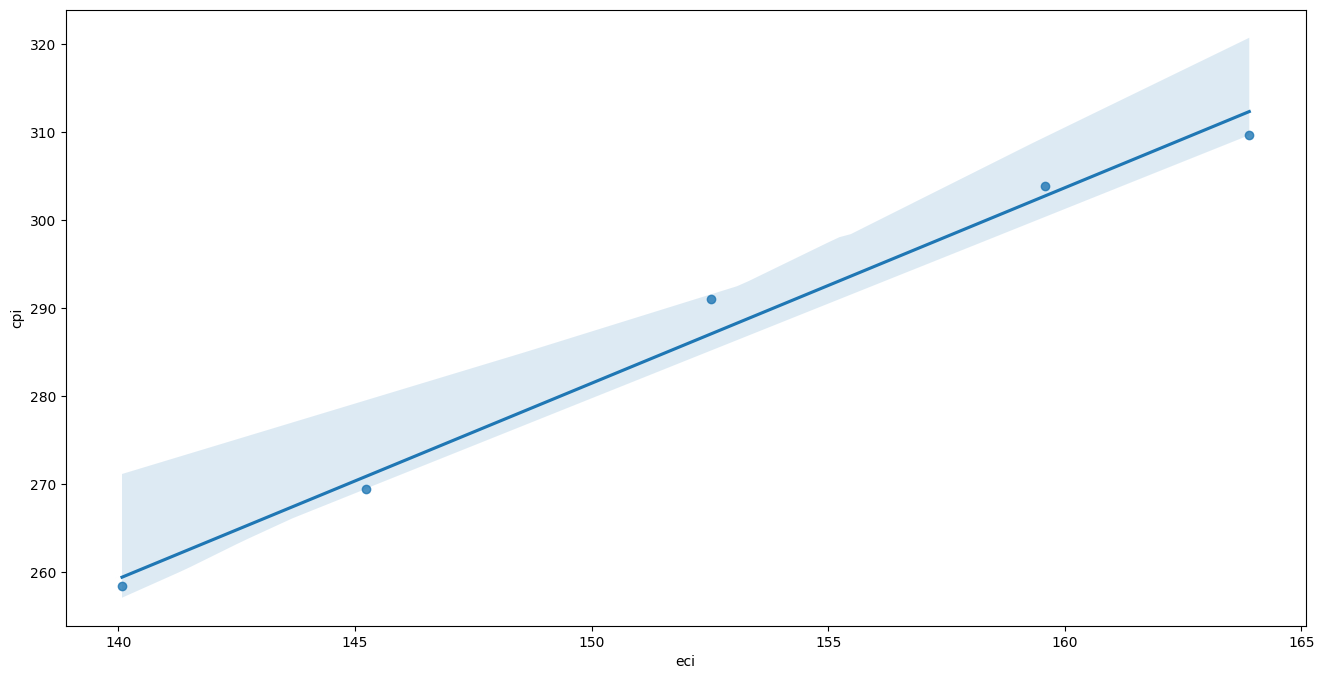

In [206]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.regplot(data=df_yearly_2020, x='eci', y='cpi', ax=ax)

plt.show()

[]

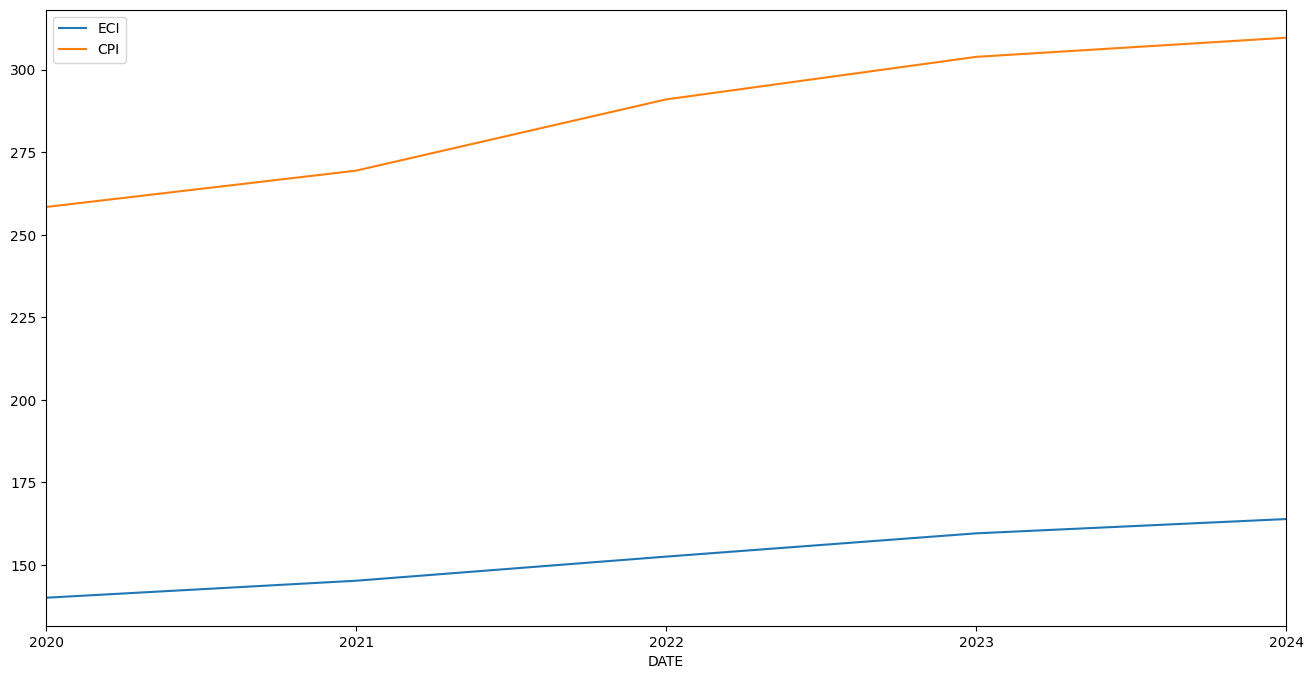

In [204]:
df_yearly_2020['eci'].plot(figsize=(16, 8), label='ECI')
df_yearly_2020['cpi'].plot(label='CPI')

plt.legend()
plt.plot()

In [220]:
df_quarterly = df.resample('Q').mean()

/var/folders/44/ywyr9h1x19sc31hw5rqj971w0000gn/T/ipykernel_30259/1540775982.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df.resample('Q').mean()


<Axes: xlabel='DATE'>

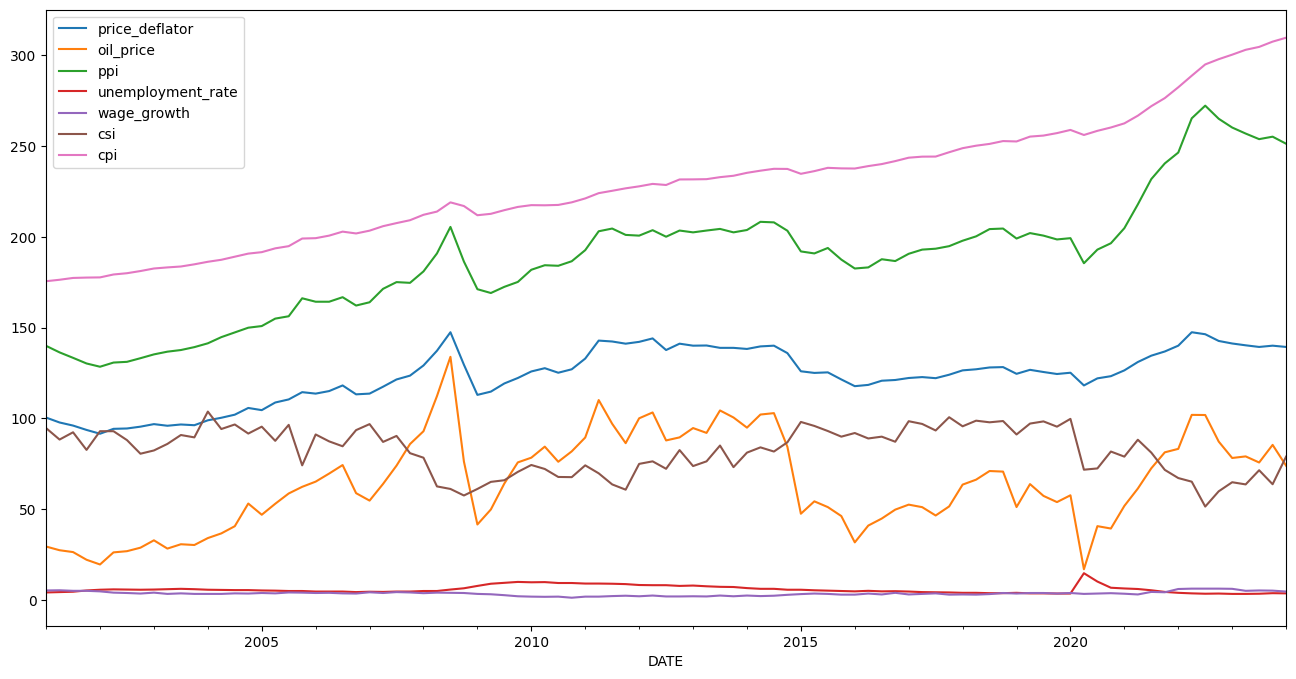

In [225]:
df_quarterly[['price_deflator', 'oil_price', 'ppi', 'unemployment_rate', 'wage_growth', 'csi', 'cpi']].plot(figsize=(16, 8))

In [228]:
df_quarterly.corr()

,eci,price_deflator,oil_price,pce,ppi,unemployment_rate,wage_growth,csi,cpi
eci,1.000000,0.697173,0.326078,0.992984,0.913650,-0.212458,0.247082,-0.267248,0.994597
price_deflator,0.697173,1.000000,0.867337,0.693572,0.894296,0.078056,-0.150980,-0.524081,0.751370
oil_price,0.326078,0.867337,1.000000,0.343119,0.646724,0.106086,-0.220385,-0.550574,0.400988
pce,0.992984,0.693572,0.343119,1.000000,0.922165,-0.307137,0.301852,-0.245830,0.991888
ppi,0.913650,0.894296,0.646724,0.922165,1.000000,-0.157136,0.178967,-0.473221,0.946350
unemployment_rate,-0.212458,0.078056,0.106086,-0.307137,-0.157136,1.000000,-0.655798,-0.408559,-0.212670
wage_growth,0.247082,-0.150980,-0.220385,0.301852,0.178967,-0.655798,1.000000,-0.043396,0.237421
csi,-0.267248,-0.524081,-0.550574,-0.245830,-0.473221,-0.408559,-0.043396,1.000000,-0.313390
cpi,0.994597,0.751370,0.400988,0.991888,0.946350,-0.212670,0.237421,-0.313390,1.000000


In [231]:
for column in df_quarterly.columns:
    find_pearsonr(df_quarterly, column, 'cpi')

The correlation coef between ECI and CPI is 0.9945972946256716
The p-value between the ECI and CPI is 2.5162533611584176e-91
There is indeed correlation between the two since p-value is too small.
****************************************************************************************************

The correlation coef between PRICE_DEFLATOR and CPI is 0.7513703505371258
The p-value between the PRICE_DEFLATOR and CPI is 4.103901427421295e-18
There is indeed correlation between the two since p-value is too small.
****************************************************************************************************

The correlation coef between OIL_PRICE and CPI is 0.4009876703529574
The p-value between the OIL_PRICE and CPI is 6.799728722756066e-05
There is indeed correlation between the two since p-value is too small.
****************************************************************************************************

The correlation coef between PCE and CPI is 0.9918877373925533
The p-va

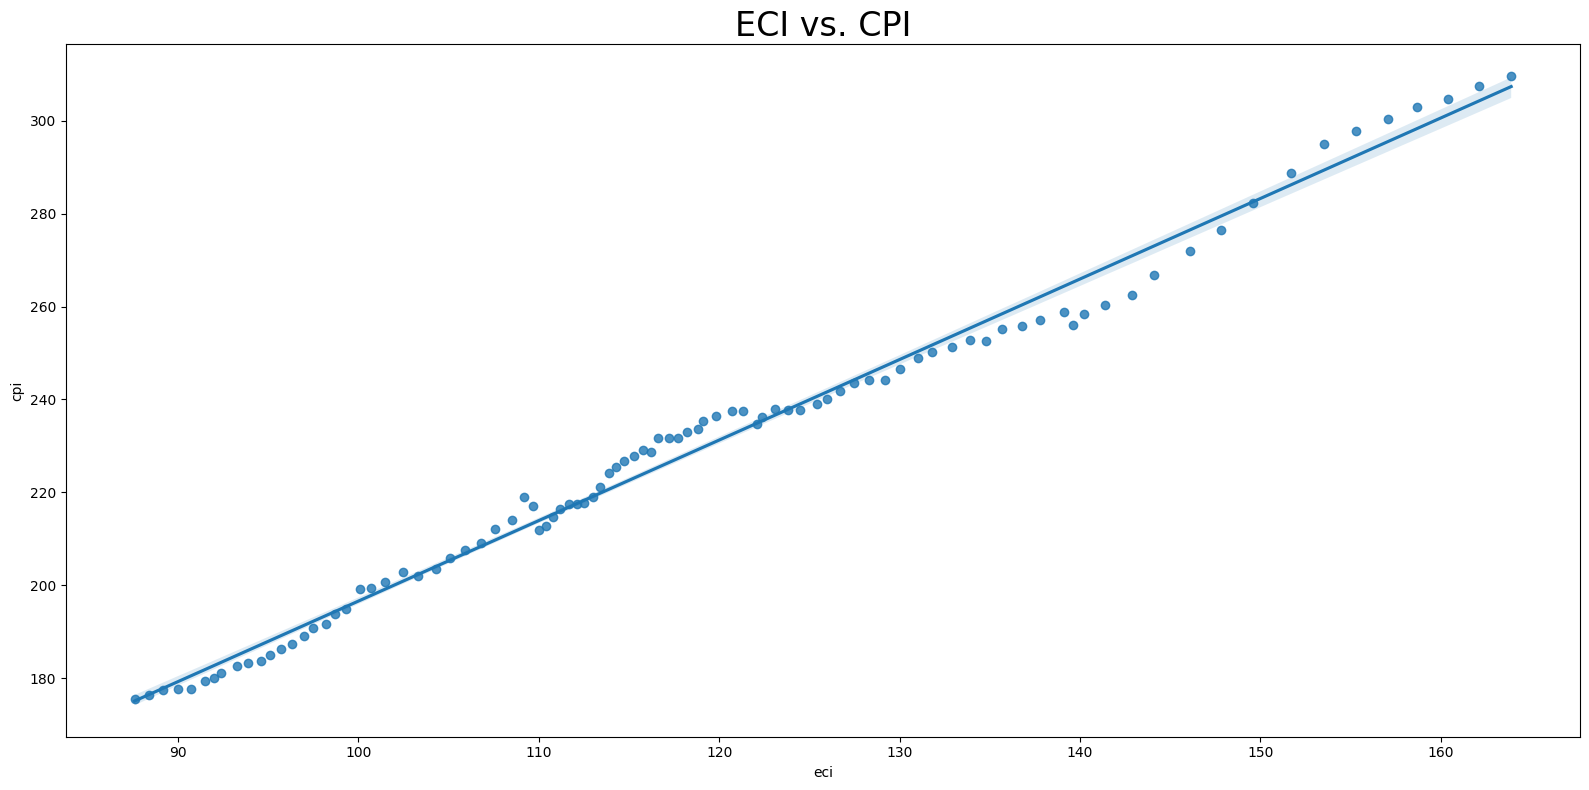

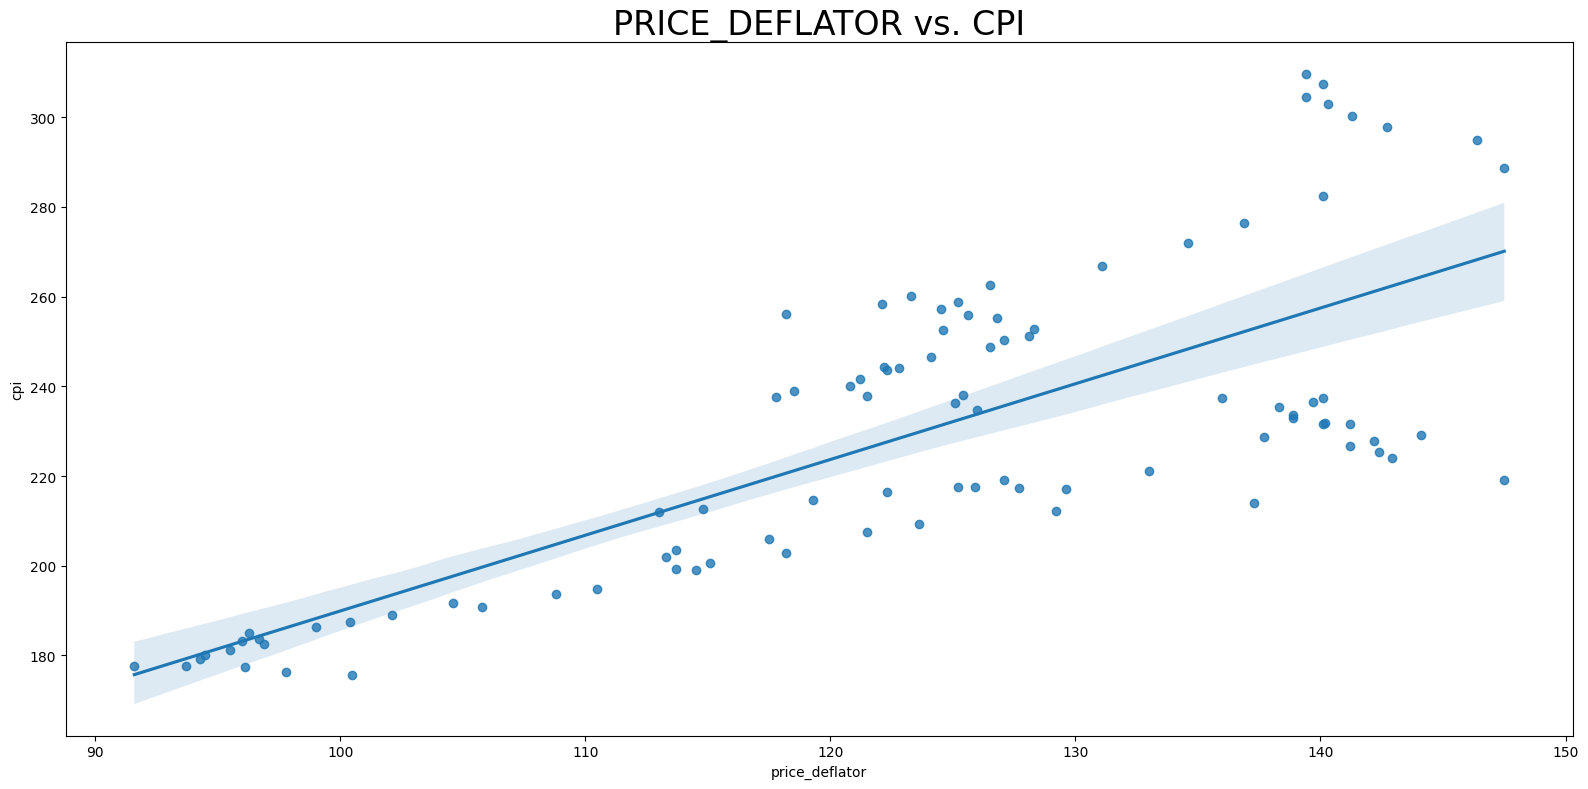

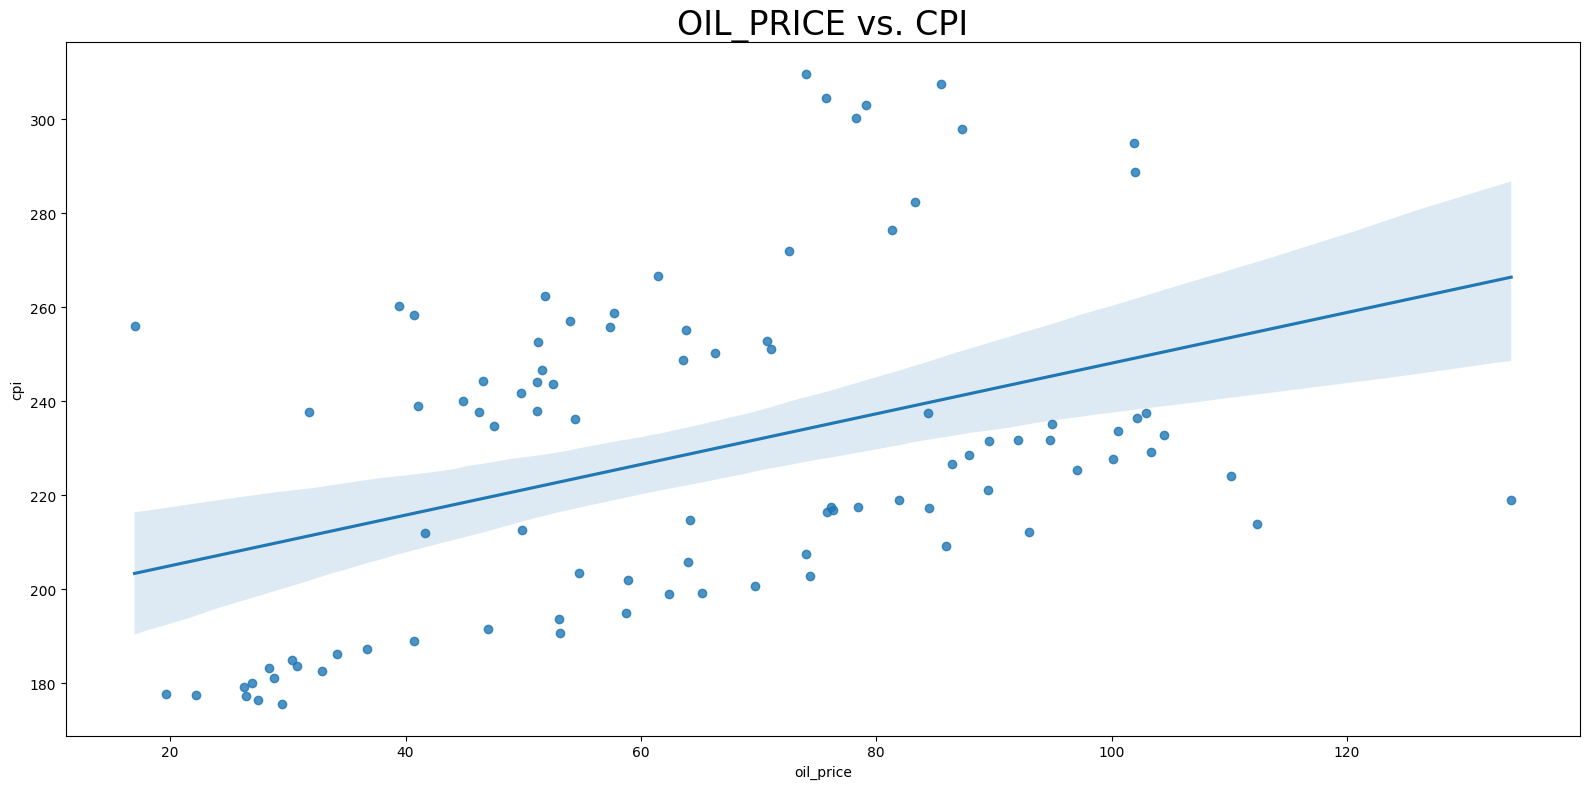

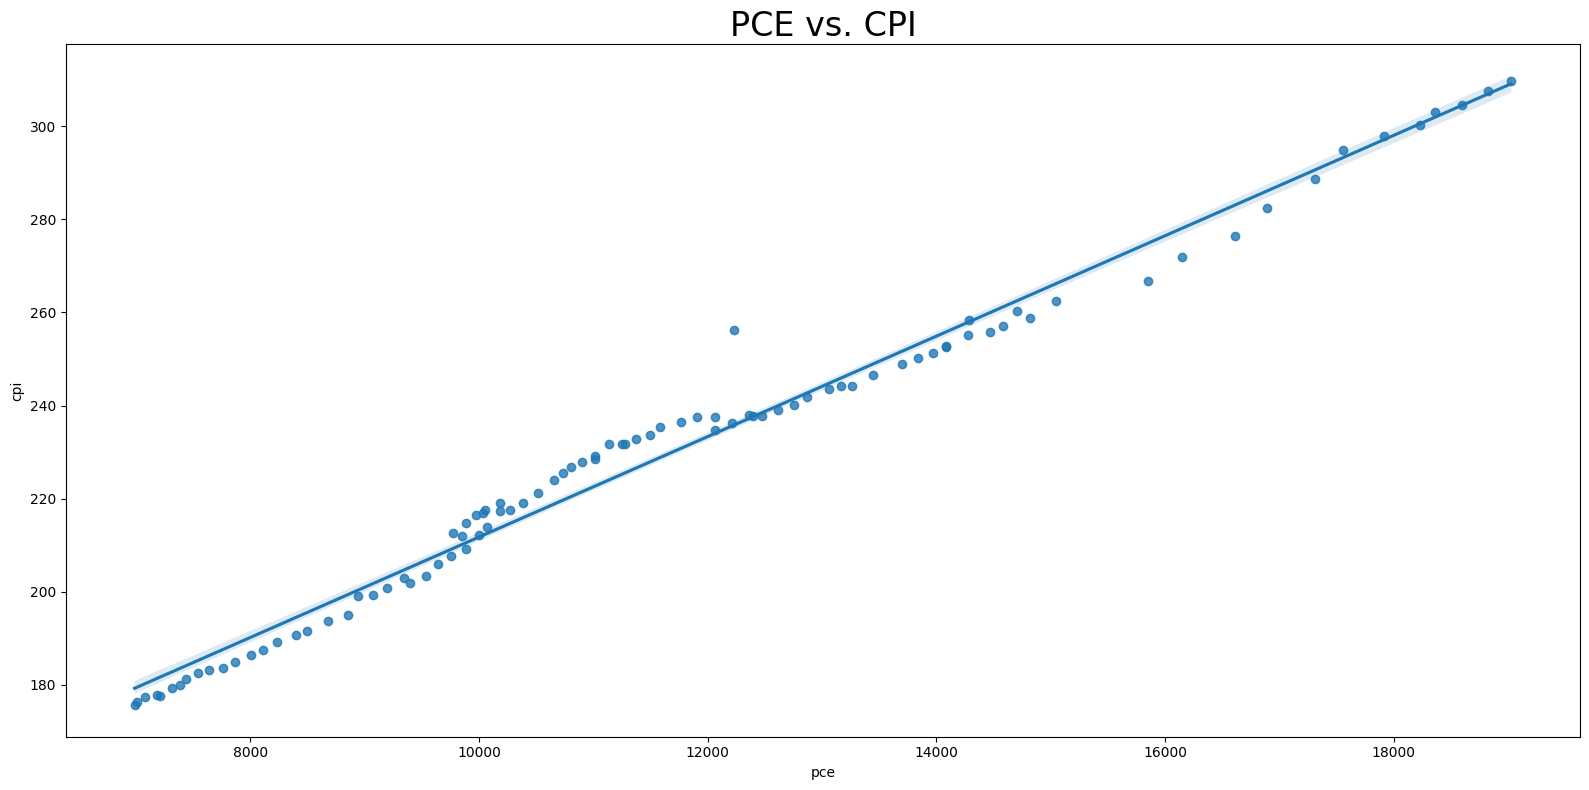

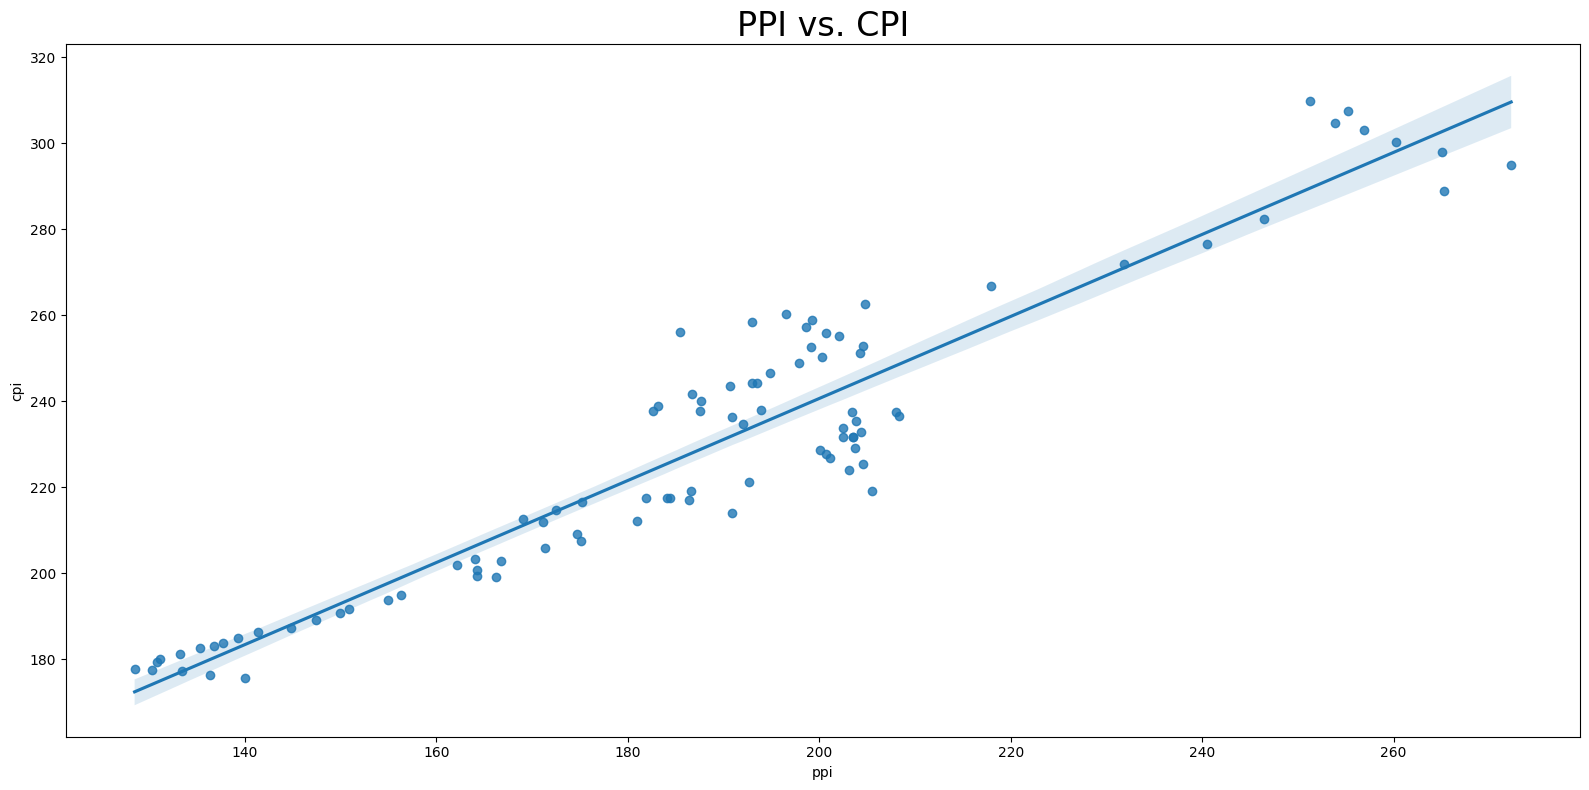

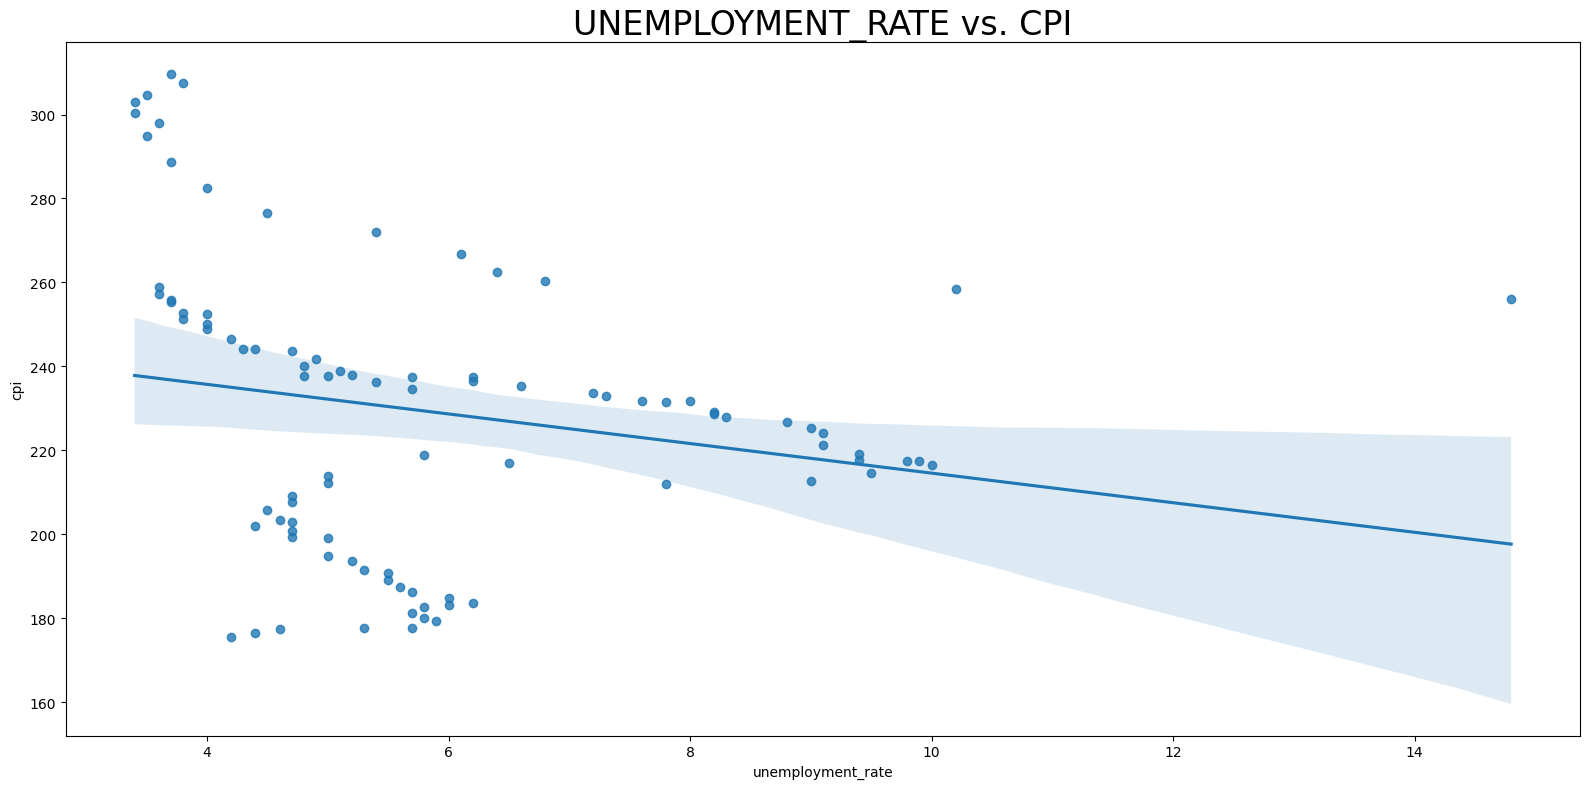

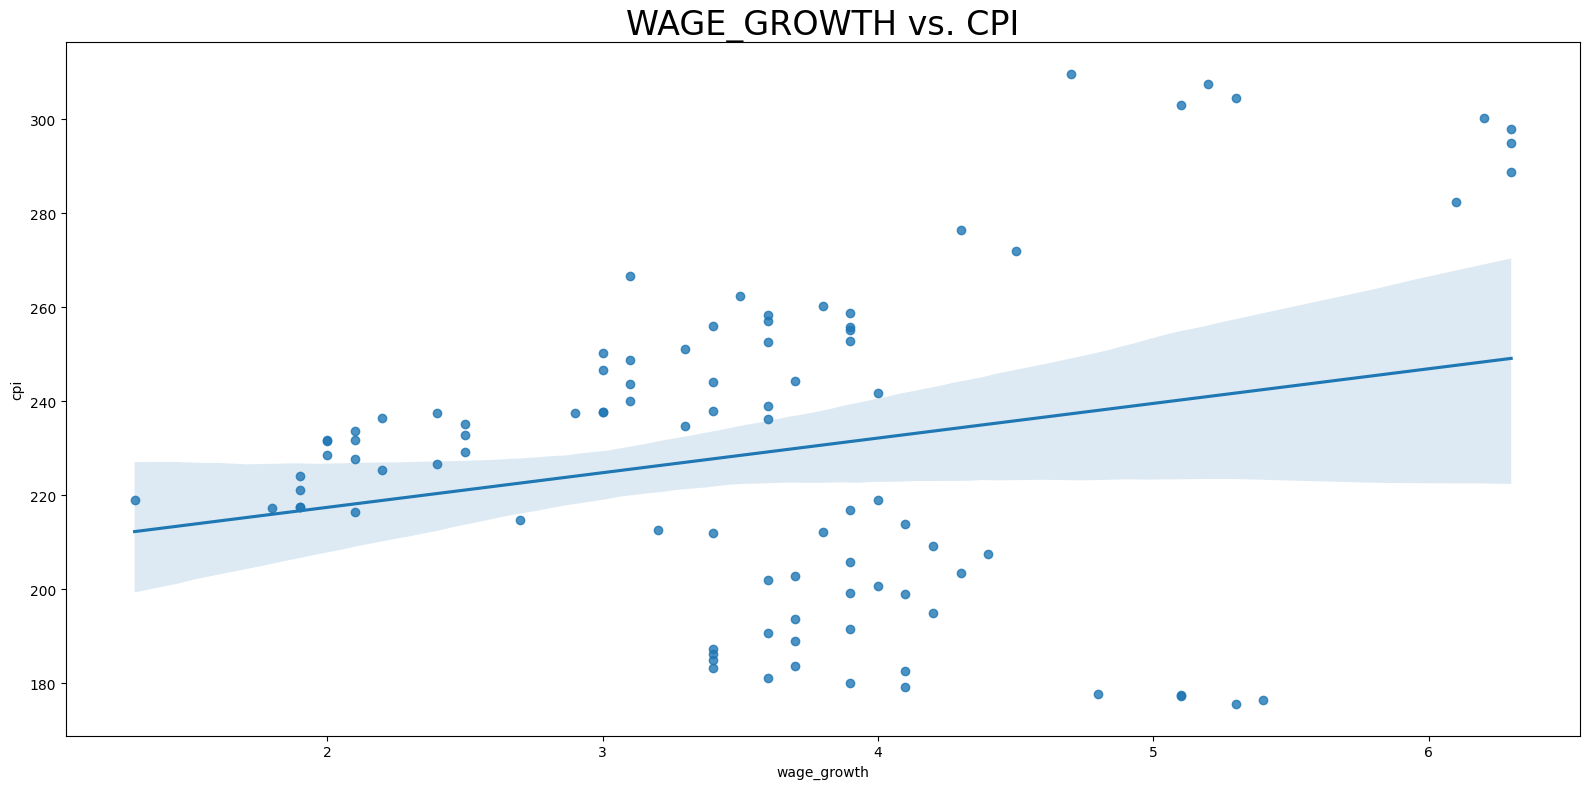

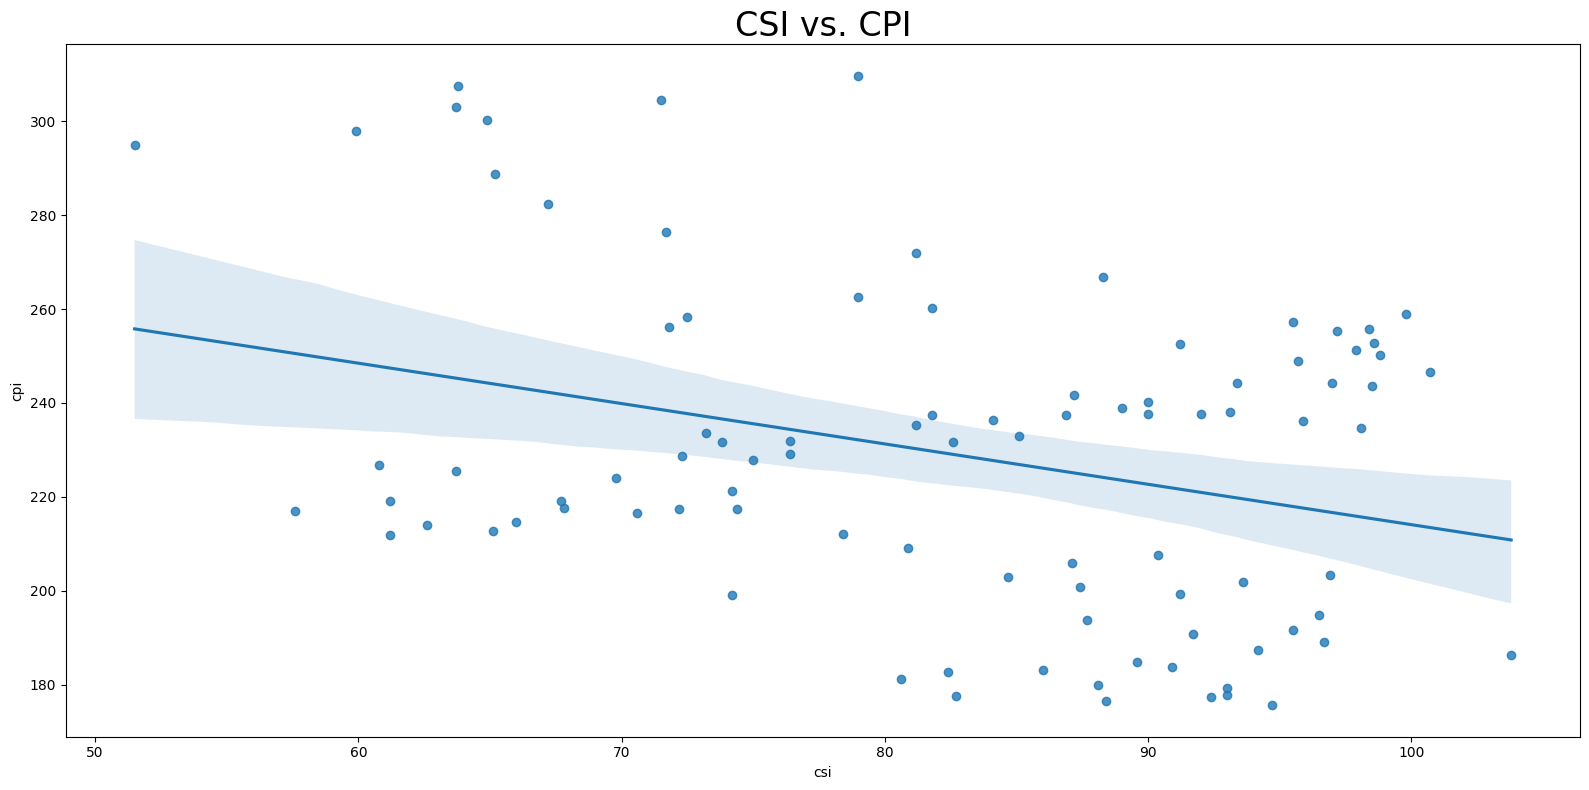

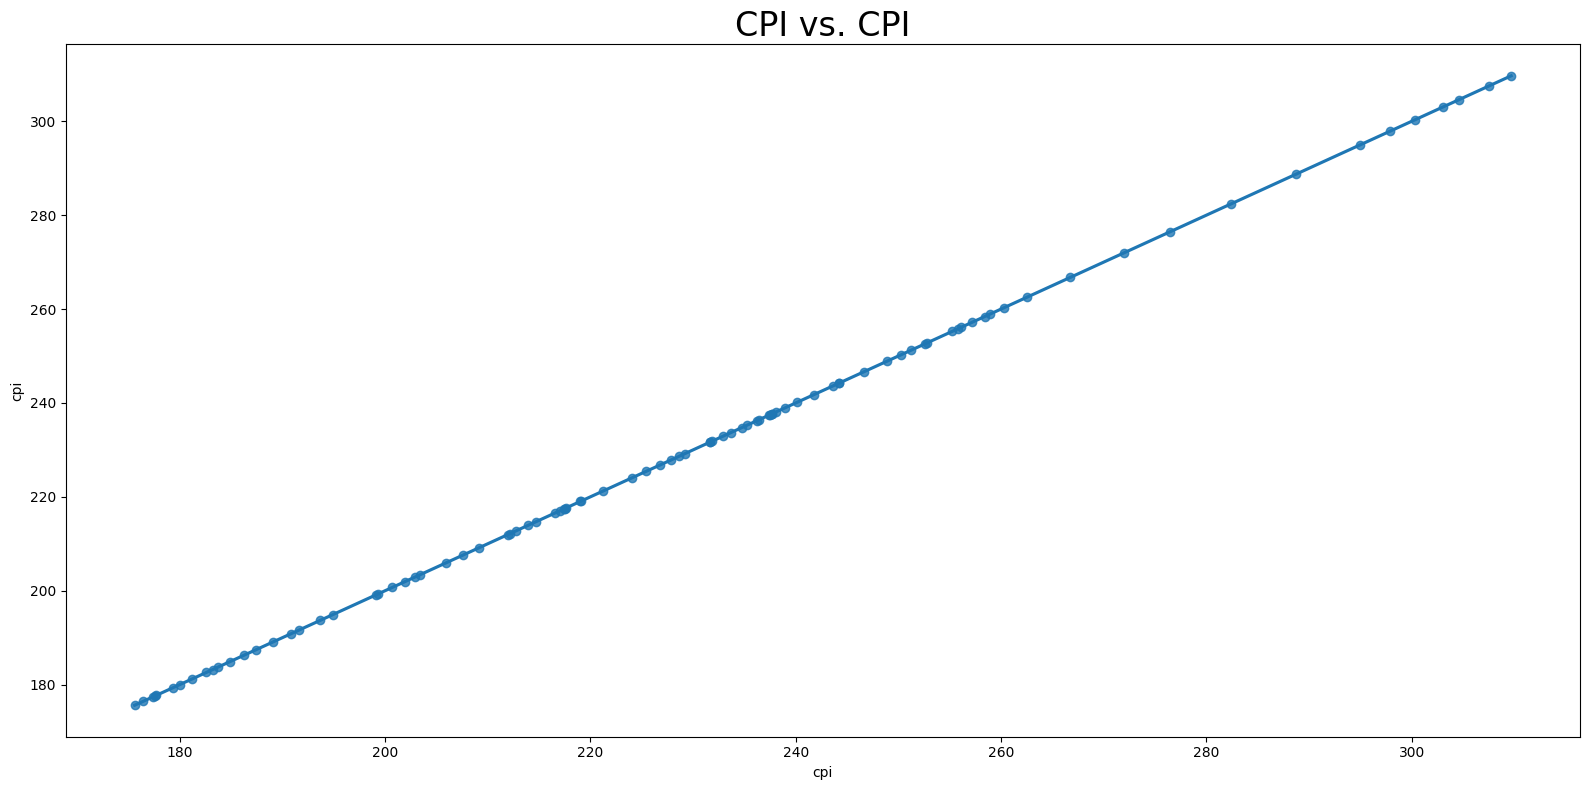

In [242]:
for column in df_quarterly.columns:
    plt.figure(figsize=(16, 8))
    plt.title(f"{column.upper()} vs. CPI", fontsize=24)
    sns.regplot(data=df_quarterly, x = df_quarterly[column], y = df_quarterly['cpi'])
    plt.tight_layout()
    plt.show()

In [246]:
df_quarterly['inflation'] = df_quarterly['cpi'].diff() / df_quarterly['cpi'].shift(1) * 100

In [249]:
df_quarterly_2020 = df_quarterly[df_quarterly.index.year >= 2020]

In [250]:
check_inflation(df_quarterly_2020, 'inflation')

,eci,price_deflator,oil_price,pce,ppi,unemployment_rate,wage_growth,csi,cpi,inflation
DATE,,,,,,,,,,


<Axes: xlabel='DATE'>

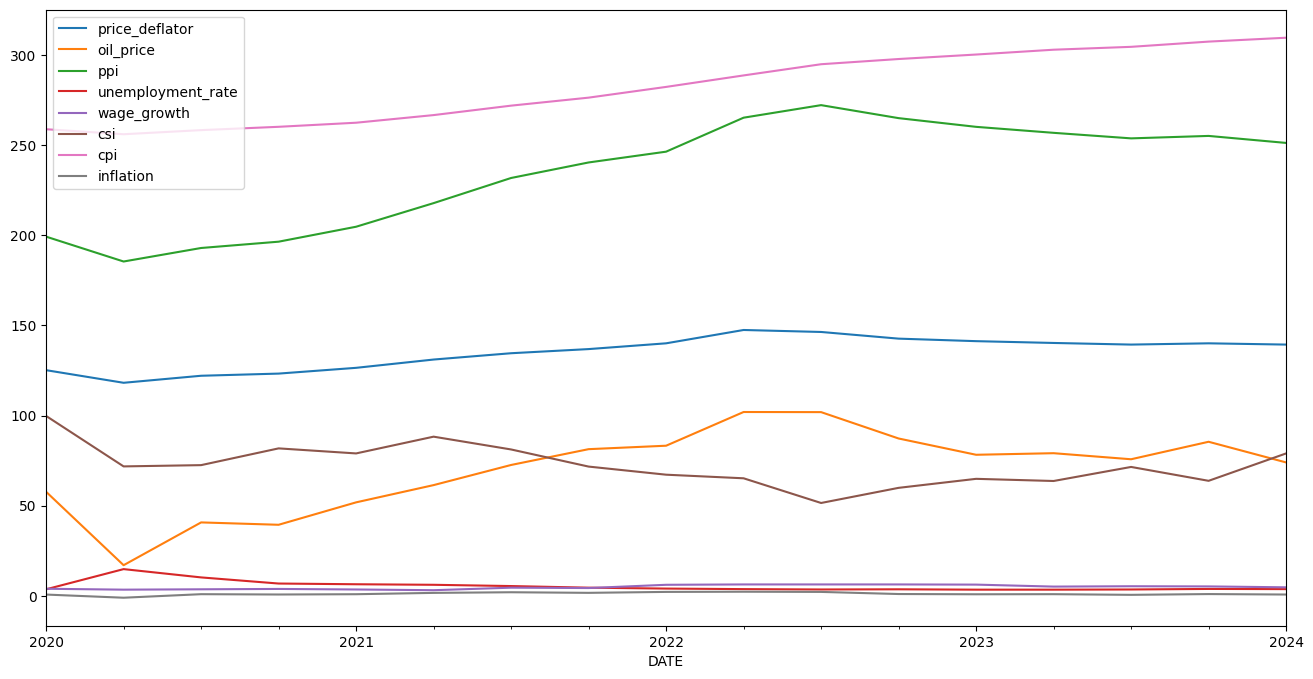

In [256]:
df_quarterly_2020.iloc[:, [1,2,4,5,6,7,8,9]].plot(figsize=(16, 8))

In [257]:
df_quarterly_2020.inflation

DATE
2020-03-31    0.680912
2020-06-30   -1.073749
2020-09-30    0.890968
2020-12-31    0.712439
2021-03-31    0.871857
2021-06-30    1.612842
2021-09-30    1.965121
2021-12-31    1.632389
2022-03-31    2.154583
2022-06-30    2.257162
2022-09-30    2.151584
2022-12-31    0.978381
2023-03-31    0.836962
2023-06-30    0.890943
2023-09-30    0.526677
2023-12-31    0.952966
2024-03-31    0.700417
Freq: QE-DEC, Name: inflation, dtype: float64

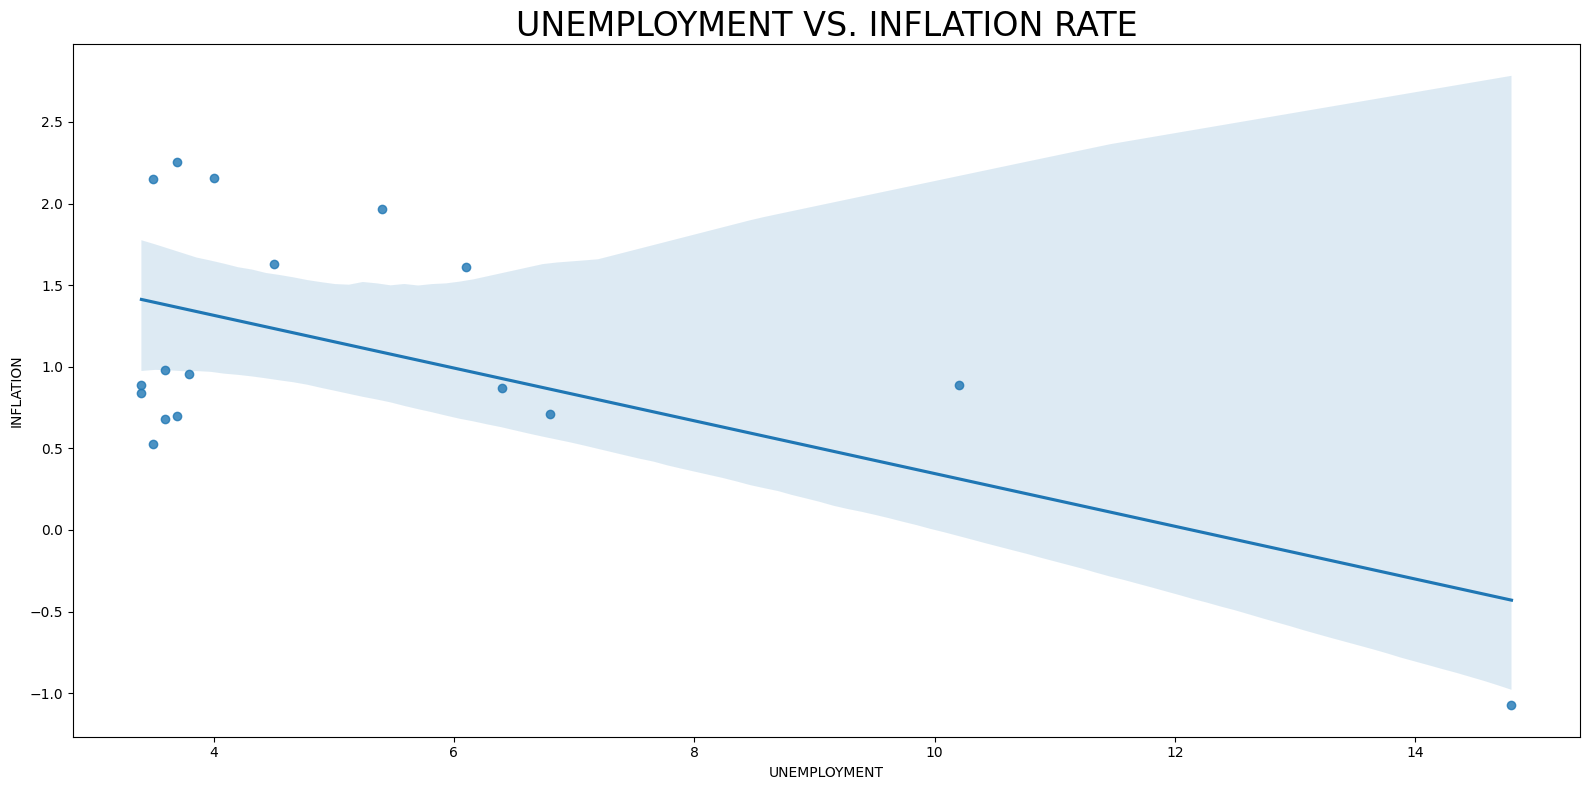

In [266]:
plt.figure(figsize=(16, 8))
sns.regplot(y=df_quarterly_2020['inflation'], x=df_quarterly_2020['unemployment_rate'])
plt.title(f"UNEMPLOYMENT VS. INFLATION RATE", fontsize=24)
plt.ylabel('INFLATION')
plt.xlabel('UNEMPLOYMENT')
plt.tight_layout()
plt.show()

<Axes: xlabel='DATE'>

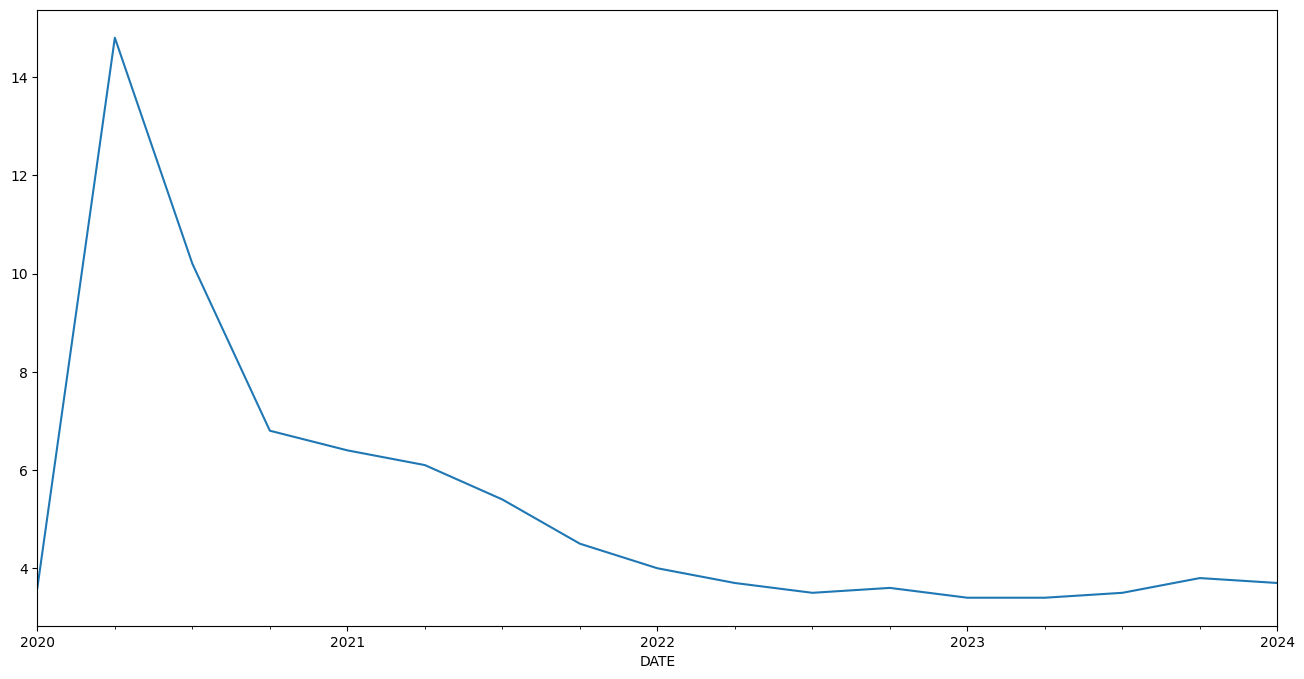

In [267]:
df_quarterly_2020.unemployment_rate.plot(figsize=(16, 8))

In [275]:
df_quarterly_2020['inflation'].rolling(window=3).mean()

DATE
2020-03-31         NaN
2020-06-30         NaN
2020-09-30    0.166044
2020-12-31    0.176553
2021-03-31    0.825088
2021-06-30    1.065713
2021-09-30    1.483273
2021-12-31    1.736784
2022-03-31    1.917364
2022-06-30    2.014711
2022-09-30    2.187776
2022-12-31    1.795709
2023-03-31    1.322309
2023-06-30    0.902095
2023-09-30    0.751527
2023-12-31    0.790195
2024-03-31    0.726687
Freq: QE-DEC, Name: inflation, dtype: float64

In [294]:
df_quarterly_2020

,eci,price_deflator,oil_price,pce,ppi,unemployment_rate,wage_growth,csi,cpi,inflation
DATE,,,,,,,,,,
2020-03-31,139.1,125.2,57.716957,14815.7,199.300,3.6,3.9,99.8,258.906,0.680912
2020-06-30,139.6,118.2,16.975000,12228.3,185.500,14.8,3.4,71.8,256.126,-1.073749
2020-09-30,140.2,122.1,40.715217,14285.1,193.000,10.2,3.6,72.5,258.408,0.890968
2020-12-31,141.4,123.3,39.405000,14702.5,196.500,6.8,3.8,81.8,260.249,0.712439
2021-03-31,142.9,126.5,51.849524,15047.3,204.800,6.4,3.5,79.0,262.518,0.871857
2021-06-30,144.1,131.1,61.417727,15854.1,217.900,6.1,3.1,88.3,266.752,1.612842
2021-09-30,146.1,134.6,72.591818,16150.8,231.850,5.4,4.5,81.2,271.994,1.965121
2021-12-31,147.8,136.9,81.364286,16613.8,240.465,4.5,4.3,71.7,276.434,1.632389
2022-03-31,149.6,140.1,83.277619,16888.6,246.453,4.0,6.1,67.2,282.390,2.154583


In [304]:
quarters = np.array([i for i in range(len(df_quarterly_2020))])
inflation_rates = df_quarterly_2020['inflation'].values

# Calculate means
mean_quarters = np.mean(quarters)
mean_inflation = np.mean(inflation_rates)

# Calculate numerator and denominator
numerator = np.sum((quarters - mean_quarters) * (inflation_rates - mean_inflation))
denominator = np.sum((quarters - mean_quarters) ** 2)

# Calculate slope (b) and intercept (a)
b = numerator / denominator
a = mean_inflation - b * mean_quarters

# Predict inflation for the next quarter
quarter_to_predict1 = len(quarters) + 1
quarter_to_predict2 = len(quarters) + 2
quarter_to_predict3 = len(quarters) + 3
predicted_inflation1 = a + b * quarter_to_predict1
predicted_inflation2 = a + b * quarter_to_predict2
predicted_inflation3 = a + b * quarter_to_predict3

print("Predicted inflation for quarter", quarter_to_predict, ":", predicted_inflation)

Predicted inflation for quarter 18 : 1.3967264831505743


In [329]:
def inflation_forecast(data, col):
    orders = np.array([i for i in range(len(data))])
    rates = data[col].values

    # calculate all means
    mean_data = np.mean(orders)
    mean_inflation = np.mean(rates)

    # calculate the numerator and denominator
    numerator = np.sum((orders - mean_data) * (rates - mean_inflation))
    denominator = np.sum((orders - mean_quarters) ** 2)

    # calculate slope b and the intercept a
    b = numerator / denominator
    a = mean_inflation - b * mean_quarters

    y_pred = a + b * (len(orders) + 1)

    return y_pred

In [300]:
df_quarterly_2020_inflation = df_quarterly_2020['inflation']

In [303]:
df_quarterly_2020['inflation']

DATE
2020-03-31    0.680912
2020-06-30   -1.073749
2020-09-30    0.890968
2020-12-31    0.712439
2021-03-31    0.871857
2021-06-30    1.612842
2021-09-30    1.965121
2021-12-31    1.632389
2022-03-31    2.154583
2022-06-30    2.257162
2022-09-30    2.151584
2022-12-31    0.978381
2023-03-31    0.836962
2023-06-30    0.890943
2023-09-30    0.526677
2023-12-31    0.952966
2024-03-31    0.700417
Freq: QE-DEC, Name: inflation, dtype: float64

In [324]:
predicted_value = [predicted_inflation1, predicted_inflation2, predicted_inflation3]
date = pd.date_range(start='2024-06-30', periods=3, freq='QE')

In [312]:
predicted = pd.DataFrame(
    predicted_value,
    date,
)

In [315]:
predicted.columns = ['inflation']

<Axes: >

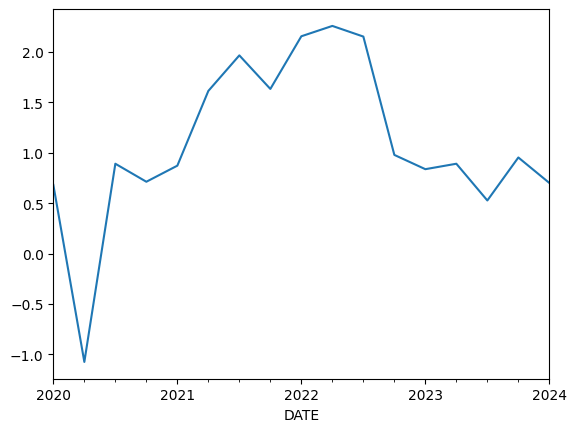

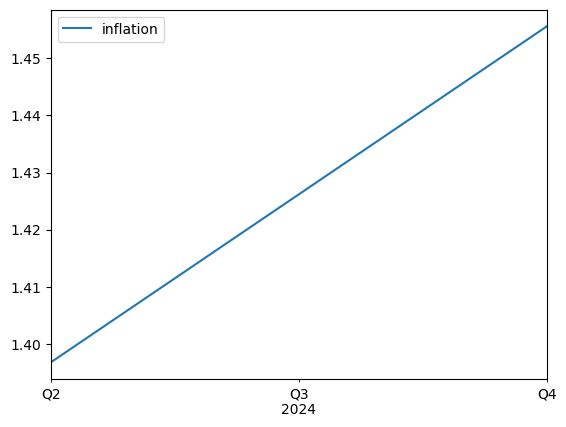

In [320]:
df_quarterly_2020['inflation'].plot()
predicted.plot()

[]

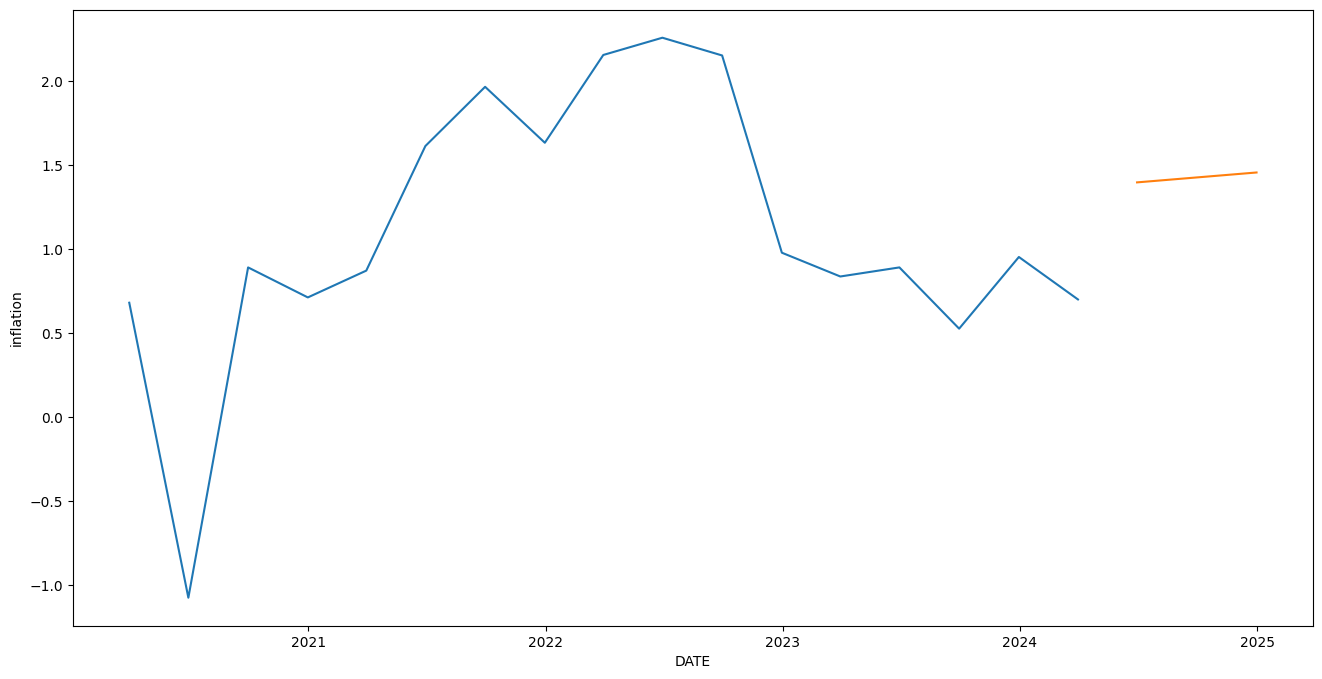

In [326]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.lineplot(data=df_quarterly_2020, x=df_quarterly_2020.index, y='inflation', ax=ax)
sns.lineplot(data=predicted, x=predicted.index, y='inflation', ax=ax)

plt.plot()

In [333]:
for column in df_quarterly_2020.columns:
    print(column.upper())
    print(inflation_forecast(df_quarterly_2020, column))
    print('*' * 100)
    print()

ECI
166.69362745098042
****************************************************************************************************

PRICE_DEFLATOR
149.3171568627451
****************************************************************************************************

OIL_PRICE
101.34898926375554
****************************************************************************************************

PCE
20202.564215686274
****************************************************************************************************

PPI
285.0475588235294
****************************************************************************************************

UNEMPLOYMENT_RATE
1.4573529411764703
****************************************************************************************************

WAGE_GROWTH
6.312254901960785
****************************************************************************************************

CSI
59.61568627450981
*******************************************************************

In [337]:
df_quarterly_2020

,eci,price_deflator,oil_price,pce,ppi,unemployment_rate,wage_growth,csi,cpi,inflation
DATE,,,,,,,,,,
2020-03-31,139.1,125.2,57.716957,14815.7,199.300,3.6,3.9,99.8,258.906,0.680912
2020-06-30,139.6,118.2,16.975000,12228.3,185.500,14.8,3.4,71.8,256.126,-1.073749
2020-09-30,140.2,122.1,40.715217,14285.1,193.000,10.2,3.6,72.5,258.408,0.890968
2020-12-31,141.4,123.3,39.405000,14702.5,196.500,6.8,3.8,81.8,260.249,0.712439
2021-03-31,142.9,126.5,51.849524,15047.3,204.800,6.4,3.5,79.0,262.518,0.871857
2021-06-30,144.1,131.1,61.417727,15854.1,217.900,6.1,3.1,88.3,266.752,1.612842
2021-09-30,146.1,134.6,72.591818,16150.8,231.850,5.4,4.5,81.2,271.994,1.965121
2021-12-31,147.8,136.9,81.364286,16613.8,240.465,4.5,4.3,71.7,276.434,1.632389
2022-03-31,149.6,140.1,83.277619,16888.6,246.453,4.0,6.1,67.2,282.390,2.154583


In [356]:
df_quarterly_2020.iloc[len(df_quarterly_2020)]

eci                    163.900000
price_deflator         139.400000
oil_price               74.003043
pce                  19028.000000
ppi                    251.306000
unemployment_rate        3.700000
wage_growth              4.700000
csi                     79.000000
cpi                    309.685000
inflation                0.700417
Name: 2024-03-31 00:00:00, dtype: float64

In [361]:
data_next_quarter = {
    pd.to_datetime('2024-06-30') : [167.69, 149.31, 101.35, 20202.56, 285.05, 1.46, 6.31, 59.61, 320.64]
}

new_row = pd.DataFrame(data_next_quarter).transpose()

In [341]:
eci_inflation = df_quarterly_2020['eci'][-1]

/var/folders/44/ywyr9h1x19sc31hw5rqj971w0000gn/T/ipykernel_30259/3758577207.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_quarterly_2020['eci'][-1]


163.9

In [339]:
inflation_rate_next_quarter = (eci_inflation) + (0.84 * price_deflator_inflation) + (0.74 * oil_price_inflation) + (0.95 * pce_inflation) +(0.9 * ppi_inflation) - (0.67 * unemployment_inflation) + (0.74 * wage_growth_inflation) - (0.6 * csi_inflation)

NameError: name 'eci_inflation' is not defined

In [365]:
new_row

,0,1,2,3,4,5,6,7,8
2024-06-30,167.69,149.31,101.35,20202.56,285.05,1.46,6.31,59.61,320.64


In [378]:
df_quarterly_2020

,eci,price_deflator,oil_price,pce,ppi,unemployment_rate,wage_growth,csi,cpi,inflation
DATE,,,,,,,,,,
2020-03-31,139.1,125.2,57.716957,14815.7,199.300,3.6,3.9,99.8,258.906,0.680912
2020-06-30,139.6,118.2,16.975000,12228.3,185.500,14.8,3.4,71.8,256.126,-1.073749
2020-09-30,140.2,122.1,40.715217,14285.1,193.000,10.2,3.6,72.5,258.408,0.890968
2020-12-31,141.4,123.3,39.405000,14702.5,196.500,6.8,3.8,81.8,260.249,0.712439
2021-03-31,142.9,126.5,51.849524,15047.3,204.800,6.4,3.5,79.0,262.518,0.871857
2021-06-30,144.1,131.1,61.417727,15854.1,217.900,6.1,3.1,88.3,266.752,1.612842
2021-09-30,146.1,134.6,72.591818,16150.8,231.850,5.4,4.5,81.2,271.994,1.965121
2021-12-31,147.8,136.9,81.364286,16613.8,240.465,4.5,4.3,71.7,276.434,1.632389
2022-03-31,149.6,140.1,83.277619,16888.6,246.453,4.0,6.1,67.2,282.390,2.154583


In [384]:
new_row

,0,1,2,3,4,5,6,7,8
2024-06-30,167.69,149.31,101.35,20202.56,285.05,1.46,6.31,59.61,320.64


In [383]:
(new_row.values - df_quarterly_2020.iloc[-1, [0, 1,2,3,4,5,6,7,8]].values) / df_quarterly_2020.iloc[-1, [0, 1,2,3,4,5,6,7,8]].values * 100

array([[  2.3123856 ,   7.10903874,  36.95382681,   6.17279798,
         13.42745498, -60.54054054,  34.25531915, -24.5443038 ,
          3.53746549]])

In [389]:
eci_inflation = 2.31
price_deflator_inflation = 7.11
oil_price_inflation = 36.95
pce_inflation = 6.17
ppi_inflation = 13.43
unemployment_inflation = -60.54
wage_growth_inflation = 32.25
csi_inflation = -24.54
cpi_inflation = 3.53

In [391]:
inflation_rate_next_quarter = (eci_inflation) + (0.84 * price_deflator_inflation) + (0.74 * oil_price_inflation) + (0.95 * pce_inflation) +(0.9 * ppi_inflation) - (0.67 * unemployment_inflation) + (0.74 * wage_growth_inflation) - (0.6 * csi_inflation) / 9

In [393]:
inflation_rate_next_quarter / 100

1.196367

In [395]:
print(f'Inflation will be {np.round(inflation_rate_next_quarter / 100, 2)}')

Inflation will be 1.2
